# Curriculum

1.  Setup Environment
2.  Load Dataset
3.  Understand the Data
4.  Data Prerocessing for EDA
5.  EDA
6.  Feature Engineering
7.  EDA part 2
8.  Statistical Significance Test
9.  Feature Encoding
10. Data Preprocessing for Model Building
11. Evaluation Metrics - Regression
12. Time Series Forecasting - ARIMA
13. Time Series Forecasting - Prophet
14. XGBoost Regression
15. XGBoost
16. CatBoost
17. LightGBM
18. Improve the Model - Hyperparameter Tuning
19. Ensemble (stacking)
20. Final RMSLE score and the recommendations

## **0. Setup Environment**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

The goal of this section is to:
- Import all the packages
- Set the options for data visualizations

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install catboost
!pip install pmdarima
!pip install joypy
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls drive/MyDrive/

 23dsmsa112PCA.gdoc                   'Practical_ 4.gdoc'
 ANOVA-23DSMSA112.pptx                 PROFILE.jpg
'ANOVA - Theory.gslides'              'Project proposal.gdoc'
'BigBasket Case Study.gdoc'           'Project Proposal.gdoc'
'Colab Notebooks'/                     Proposal-Example-1.gdoc
'Copy of ANOVA - Theory.gslides'       Recruit_restaurant_visitor_forecasting.ipynb
'Cover Letter DTU.gdoc'                SOPHS.gdoc
 Data/                                'SUPER ROUGH WORK DOC.gdoc'
 HarisSaifi_BCLS.pdf                   training_df.csv
'HarisSaifiCV_KS (1).pdf'             'Untitled document (10).gdoc'
 HarisSaifiCV_KS.pdf                  'Untitled document (1).gdoc'
 HarisSaifi_NeGD.pdf                  'Untitled document (2).gdoc'
'HR Analaytics Dashboard HS.gslides'  'Untitled document (3).gdoc'
 INTERPRET.gdoc                       'Untitled document (4).gdoc'
'LAB3Mrketingharis-1 (1).gdoc'        'Untitled document (5).gdoc'
 LAB3Mrketingharis-1.gdoc             'Untitle

In [ ]:
cd /content/drive/MyDrive/09_Mega_Case_Study_Course/3_Restaurant\ Visitor\ Forecasting

[Errno 2] No such file or directory: '/content/drive/MyDrive/09_Mega_Case_Study_Course/3_Restaurant Visitor Forecasting'
/content


In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
# import pandas_profiling

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Track time
import time
import datetime
import calendar


# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor


# Time Series Models
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


# Statistics
import scipy.stats
import warnings
from tqdm import tqdm

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)
%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **1. Load Dataset**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load Dataset</h2>
</div>

The goal is to:
- Load the datasets

Load the datasets using pd.read_csv()

In [ ]:
%%time
# Load the datasets
# data_path = '../Data/'
data_path = '/content/drive/MyDrive/Data/'  # colab

air_store_info    = pd.read_csv(data_path + 'air_store_info.csv')
hpg_store_info    = pd.read_csv(data_path + 'hpg_store_info.csv')
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')
date_info         = pd.read_csv(data_path + 'date_info.csv')
hpg_reserve       = pd.read_csv(data_path + 'hpg_reserve.csv')
air_visit_data    = pd.read_csv(data_path + 'air_visit_data.csv')
air_reserve       = pd.read_csv(data_path + 'air_reserve.csv')
store_id_relation = pd.read_csv(data_path + 'store_id_relation.csv')

CPU times: user 2.86 s, sys: 380 ms, total: 3.24 s
Wall time: 10.5 s


### __Data Description__
This is a relational dataset from two systems. Each file is prefaced with the source (either air_ or hpg_) to indicate its origin.

Each restaurant has a unique __air_store_id__ and __hpg_store_id__. Note that not all restaurants are covered by both systems, and that you have been provided data beyond the restaurants for which you must forecast.

Latitudes and Longitudes are not exact to discourage de-identification of restaurants.

### __Air Store Info__

This file contains location and genre information about select air restaurants.

In [ ]:
air_store_info.head()

air_store_id  air_genre_name                 air_area_name   latitude   longitude
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599

#### Data Description
This file contains information about select air restaurants. Column names and contents are self-explanatory.

- air_store_id - the restaurant's id in the air system
- air_genre_name
- air_area_name
- latitude
- longitude

Note: latitude and longitude are the latitude and longitude of the area to which the store belongs

### HPG Store Info

This file contains information about select hpg restaurants.

In [ ]:
hpg_store_info.head()

hpg_store_id  hpg_genre_name                  hpg_area_name   latitude   longitude
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221

#### Data Description
This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

- hpg_store_id
- hpg_genre_name
- hpg_area_name
- latitude
- longitude

Note: latitude and longitude are the latitude and longitude of the area to which the store belongs

### Sample Submission

This file shows the format in which you must forecast, including the days for which you must forecast.

In [ ]:
sample_submission.head()

id  visitors
0  air_00a91d42b08b08d9_2017-04-23         0
1  air_00a91d42b08b08d9_2017-04-24         0
2  air_00a91d42b08b08d9_2017-04-25         0
3  air_00a91d42b08b08d9_2017-04-26         0
4  air_00a91d42b08b08d9_2017-04-27         0

#### Data Description
This file shows a submission in the correct format, including the days for which you must forecast.

- `id` - the id is formed by concatenating the `air_store_id` and `visit_date` with an underscore
- `visitors`- the number of visitors forecasted for the store and date combination

### Date and holiday Info

This file gives basic information about the calendar dates, day_of_week and holidays.

In [ ]:
date_info.head()

calendar_date day_of_week  holiday_flg
0    2016-01-01      Friday            1
1    2016-01-02    Saturday            1
2    2016-01-03      Sunday            1
3    2016-01-04      Monday            0
4    2016-01-05     Tuesday            0

#### Data Description
This file gives basic information about the calendar dates in the dataset.
- calendar_date
- day_of_week
- holiday_flg - is the day a holiday in Japan

### HPG Reserve

This file contains reservations made in the hpg system.

In [ ]:
hpg_reserve.head()

hpg_store_id       visit_datetime     reserve_datetime  reserve_visitors
0  hpg_c63f6f42e088e50f  2016-01-01 11:00:00  2016-01-01 09:00:00                 1
1  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00                 3
2  hpg_c8e24dcf51ca1eb5  2016-01-01 16:00:00  2016-01-01 14:00:00                 2
3  hpg_24bb207e5fd49d4a  2016-01-01 17:00:00  2016-01-01 11:00:00                 5
4  hpg_25291c542ebb3bc2  2016-01-01 17:00:00  2016-01-01 03:00:00                13

#### Data Description
This file contains reservations made in the hpg system.

- hpg_store_id - the restaurant's id in the hpg system
- visit_datetime - the time of the visit at reservation
- reserve_datetime - the time the reservation was made
- reserve_visitors - the number of visitors for that reservation

### Air Visit Data

This file contains historical visit data for the air restaurants.

In [ ]:
air_visit_data.head()

air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24  2016-01-18         6

#### Data Description
This file contains historical visit data for the air restaurants.

- air_store_id
- visit_date - the date
- visitors - the number of visitors to the restaurant on the date

### Air Reserve Data

his file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

In [ ]:
air_reserve.head()

air_store_id       visit_datetime     reserve_datetime  reserve_visitors
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00                 1
1  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00                 3
2  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00                 6
3  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00                 2
4  air_db80363d35f10926  2016-01-01 20:00:00  2016-01-01 01:00:00                 5

#### Data Description
This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

- air_store_id - the restaurant's id in the air system
- visit_datetime - the time of the reservation
- reserve_datetime - the time the reservation was made
- reserve_visitors - the number of visitors for that reservation

### Store Id Relation Data

This file allows you to join select restaurants that have both the air and hpg system.

In [ ]:
store_id_relation.head()

air_store_id          hpg_store_id
0  air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
1  air_a24bf50c3e90d583  hpg_c34b496d0305a809
2  air_c7f78b4f3cba33ff  hpg_cd8ae0d9bbd58ff9
3  air_947eb2cae4f3e8f2  hpg_de24ea49dc25d6b8
4  air_965b2e0cf4119003  hpg_653238a84804d8e7

#### Data Description
This file allows you to join select restaurants that have both the air and hpg system.

- hpg_store_id
- air_store_id

## **2. Understand Data**


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Understand Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

The goal of this section is to:
- Get shape and summary of data frames
- Get various statistics of data
- Get inferences or action items for next step

In [ ]:
def understand_df(df):

    # Dimensions of dataset
    print("Dimension of the dataset is", df.shape , "\n\n")

    # Head of dataset
    print("First 5 rows of the dataset are \n", df.head(), "\n\n")

    # Summary of dataset
    print("Summary of the dataset is \n", df.describe(), "\n\n")

    # Stats of dataset
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    print("Statistics of the dataset are \n",stats_df.sort_values('Percentage of missing values', ascending=False), "\n\n")

### Store Info Data - Air & HPG

In [ ]:
# Air Store Info
understand_df(air_store_info)

Dimension of the dataset is (829, 5) 


First 5 rows of the dataset are 
            air_store_id  air_genre_name                 air_area_name   latitude   longitude
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599 


Summary of the dataset is 
          latitude   longitude
count  829.000000  829.000000
mean    35.647042  137.415311
std      2.084659    3.650971
min     33.211967  130.195555
25%     34.695124  135.341564
50%     35.658068  139.685474
75%     35.694003  139.751599
max     44.020632  144.273398 


Statistics of the dataset are 
           Feature  Unique_values

In [ ]:
# HPG Store Info
understand_df(hpg_store_info)

Dimension of the dataset is (4690, 5) 


First 5 rows of the dataset are 
            hpg_store_id  hpg_genre_name                  hpg_area_name   latitude   longitude
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō  35.643675  139.668221 


Summary of the dataset is 
           latitude    longitude
count  4690.000000  4690.000000
mean     35.810261   137.675816
std       2.138755     3.197233
min      33.311645   130.339313
25%      34.692109   135.498859
50%      35.659214   139.495733
75%      35.703381   139.737998
max      43.774846   143.714585 


Statistics of the dataset are 
        

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 829 stores in air data
- 4690 stores in hpg data
- Missing values are not there in any data
- Both the dataset have 5 columns - id,genre_name,area_name_latitude,longitude
- Area name follows a specific structure, so new features can be extracted

### Visit Data

In [ ]:
# Air Visit Data
understand_df(air_visit_data)

Dimension of the dataset is (252108, 3) 


First 5 rows of the dataset are 
            air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24  2016-01-18         6 


Summary of the dataset is 
             visitors
count  252108.000000
mean       20.973761
std        16.757007
min         1.000000
25%         9.000000
50%        17.000000
75%        29.000000
max       877.000000 


Statistics of the dataset are 
         Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0  air_store_id            829                           0.0                                      0.189205  object
1    visit_date            478                           0.0                                      0.316928  object
2      visitors            204                 

In [ ]:
# Max and Min dates
mi = air_visit_data.visit_date.min()
ma = air_visit_data.visit_date.max()
print(mi, ma)
print("# Days", (pd.to_datetime(ma)-pd.to_datetime(mi)).days)

2016-01-01 2017-04-22
# Days 477


In [ ]:
# Stores present in air visit data not present in air store info
np.setdiff1d(air_visit_data["air_store_id"], air_store_info["air_store_id"])

array([], dtype=object)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 829 stores are present.
- 252k rows present
- No Missing values
- Data collection interval: 477 days
- This is the main training data
- All the stores in visit data have corresponding info in air store info data

### Reservation Data

In [ ]:
# Air Reserve Data
understand_df(air_reserve)

Dimension of the dataset is (92378, 4) 


First 5 rows of the dataset are 
            air_store_id       visit_datetime     reserve_datetime  reserve_visitors
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00                 1
1  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00                 3
2  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00                 6
3  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00                 2
4  air_db80363d35f10926  2016-01-01 20:00:00  2016-01-01 01:00:00                 5 


Summary of the dataset is 
        reserve_visitors
count      92378.000000
mean           4.481749
std            4.919669
min            1.000000
25%            2.000000
50%            3.000000
75%            5.000000
max          100.000000 


Statistics of the dataset are 
             Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0      air_store_id

In [ ]:
# Max and Min dates: visit_datetime
mi = air_reserve.visit_datetime.min()
ma = air_reserve.visit_datetime.max()
print(mi, ma)
print("# Days", (pd.to_datetime(ma)-pd.to_datetime(mi)).days)

2016-01-01 19:00:00 2017-05-31 21:00:00
# Days 516


In [ ]:
# Max and Min dates: reserve_datetime
mi = air_reserve.reserve_datetime.min()
ma = air_reserve.reserve_datetime.max()
print(mi, ma)
print("# Days", (pd.to_datetime(ma)-pd.to_datetime(mi)).days)

2016-01-01 01:00:00 2017-04-22 23:00:00
# Days 477


In [ ]:
# Stores present in air reserve data not present in air store info
np.setdiff1d(air_reserve["air_store_id"], air_store_info["air_store_id"])

array([], dtype=object)

In [ ]:
# HPG Reserve Data
understand_df(hpg_reserve)

Dimension of the dataset is (2000320, 4) 


First 5 rows of the dataset are 
            hpg_store_id       visit_datetime     reserve_datetime  reserve_visitors
0  hpg_c63f6f42e088e50f  2016-01-01 11:00:00  2016-01-01 09:00:00                 1
1  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00                 3
2  hpg_c8e24dcf51ca1eb5  2016-01-01 16:00:00  2016-01-01 14:00:00                 2
3  hpg_24bb207e5fd49d4a  2016-01-01 17:00:00  2016-01-01 11:00:00                 5
4  hpg_25291c542ebb3bc2  2016-01-01 17:00:00  2016-01-01 03:00:00                13 


Summary of the dataset is 
        reserve_visitors
count      2.000320e+06
mean       5.073785e+00
std        5.416172e+00
min        1.000000e+00
25%        2.000000e+00
50%        3.000000e+00
75%        6.000000e+00
max        1.000000e+02 


Statistics of the dataset are 
             Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0      hpg_store_

In [ ]:
# Stores present in air reserve data not present in air store info
print(np.setdiff1d(hpg_reserve["hpg_store_id"], hpg_store_info["hpg_store_id"]))
print(len(np.setdiff1d(hpg_reserve["hpg_store_id"], hpg_store_info["hpg_store_id"])))

['hpg_001112ef76b9802c' 'hpg_0023b061a9f3279a' 'hpg_0025a7a2ddb76a01' ...
 'hpg_fffa3b36bc525136' 'hpg_fffa98e9f58176a9' 'hpg_fffc097dce87af3e']
8635


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 314 stores in air data (unique air_store_ids)
- 13325 stores in hpg data
- Missing values are not there in any data
- Both the dataset have 5 columns - id,genre_name,area_name_latitude,longitude
- All the stores in air reserve data have store information in air store info data
- HPG reserve data has more stores compared to hpg store info data. 8635 stores in hpg reserve data doesn't have store information in hpg store info data

### Date Info

In [ ]:
# Air Store Info Data
understand_df(date_info)

Dimension of the dataset is (517, 3) 


First 5 rows of the dataset are 
   calendar_date day_of_week  holiday_flg
0    2016-01-01      Friday            1
1    2016-01-02    Saturday            1
2    2016-01-03      Sunday            1
3    2016-01-04      Monday            0
4    2016-01-05     Tuesday            0 


Summary of the dataset is 
        holiday_flg
count   517.000000
mean      0.067698
std       0.251471
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000 


Statistics of the dataset are 
          Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0  calendar_date            517                           0.0                                      0.193424  object
1    day_of_week              7                           0.0                                     14.313346  object
2    holiday_flg              2                           0.0                                  

In [ ]:
# Start Date
print(min(date_info.calendar_date))

# End Date
print(max(date_info.calendar_date))

2016-01-01
2017-05-31


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Date info is present for 1 year and 5 months. The start date is 2016-01-01, the end date is 2018-05-31
- Holiday flag is also present which states if a particular day was holiday or not
- No Missing values

### Store ID relation

In [ ]:
# Air Store Info Data
understand_df(store_id_relation)

Dimension of the dataset is (150, 2) 


First 5 rows of the dataset are 
            air_store_id          hpg_store_id
0  air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
1  air_a24bf50c3e90d583  hpg_c34b496d0305a809
2  air_c7f78b4f3cba33ff  hpg_cd8ae0d9bbd58ff9
3  air_947eb2cae4f3e8f2  hpg_de24ea49dc25d6b8
4  air_965b2e0cf4119003  hpg_653238a84804d8e7 


Summary of the dataset is 
                 air_store_id          hpg_store_id
count                    150                   150
unique                   150                   150
top     air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
freq                       1                     1 


Statistics of the dataset are 
         Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0  air_store_id            150                           0.0                                      0.666667  object
1  hpg_store_id            150                           0.0                                      0

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Only 150 stores have a mapping of air ID and hpg ID

### Submission Data

In [ ]:
# Sample Submission
understand_df(sample_submission)

Dimension of the dataset is (32019, 2) 


First 5 rows of the dataset are 
                                 id  visitors
0  air_00a91d42b08b08d9_2017-04-23         0
1  air_00a91d42b08b08d9_2017-04-24         0
2  air_00a91d42b08b08d9_2017-04-25         0
3  air_00a91d42b08b08d9_2017-04-26         0
4  air_00a91d42b08b08d9_2017-04-27         0 


Summary of the dataset is 
        visitors
count   32019.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0 


Statistics of the dataset are 
     Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0        id          32019                           0.0                                      0.003123  object
1  visitors              1                           0.0                                    100.000000   int64 




In [ ]:
# sample_submission['date'] = sample_submission.id.split("_")[2]
sample_submission['visit_date'] = sample_submission.apply(lambda x: x['id'].split("_")[2],axis=1)
sample_submission['store_type'] = sample_submission.apply(lambda x: x['id'].split("_")[0],axis=1)
sample_submission['air_store_id'] = sample_submission.apply(lambda x: x['id'].split("_")[0] + "_" + x['id'].split("_")[1] ,axis=1)
sample_submission.head()

id  visitors  visit_date store_type          air_store_id
0  air_00a91d42b08b08d9_2017-04-23         0  2017-04-23        air  air_00a91d42b08b08d9
1  air_00a91d42b08b08d9_2017-04-24         0  2017-04-24        air  air_00a91d42b08b08d9
2  air_00a91d42b08b08d9_2017-04-25         0  2017-04-25        air  air_00a91d42b08b08d9
3  air_00a91d42b08b08d9_2017-04-26         0  2017-04-26        air  air_00a91d42b08b08d9
4  air_00a91d42b08b08d9_2017-04-27         0  2017-04-27        air  air_00a91d42b08b08d9

In [ ]:
# Sample Submission
understand_df(sample_submission)

Dimension of the dataset is (32019, 5) 


First 5 rows of the dataset are 
                                 id  visitors  visit_date store_type          air_store_id
0  air_00a91d42b08b08d9_2017-04-23         0  2017-04-23        air  air_00a91d42b08b08d9
1  air_00a91d42b08b08d9_2017-04-24         0  2017-04-24        air  air_00a91d42b08b08d9
2  air_00a91d42b08b08d9_2017-04-25         0  2017-04-25        air  air_00a91d42b08b08d9
3  air_00a91d42b08b08d9_2017-04-26         0  2017-04-26        air  air_00a91d42b08b08d9
4  air_00a91d42b08b08d9_2017-04-27         0  2017-04-27        air  air_00a91d42b08b08d9 


Summary of the dataset is 
        visitors
count   32019.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0 


Statistics of the dataset are 
         Feature  Unique_values  Percentage of missing values  Percentage of values in the biggest category    type
0            id          32019                           0.

In [ ]:

# Start Date
print(min(sample_submission.visit_date))

# End Date
print(max(sample_submission.visit_date))

2017-04-23
2017-05-31


In [ ]:
# Stores present in air reserve data not present in air store info
print(np.setdiff1d(sample_submission["air_store_id"], air_store_info["air_store_id"]))

# Stores present in air reserve data not present in air store info
print(np.setdiff1d(sample_submission["air_store_id"], air_visit_data["air_store_id"]))

[]
[]


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- All the predictions needs to be made for air stores
- Predictions needs to be made for 821 stores for 39 days each
- All the stores are present in air store info data and air visit data
- Since predictions needs to be made for air stores, air stores data should not be lost while merging the dataset


## **3. Data Pre-processing for EDA**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for EDA</h2>
</div>

The goal of this section is to:
- Merge stores data (air & hpg) to get common information
- Merge reserves data to get common reservation information
- Engineer holiday related features
- Merge all the datasets to create one mega dataset for training


Let's start with the first task to merge datasets to form one.

### Prepare Store Info

Since all stores we want to predict are in `air_store`, it is safe to start from it and do left joins.

First, add `hpg_store_id` to the `air_store` table

In [ ]:
# Merge store info and store id relation dataframes
stores_df = pd.merge(air_store_info, store_id_relation, how='left', on='air_store_id')
stores_df.shape

(829, 6)

How many stores didn't find a matching `hpg_store_id`?

In [ ]:
# Check null values for hpg store id
stores_df['hpg_store_id'].isnull().sum()/stores_df.shape[0]

0.8190591073582629

In [ ]:
stores_df.head()

air_store_id  air_genre_name                 air_area_name   latitude   longitude          hpg_store_id
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853                   NaN
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853  hpg_9b38b9e13da6da27
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853                   NaN
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124  135.197853                   NaN
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599                   NaN

Add `hpg_store` information:

In [ ]:
# Merge stores_df and hpg_store_info dataframes
stores_df = pd.merge(stores_df, hpg_store_info, how='left', on='hpg_store_id', suffixes=['_air', '_hpg'])

In [ ]:
stores_df.head()

air_store_id  air_genre_name                 air_area_name  latitude_air  longitude_air          hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853  hpg_9b38b9e13da6da27            NaN           NaN           NaN            NaN
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599                   NaN            NaN           NaN           NaN            NaN

How many stores found no information in the `hpg_store` table?

In [ ]:
# Check null values for hpg store id
stores_df['hpg_area_name'].isnull().sum()/stores_df.shape[0]

0.9240048250904704

### Prepare Reservation Data

Take the hpg reservation data, map it to air_id and append it to air reservation data. This is done so we can leverage all of the reservation data at hand.

In [ ]:
print(hpg_reserve.shape)
hpg_reserve.head()

(2000320, 4)


hpg_store_id       visit_datetime     reserve_datetime  reserve_visitors
0  hpg_c63f6f42e088e50f  2016-01-01 11:00:00  2016-01-01 09:00:00                 1
1  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00                 3
2  hpg_c8e24dcf51ca1eb5  2016-01-01 16:00:00  2016-01-01 14:00:00                 2
3  hpg_24bb207e5fd49d4a  2016-01-01 17:00:00  2016-01-01 11:00:00                 5
4  hpg_25291c542ebb3bc2  2016-01-01 17:00:00  2016-01-01 03:00:00                13

In [ ]:
# Get all the reservation data of hpg stores  which have corresponding air id
hpg_reserve = pd.merge(hpg_reserve, store_id_relation, on='hpg_store_id')[air_reserve.columns]
print(hpg_reserve.shape)
hpg_reserve.head()

(28183, 4)


air_store_id       visit_datetime     reserve_datetime  reserve_visitors
0  air_db80363d35f10926  2016-01-01 19:00:00  2016-01-01 15:00:00                 4
1  air_08cb3c4ee6cd6a22  2016-01-01 19:00:00  2016-01-01 16:00:00                 2
2  air_6b15edd1b4fbb96a  2016-01-02 17:00:00  2016-01-01 22:00:00                 3
3  air_37189c92b6c761ec  2016-01-02 18:00:00  2016-01-02 17:00:00                 2
4  air_37189c92b6c761ec  2016-01-02 18:00:00  2016-01-01 20:00:00                 2

In [ ]:
# Concat all the reservation data
reserves_df = pd.concat([air_reserve, hpg_reserve], axis=0)
reserves_df.shape

(120561, 4)

### Prepare Air Visits Data

Create 'id' column in air_visits data.

In [ ]:
air_visit_data['id'] = air_visit_data['air_store_id'].str.cat(air_visit_data['visit_date'].astype(str), sep='_')
air_visit_data = air_visit_data[["id", "air_store_id", "visit_date",  "visitors"]]
air_visit_data.head()

id          air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24  2016-01-18         6

Submission data

In [ ]:
sample_submission = sample_submission[["id","air_store_id", "visit_date",  "visitors"]]
sample_submission.head()

id          air_store_id  visit_date  visitors
0  air_00a91d42b08b08d9_2017-04-23  air_00a91d42b08b08d9  2017-04-23         0
1  air_00a91d42b08b08d9_2017-04-24  air_00a91d42b08b08d9  2017-04-24         0
2  air_00a91d42b08b08d9_2017-04-25  air_00a91d42b08b08d9  2017-04-25         0
3  air_00a91d42b08b08d9_2017-04-26  air_00a91d42b08b08d9  2017-04-26         0
4  air_00a91d42b08b08d9_2017-04-27  air_00a91d42b08b08d9  2017-04-27         0

In [ ]:
air_visit_data.shape

(252108, 4)

252108 records are present in air_visit data. Of that, keep only those store ids present in submission data.

In [ ]:
air_visit_data = air_visit_data.loc[air_visit_data.air_store_id.isin(sample_submission.air_store_id),]

In [ ]:
air_visit_data.shape

(250468, 4)

Concat rowwise, the air visits data and the submissions data, keeping only those air ids that are present in the submission data. Because, we care to forecast only those.

Add a marker column to indicate if it a given row is a past data or future data.

In [ ]:
visits_df = pd.concat([air_visit_data, sample_submission],
                 axis=0, keys=['past','future'], names=['dataset'])\
        .reset_index(level='dataset')\
        .reset_index(drop=True)
visits_df['visit_date'] =  pd.to_datetime(visits_df['visit_date'], format='%Y-%m-%d')
print(visits_df.shape)

visits_df.head()

(282487, 5)


dataset                               id          air_store_id visit_date  visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24 2016-01-13        25
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24 2016-01-14        32
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24 2016-01-15        29
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24 2016-01-16        22
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24 2016-01-18         6

In [ ]:
date_info.head()

calendar_date day_of_week  holiday_flg
0    2016-01-01      Friday            1
1    2016-01-02    Saturday            1
2    2016-01-03      Sunday            1
3    2016-01-04      Monday            0
4    2016-01-05     Tuesday            0

In [ ]:
# put as date
date_info.rename(columns={'calendar_date': 'visit_date'}, inplace=True)
date_info['visit_date'] =  pd.to_datetime(date_info['visit_date'], format='%Y-%m-%d')

Create 'weekend' variable.

In [ ]:
date_info['weekend'] = [1 if (day == 'Saturday' or day == 'Sunday') else 0 for day in date_info.day_of_week]

Create day_off flag

In [ ]:
date_info['day_off_flg'] = 0
for i in range(date_info.shape[0]):
    weekend = date_info['weekend'][i]
    holiday = date_info['holiday_flg'][i]
    if weekend == 1 or holiday == 1:
        date_info['day_off_flg'][i] = 1
    else:
        date_info['day_off_flg'][i] = 0

In [ ]:
# Extract features: Tomorrow is holiday or yesterday is holiday
date_info['tomorrow_is_holiday']  = date_info.day_off_flg.shift(-1).fillna(0).astype(int)
date_info['yesterday_is_holiday'] = date_info.day_off_flg.shift(1).fillna(0).astype(int)

In [ ]:
date_info.head(10)

visit_date day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday
0 2016-01-01      Friday            1        0            1                    1                     0
1 2016-01-02    Saturday            1        1            1                    1                     1
2 2016-01-03      Sunday            1        1            1                    0                     1
3 2016-01-04      Monday            0        0            0                    0                     1
4 2016-01-05     Tuesday            0        0            0                    0                     0
5 2016-01-06   Wednesday            0        0            0                    0                     0
6 2016-01-07    Thursday            0        0            0                    0                     0
7 2016-01-08      Friday            0        0            0                    1                     0
8 2016-01-09    Saturday            0        1            1                    1                     0
9 2016-01-10      Sunday            0        1            1                    1                     1

feature idea: yesterday is holiday but today is not.

In [ ]:
visits_df = pd.merge(visits_df, date_info, on='visit_date')
visits_df.head()

dataset                               id          air_store_id visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24 2016-01-13        25   Wednesday            0        0            0                    0                     0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24 2016-01-14        32    Thursday            0        0            0                    0                     0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24 2016-01-15        29      Friday            0        0            0                    1                     0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24 2016-01-16        22    Saturday            0        1            1                    1                     0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24 2016-01-18         6      Monday            0        0            0                    0                     1

This is our primary dataset.

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

We have 3 datasets now, we will use these for EDA:
1. Stores Information: **stores_df**
2. Reservations Information: **reserves_df**
3. Visits Information: **visits_df**

Let's create master data frame. It will be used while modelling, but in order to do EDA we will use above 3 files


## **4. Exploratory Data Analysis**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>


Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predecting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

The goal of this section is to:
- Get insights from the visitors data
- Check the distribution of target variable and decide if it needs to be transformed
- Analyze the reservations and find out relation between reservation and visits
- Get insights from the stores info data
- Extract the significant variables (will be covered in next section)

### Visitors

#### Visitors each day

In [ ]:
visits_df_past = visits_df[visits_df.dataset == "past"]
visits_df_past['visit_date'] =  pd.to_datetime(visits_df_past['visit_date'], format='%Y-%m-%d')

Text(0.5, 1.0, 'Visitor each day')

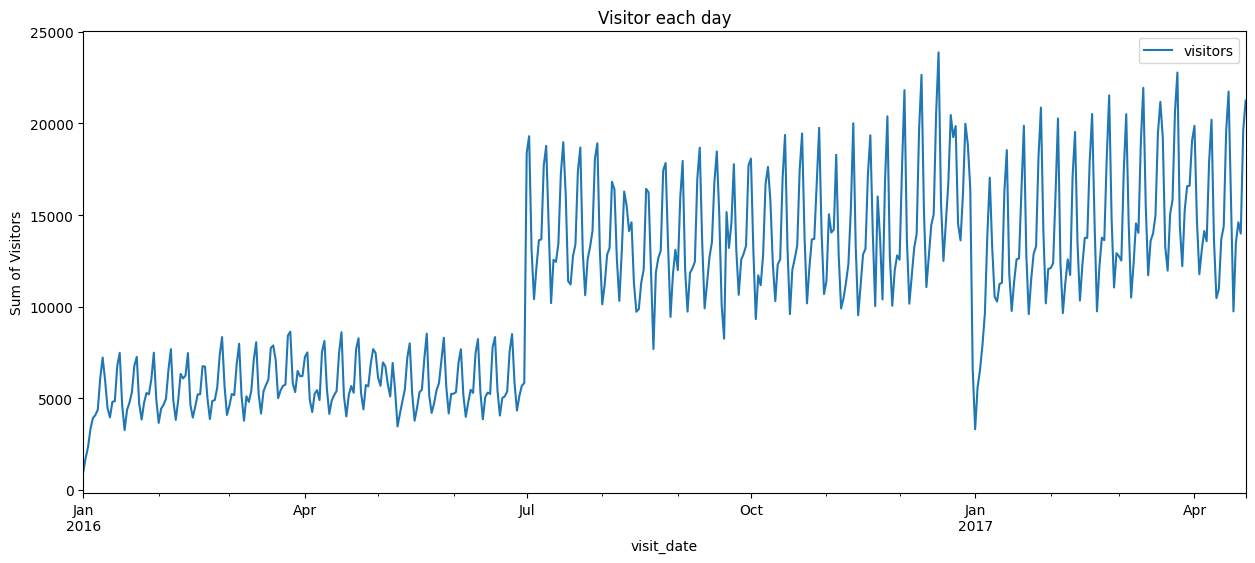

In [ ]:
# Visitor each day
plt1 = visits_df_past.groupby(['visit_date'], as_index=False).agg({'visitors': np.sum})
plt1=plt1.set_index('visit_date')
plt1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")

In [ ]:
visits_df["jump_flag"] = visits_df["visit_date"].apply(lambda x: '1' if x.strftime('%Y-%m-%d') < '2016-7-01' else 0)

There is a sudden jump in the daily visitors from July onwards. Could be because new restaurants might be added. Let's check.

In [ ]:
# Number of store_ids by month
plt2 = visits_df_past.groupby(['visit_date'], as_index=False).agg({'air_store_id': ['count', 'size', 'nunique']})
plt2

visit_date air_store_id             
                      count size nunique
0   2016-01-01           46   46      46
1   2016-01-02           62   62      62
2   2016-01-03           80   80      80
3   2016-01-04          157  157     157
4   2016-01-05          230  230     230
5   2016-01-06          247  247     247
6   2016-01-07          258  258     258
7   2016-01-08          274  274     274
8   2016-01-09          280  280     280
9   2016-01-10          224  224     224
10  2016-01-11          201  201     201
11  2016-01-12          251  251     251
12  2016-01-13          260  260     260
13  2016-01-14          271  271     271
14  2016-01-15          287  287     287
15  2016-01-16          279  279     279
16  2016-01-17          213  213     213
17  2016-01-18          225  225     225
18  2016-01-19          266  266     266
19  2016-01-20          260  260     260
20  2016-01-21          275  275     275
21  2016-01-22          287  287     287
22  2016-01-23          286  286     286
23  2016-01-24          199  199     199
24  2016-01-25          235  235     235
25  2016-01-26          264  264     264
26  2016-01-27          271  271     271
27  2016-01-28          278  278     278
28  2016-01-29          285  285     285
29  2016-01-30          286  286     286
30  2016-01-31          212  212     212
31  2016-02-01          229  229     229
32  2016-02-02          270  270     270
33  2016-02-03          265  265     265
34  2016-02-04          278  278     278
35  2016-02-05          292  292     292
36  2016-02-06          281  281     281
37  2016-02-07          206  206     206
38  2016-02-08          239  239     239
39  2016-02-09          272  272     272
40  2016-02-10          275  275     275
41  2016-02-11          261  261     261
42  2016-02-12          284  284     284
43  2016-02-13          287  287     287
44  2016-02-14          211  211     211
45  2016-02-15          235  235     235
46  2016-02-16          264  264     264
47  2016-02-17          265  265     265
48  2016-02-18          266  266     266
49  2016-02-19          286  286     286
50  2016-02-20          287  287     287
51  2016-02-21          211  211     211
52  2016-02-22          226  226     226
53  2016-02-23          263  263     263
54  2016-02-24          270  270     270
55  2016-02-25          277  277     277
56  2016-02-26          292  292     292
57  2016-02-27          288  288     288
58  2016-02-28          225  225     225
59  2016-02-29          232  232     232
60  2016-03-01          266  266     266
61  2016-03-02          273  273     273
62  2016-03-03          275  275     275
63  2016-03-04          292  292     292
64  2016-03-05          284  284     284
65  2016-03-06          216  216     216
66  2016-03-07          230  230     230
67  2016-03-08          271  271     271
68  2016-03-09          269  269     269
69  2016-03-10          280  280     280
70  2016-03-11          292  292     292
71  2016-03-12          285  285     285
72  2016-03-13          214  214     214
73  2016-03-14          237  237     237
74  2016-03-15          272  272     272
75  2016-03-16          274  274     274
76  2016-03-17          279  279     279
77  2016-03-18          290  290     290
78  2016-03-19          282  282     282
79  2016-03-20          236  236     236
80  2016-03-21          204  204     204
81  2016-03-22          258  258     258
82  2016-03-23          274  274     274
83  2016-03-24          270  270     270
84  2016-03-25          297  297     297
85  2016-03-26          288  288     288
86  2016-03-27          218  218     218
87  2016-03-28          242  242     242
88  2016-03-29          278  278     278
89  2016-03-30          279  279     279
90  2016-03-31          278  278     278
91  2016-04-01          293  293     293
92  2016-04-02          285  285     285
93  2016-04-03          208  208     208
94  2016-04-04          237  237     237
95  2016-04-05          274

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- There is an interesting long-term step structure in the overall time series. This might be related to new restaurants being added to the data base. In addition, we already see a periodic pattern that most likely corresponds to a weekly cycle.

#### Visitors Distribution

Text(0.5, 0.98, 'Distribution of visitors')

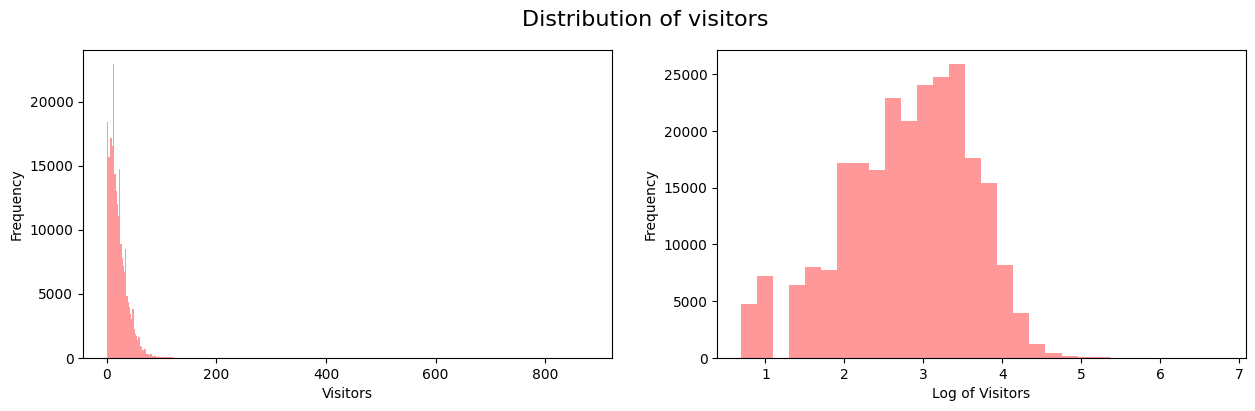

In [ ]:
# plot
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 4, forward=True)

sns.distplot(visits_df_past['visitors'], kde = False, color ='red', bins = 400, ax=ax[0])
sns.distplot(np.log1p(visits_df_past['visitors']), kde = False, color ='red', bins = 30, ax=ax[1])

ax[0].set_xlabel('Visitors')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Log of Visitors')
ax[1].set_ylabel('Frequency')

fig.suptitle('Distribution of visitors', fontsize=16)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The number of visitors per visit per restaurant per day peaks at around 20 (the top line in left chart). The distribution extends up to 100 and, in rare cases, beyond.
- The distribution of visitors is skewed
- Log transformation can be used to make it closer to shape of normal distribution.

**Median number of visitors in day of a week and month of a year.**

Prepare data.

In [ ]:
# Median number of visitor in day of a week
plt1 = visits_df_past.groupby(['day_of_week'], as_index=False).agg({'visitors': np.median})
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = plt1['day_of_week'].map(mapping)
plt1 = plt1.iloc[key.argsort()].set_index('day_of_week').reset_index()


# Median number of visitor in Month of a Year
visits_df_past['Month']=visits_df_past['visit_date'].apply(lambda x: calendar.month_name[x.month])
plt2 = visits_df_past.groupby(['Month'], as_index=False).agg({'visitors': np.median})

Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
mapping = {Month: i for i, Month in enumerate(Months)}
key = plt2['Month'].map(mapping)
plt2 = plt2.iloc[key.argsort()].set_index('Month').reset_index()

Plot it.

Text(0.5, 0.98, 'Distribution of visitors')

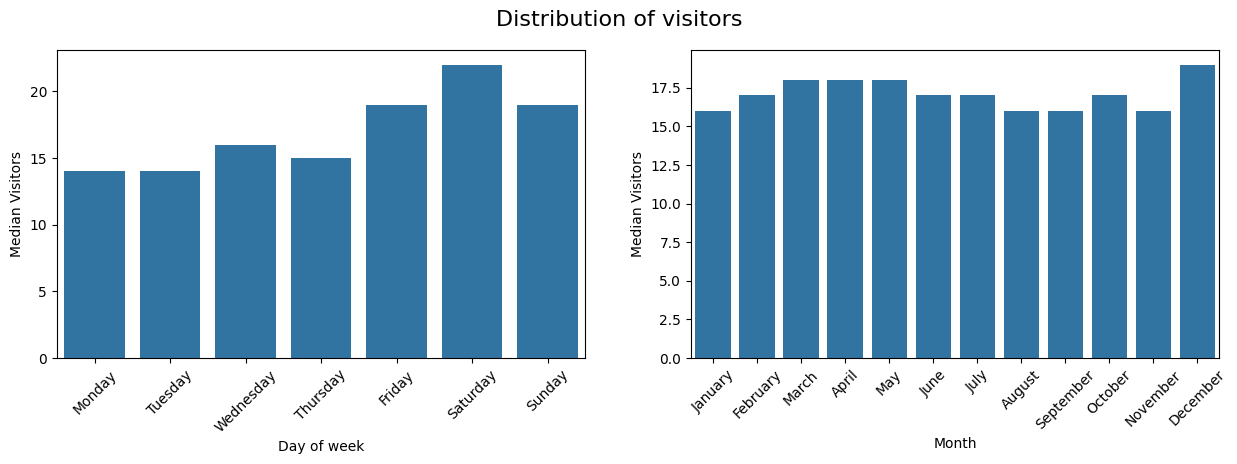

In [ ]:
#plot
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,4, forward=True)

sns.barplot(x="day_of_week",y="visitors",data=plt1,ax=ax[0])
sns.barplot(x="Month",y="visitors",data=plt2,ax=ax[1])
ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Median Visitors')
ax[1].set_ylabel('Median Visitors')
for ax in ax:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle('Distribution of visitors', fontsize=16)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Friday and the weekend appear to be the most popular days, which is expected.
- Monday and Tuesday have the lowest numbers of average visitors.
- There is a certain amount of variation during the year.
- December appears to be the most popular month for restaurant visits.
- The period of March - May is also consistently busy.
- The period of August - September appears to receive lesser visitors relatively.  

### Reservation

In [ ]:
reserves_df.head()

air_store_id       visit_datetime     reserve_datetime  reserve_visitors
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00                 1
1  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00                 3
2  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00                 6
3  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00                 2
4  air_db80363d35f10926  2016-01-01 20:00:00  2016-01-01 01:00:00                 5

Reserve new date related variables.

In [ ]:
reserves_df['visit_datetime'] =  pd.to_datetime(reserves_df['visit_datetime'], format='%Y-%m-%d %H:%M:%S')
reserves_df['reserve_datetime'] =  pd.to_datetime(reserves_df['reserve_datetime'], format='%Y-%m-%d %H:%M:%S')
reserves_df['visit_hour'] = reserves_df['visit_datetime'].apply(lambda x: x.time().hour)
reserves_df['reserve_hour'] = reserves_df['reserve_datetime'].apply(lambda x: x.time().hour)
reserves_df['visit_date'] = reserves_df['visit_datetime'].apply(lambda x: x.date())
reserves_df['reserve_date'] = reserves_df['reserve_datetime'].apply(lambda x: x.date())
reserves_df['reserve_ahead'] = reserves_df["visit_datetime"] - reserves_df["reserve_datetime"]
reserves_df['hours_ahead'] = (reserves_df["reserve_ahead"]/pd.Timedelta('1 hour')).astype(int)
reserves_df['days_ahead'] = reserves_df.reserve_ahead.apply(lambda delta_t: delta_t.days)

Plot

Text(0.5, 1.0, 'Reserve Visitor each day')

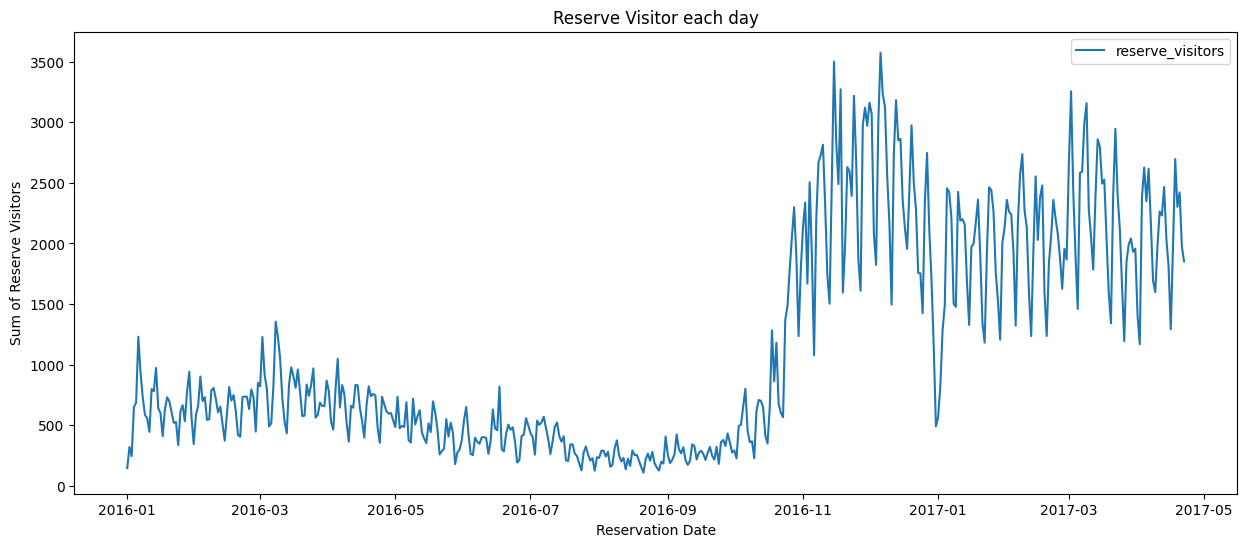

In [ ]:
# Reservations each day
plt1 = reserves_df.groupby(['reserve_date'], as_index=False).agg({'reserve_visitors': np.sum})
plt1 = plt1.set_index('reserve_date')
plt1.plot(figsize=(15, 6))
plt.ylabel("Sum of Reserve Visitors")
plt.xlabel("Reservation Date")
plt.title("Reserve Visitor each day")

Number of visitors increased from 1st July 2016 as per visitors data as more restaurants were added to the data. But, the same isn't observed in reservation data. Let's see the restaurant count for reservation data

In [ ]:
# Number of store_ids by month
plt2 = reserves_df.groupby(['reserve_date'], as_index=False).agg({'air_store_id': ['count', 'size', 'nunique']})
plt2

reserve_date air_store_id             
                        count size nunique
0     2016-01-01           42   42      22
1     2016-01-02           68   68      36
2     2016-01-03           49   49      41
3     2016-01-04          114  114      61
4     2016-01-05          152  152      73
5     2016-01-06          219  219      88
6     2016-01-07          184  184      79
7     2016-01-08          164  164      63
8     2016-01-09          152  152      70
9     2016-01-10          113  113      49
10    2016-01-11          111  111      54
11    2016-01-12          162  162      66
12    2016-01-13          176  176      86
13    2016-01-14          202  202      73
14    2016-01-15          139  139      61
15    2016-01-16          152  152      68
16    2016-01-17          117  117      56
17    2016-01-18          153  153      68
18    2016-01-19          165  165      67
19    2016-01-20          165  165      69
20    2016-01-21          156  156      74
21    2016-01-22          122  122      61
22    2016-01-23          117  117      54
23    2016-01-24           83   83      46
24    2016-01-25          157  157      67
25    2016-01-26          154  154      65
26    2016-01-27          139  139      64
27    2016-01-28          164  164      77
28    2016-01-29          160  160      74
29    2016-01-30          112  112      57
30    2016-01-31           97   97      50
31    2016-02-01          124  124      62
32    2016-02-02          147  147      67
33    2016-02-03          190  190      78
34    2016-02-04          160  160      74
35    2016-02-05          170  170      72
36    2016-02-06          161  161      66
37    2016-02-07          124  124      51
38    2016-02-08          173  173      79
39    2016-02-09          176  176      70
40    2016-02-10          161  161      71
41    2016-02-11          136  136      58
42    2016-02-12          153  153      75
43    2016-02-13          125  125      60
44    2016-02-14           99   99      55
45    2016-02-15          152  152      60
46    2016-02-16          161  161      70
47    2016-02-17          167  167      76
48    2016-02-18          158  158      76
49    2016-02-19          153  153      69
50    2016-02-20          117  117      63
51    2016-02-21           91   91      55
52    2016-02-22          155  155      66
53    2016-02-23          172  172      76
54    2016-02-24          164  164      71
55    2016-02-25          155  155      71
56    2016-02-26          173  173      84
57    2016-02-27          149  149      70
58    2016-02-28          111  111      55
59    2016-02-29          152  152      70
60    2016-03-01          178  178      79
61    2016-03-02          206  206      86
62    2016-03-03          174  174      76
63    2016-03-04          176  176      81
64    2016-03-05          125  125      67
65    2016-03-06          102  102      49
66    2016-03-07          175  175      80
67    2016-03-08          218  218      93
68    2016-03-09          229  229      84
69    2016-03-10          210  210      83
70    2016-03-11          146  146      67
71    2016-03-12          140  140      65
72    2016-03-13           98   98      53
73    2016-03-14          193  193      86
74    2016-03-15          200  200      89
75    2016-03-16          190  190      80
76    2016-03-17          203  203      82
77    2016-03-18          196  196      85
78    2016-03-19          206  206      70
79    2016-03-20          156  156      70
80    2016-03-21          137  137      59
81    2016-03-22          177  177      80
82    2016-03-23          151  151      69
83    2016-03-24          188  188      76
84    2016-03-25          181  181      74
85    2016-03-26          138  138      62
86    2016-03-27          108  108      59
87    2016-03-28          132  132      59
88    2016-03-29          150  150      70
89    2016-03-30          154  154      72
90    2016-03-31          162  162      74
91   

New restaurants were added to the reservation data only after 24th Oct 2016, that's why the upward trend of visitors didd't match the trend of reservations.

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Reservations made in 2016 are in the range of 100 to 1000 for the first 10 months of the year and increased to the range of 1500 to 3500 towards the end of the year
- New restaurants were added to the data from 24th Oct 2016
- Number of reservations stayed strong during 2017, in the range of 1500 to 3000
- A clear seasonality can be seen in reservations, probably weekly seasonality

In [ ]:
# Reservations each day
plt1 = reserves_df.groupby(['visit_hour'], as_index=False).agg({'reserve_visitors': np.sum})
plt2 = reserves_df.groupby(['reserve_hour'], as_index=False).agg({'reserve_visitors': np.sum})

Text(0.5, 0.98, 'Distribution of visits and reservations')

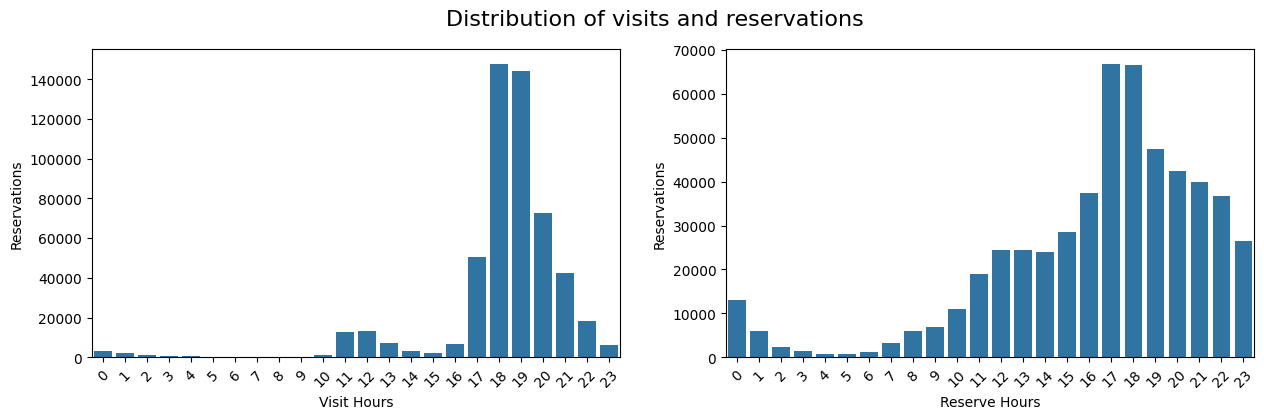

In [ ]:
#plot
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,4, forward=True)

sns.barplot(x="visit_hour",y="reserve_visitors",data=plt1,ax=ax[0])
sns.barplot(x="reserve_hour",y="reserve_visitors",data=plt2,ax=ax[1])
ax[0].set_xlabel('Visit Hours')
ax[1].set_xlabel('Reserve Hours')
ax[0].set_ylabel('Reservations')
ax[1].set_ylabel('Reservations')
for ax in ax:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle('Distribution of visits and reservations', fontsize=16)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Reservations are made typically for the dinner hours in the evening and evening
- Majority of reservations are made during evening hours 5pm to 7pm

In [ ]:
# Reservations each day
plt1 = reserves_df.groupby(['hours_ahead'], as_index=False).agg({'reserve_visitors': np.sum})

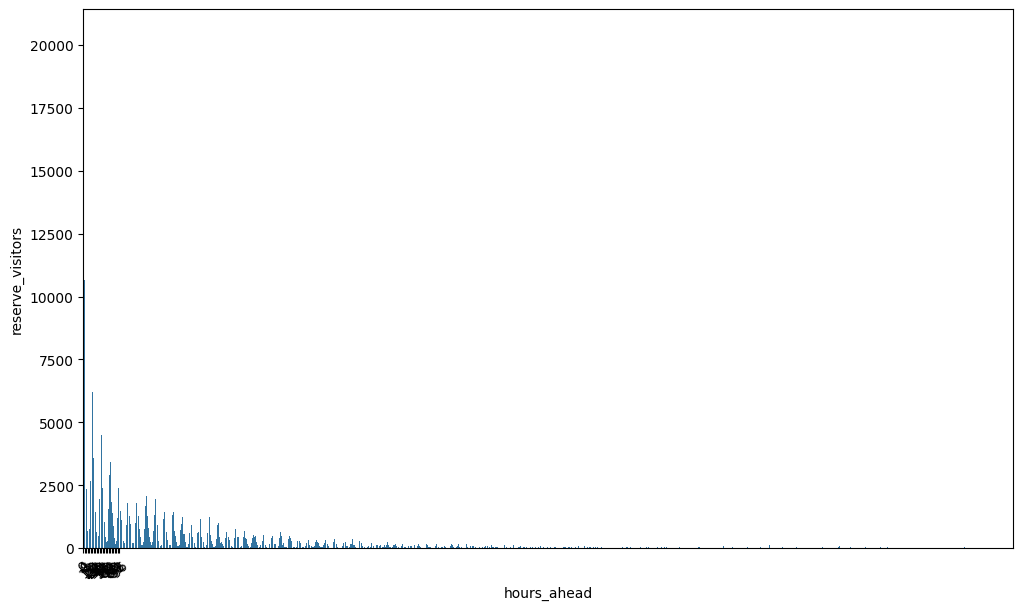

In [ ]:
#plot
plt.figure(figsize=(12,7))
sns.barplot(x="hours_ahead",y="reserve_visitors",data=plt1)

plt.xticks(np.arange(0, 100, 4),
    rotation=45
);

Nothing can be seen clearly, let's filter the data for hours_ahead less than 100

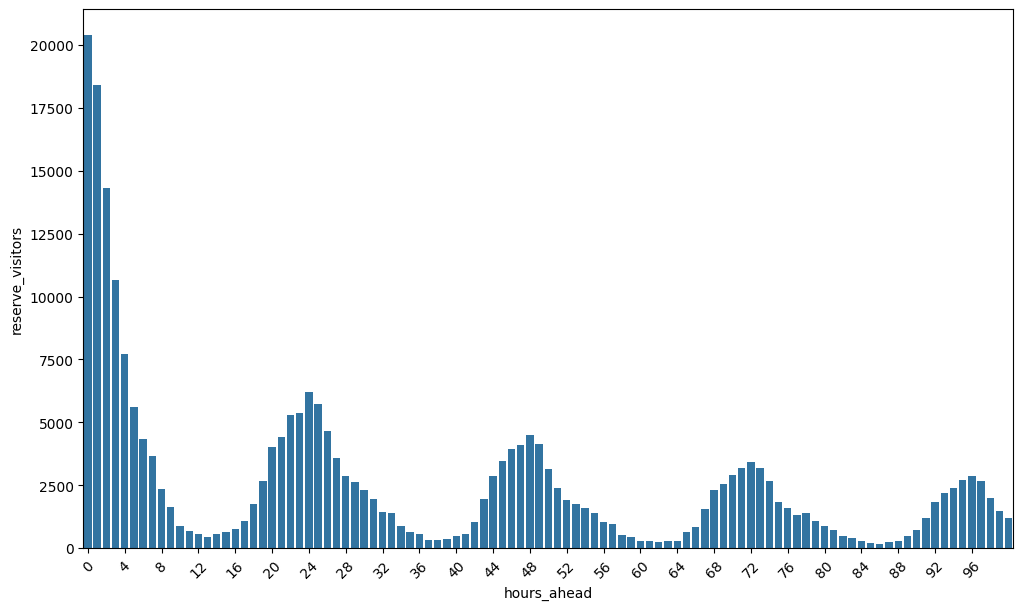

In [ ]:
#plot
plt.figure(figsize=(12,7))
sns.barplot(x="hours_ahead",y="reserve_visitors",data=plt1[(plt1['hours_ahead'] <= 100)])

plt.xticks(np.arange(0, 100, 4),
    rotation=45
);

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The time between making a reservation and visiting the restaurant follow a nice 24 hours pattern.
- The most popular strategy is to reserve a couple of hours before the visit, but if the reservation is made more in advance then it seems to be common to book a table in the evening for one of the next evenings.
- There are people who book well in advance even more than couple of months, might be coroporate bookings or pre planned parties

### Store Info Data

In [ ]:
stores_df.head()

air_store_id  air_genre_name                 air_area_name  latitude_air  longitude_air          hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853  hpg_9b38b9e13da6da27            NaN           NaN           NaN            NaN
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599                   NaN            NaN           NaN           NaN            NaN

In [ ]:
!pip install folium

In [ ]:
# Location of stores in Japan
import folium
from folium import plugins

location =stores_df.groupby(['latitude_air', 'longitude_air']).size().reset_index()
locationheat = location[['latitude_air', 'longitude_air']]
locationheat = locationheat.values.tolist()

map1 = folium.Map(location=[39, 139], tiles = "Stamen Watercolor",attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL', zoom_start = 5)

heatmap=plugins.HeatMap(locationheat).add_to(map1)
map1

In [ ]:
# Number of restaurants in area: Air Data
airS1=stores_df['air_area_name'].value_counts().reset_index().sort_index()
airS2=stores_df['air_genre_name'].value_counts().reset_index().sort_index()

Text(0, 0.5, 'Number of Restaurants')

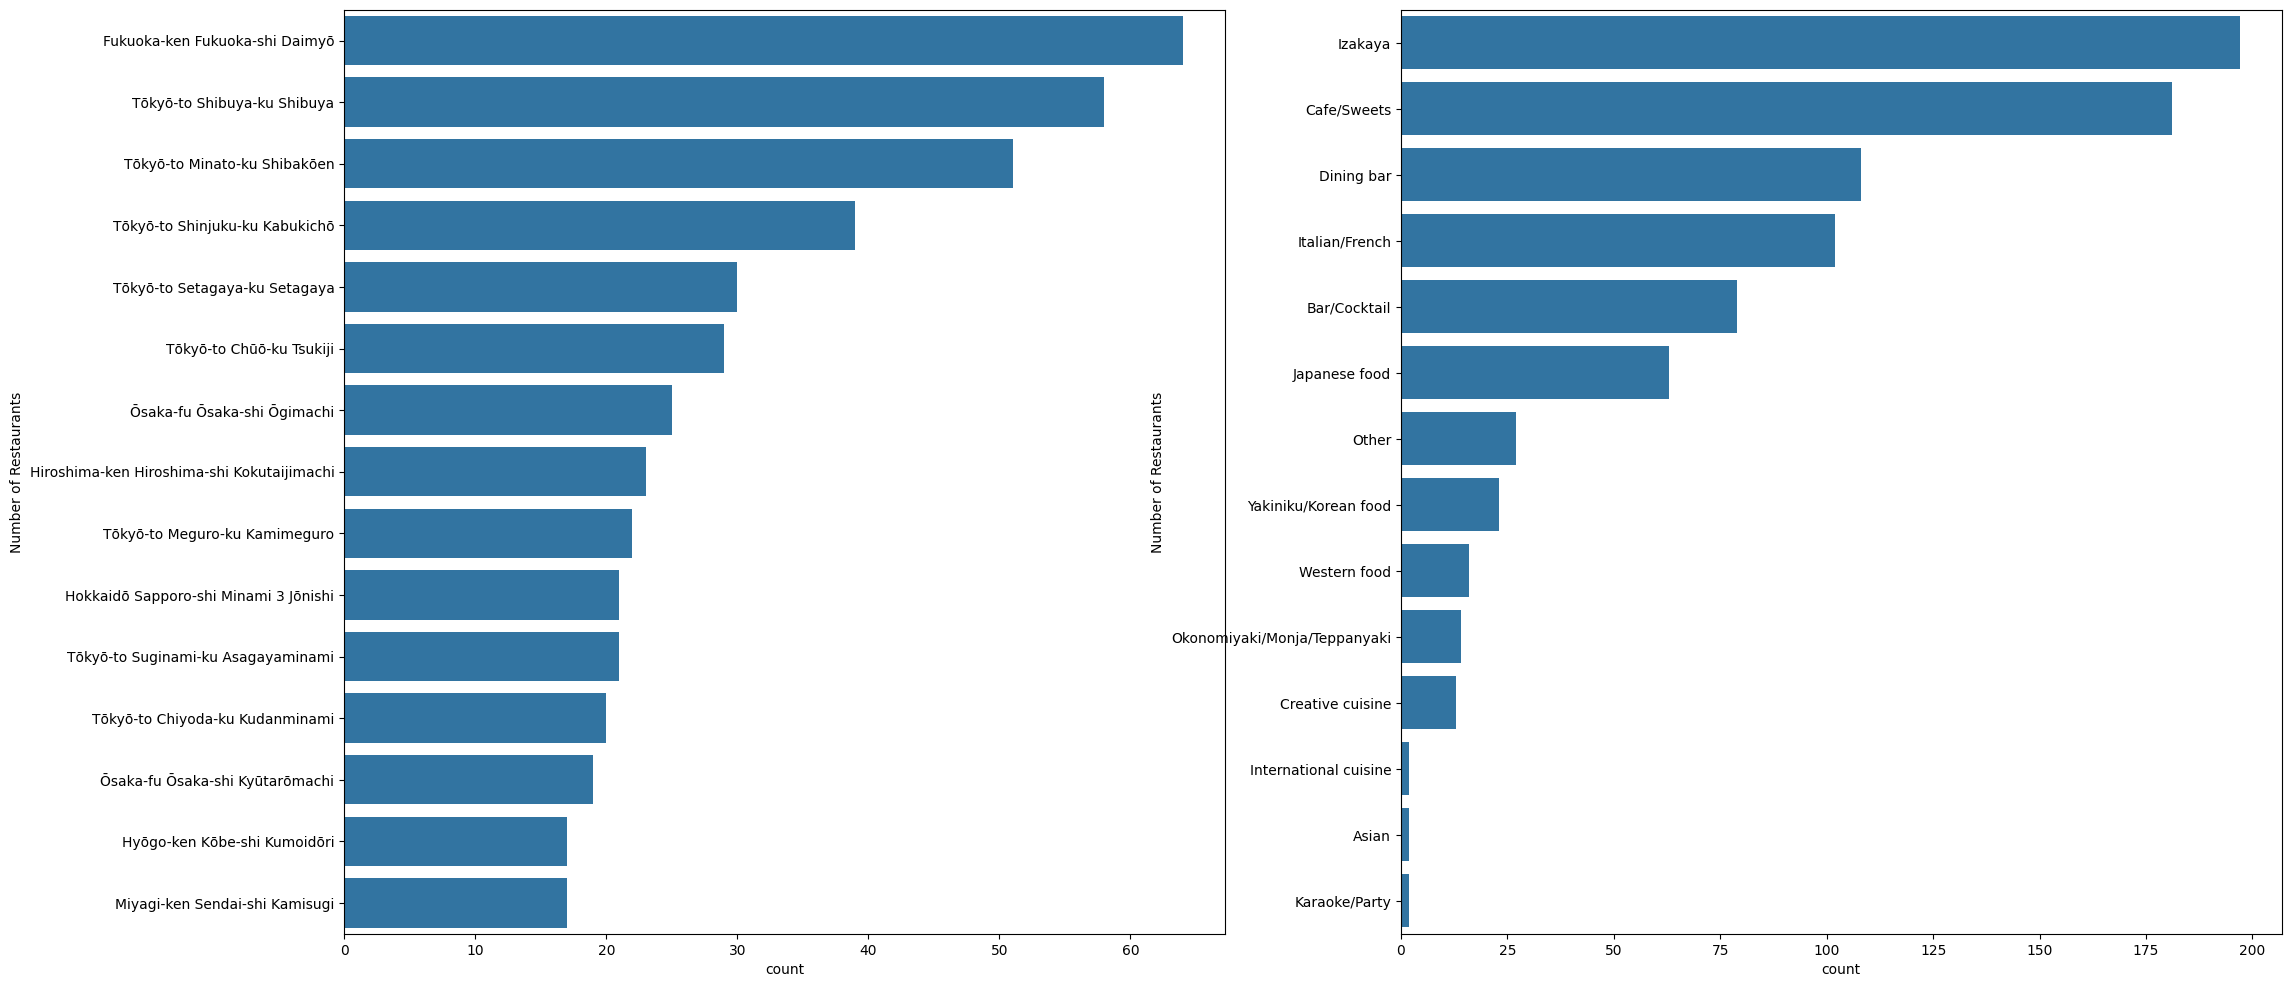

In [ ]:
fig,ax = plt.subplots(1,2)
sns.barplot(y='air_area_name' ,x='count',data=airS1.iloc[:15],ax=ax[0])
sns.barplot(y='air_genre_name',x='count',data=airS2.iloc[:15],ax=ax[1])
fig.set_size_inches(25,12)
ax[0].set_ylabel('Number of Restaurants')
ax[1].set_ylabel('Number of Restaurants')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Fukuoka-ken Fukuoka-shi Daimyo has the maximum restaurants
- Izakaya genre has the maximum resturants

## **5. Feature Engineering**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Feature Engineering</h2>
</div>

Feature engineering is the process of using domain and statistical knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

### Domain Specific Features

You need to engineer the domain specific features. This might boost up the predictive power. This often gives better performing models

Domain knowledge is one of the key pillars of data science. So always understand the domain before attempting the problem.

### Visits Data

In [ ]:
visits_df.head()

dataset                               id          air_store_id visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday jump_flag
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24 2016-01-13        25   Wednesday            0        0            0                    0                     0         1
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24 2016-01-14        32    Thursday            0        0            0                    0                     0         1
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24 2016-01-15        29      Friday            0        0            0                    1                     0         1
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24 2016-01-16        22    Saturday            0        1            1                    1                     0         1
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24 2016-01-18         6      Monday            0        0            0                    0                     1         1

#### Year, Day, Month etc

- Engineer features like weekday, year, month, day of year, days in month, week of year, is it month end

In [ ]:
# Extract features
visits_df['weekday']       = visits_df.visit_date.dt.dayofweek
visits_df['year']          = visits_df.visit_date.dt.year
visits_df['month']         = visits_df.visit_date.dt.month
visits_df['day_of_year']   = visits_df.visit_date.dt.dayofyear
visits_df['days_in_month'] = visits_df.visit_date.dt.days_in_month
visits_df['week_of_year']  = visits_df.visit_date.dt.isocalendar().week
visits_df['is_month_end']  = visits_df.visit_date.dt.is_month_end

#### Holiday Features
- Extract holiday features

In [ ]:
# Extract features
visits_df['tomorrow_is_holiday']  = visits_df.day_off_flg.shift(-1).fillna(0).astype(int)
visits_df['yesterday_is_holiday'] = visits_df.day_off_flg.shift(1).fillna(0).astype(int)

#### Stores Information

In [ ]:
stores_df.head()

air_store_id  air_genre_name                 air_area_name  latitude_air  longitude_air          hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853  hpg_9b38b9e13da6da27            NaN           NaN           NaN            NaN
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599                   NaN            NaN           NaN           NaN            NaN

__Split area_name string to get different levels of location names__

In [ ]:
# Extract features from air_area_name
area_split              = stores_df.air_area_name.str.split(' ', expand=True)

stores_df['Todofuken']  = area_split[0]  # prefecture
stores_df['city']       = area_split[1]
stores_df['street']     = area_split.iloc[:, 2:].apply(lambda row: ' '.join(row.dropna()), axis=1)

In [ ]:
stores_df.head()

air_store_id  air_genre_name                 air_area_name  latitude_air  longitude_air          hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg  Todofuken       city     street
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853  hpg_9b38b9e13da6da27            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599                   NaN            NaN           NaN           NaN            NaN   Tōkyō-to  Minato-ku  Shibakōen

__Count the number of stores in the same location__

In [ ]:
# Extract Features
n_stores_by_street    = stores_df.groupby(['air_area_name']).size().to_frame(name='n_stores_same_street').reset_index()
n_stores_by_city      = stores_df.groupby(['Todofuken', 'city']).size().to_frame(name='n_stores_same_city').reset_index()
n_stores_by_Todofuken = stores_df.groupby('Todofuken').size().to_frame(name='n_stores_same_Todofuken').reset_index()

In [ ]:
# Merge the features to stores_df
stores_df = pd.merge(left=stores_df, right=n_stores_by_street, how='left', on='air_area_name')
stores_df = pd.merge(left=stores_df, right=n_stores_by_city, how='left', on=['Todofuken', 'city'])
stores_df = pd.merge(left=stores_df, right=n_stores_by_Todofuken, how='left', on='Todofuken')

In [ ]:
stores_df.head()

air_store_id  air_genre_name                 air_area_name  latitude_air  longitude_air          hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg  Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri                    17                  25                       57
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853  hpg_9b38b9e13da6da27            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri                    17                  25                       57
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri                    17                  25                       57
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri     34.695124     135.197853                   NaN            NaN           NaN           NaN            NaN  Hyōgo-ken   Kōbe-shi  Kumoidōri                    17                  25                       57
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599                   NaN            NaN           NaN           NaN            NaN   Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444

#### Create Master Data Frame

Create a master dataframe that combines visits, stores data and reservations data.

In the process, aggregate reservations data by store_id and visit date to create the number of visitors every day as a new feature.

In [ ]:
# Convert visit date features to %Y-%m-%d format
reserves_df['visit_date'] =  pd.to_datetime(reserves_df['visit_date'], format='%Y-%m-%d')
temp = reserves_df.copy()
temp.head()

air_store_id      visit_datetime    reserve_datetime  reserve_visitors  visit_hour  reserve_hour visit_date reserve_date   reserve_ahead  hours_ahead  days_ahead
0  air_877f79706adbfb06 2016-01-01 19:00:00 2016-01-01 16:00:00                 1          19            16 2016-01-01   2016-01-01 0 days 03:00:00            3           0
1  air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00                 3          19            19 2016-01-01   2016-01-01 0 days 00:00:00            0           0
2  air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00                 6          19            19 2016-01-01   2016-01-01 0 days 00:00:00            0           0
3  air_877f79706adbfb06 2016-01-01 20:00:00 2016-01-01 16:00:00                 2          20            16 2016-01-01   2016-01-01 0 days 04:00:00            4           0
4  air_db80363d35f10926 2016-01-01 20:00:00 2016-01-01 01:00:00                 5          20             1 2016-01-01   2016-01-01 0 days 19:00:00           19           0

In [ ]:
# Group the values by air store id and visit date
temp = temp.groupby(["air_store_id", "visit_date"], as_index= False).agg({'reserve_visitors': ['count','sum'], 'visit_hour': np.mean,'reserve_hour': np.mean, 'hours_ahead' : np.mean  })
temp.columns = ["air_store_id", "visit_date", "reserve_vistors_count", "reserve_visitors", "visit_hour", "reserve_hour", "hours_ahead"]
temp.head()

air_store_id visit_date  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead
0  air_00a91d42b08b08d9 2016-01-14                      1                 2        19.0          14.0         77.0
1  air_00a91d42b08b08d9 2016-01-15                      1                 4        18.0          20.0        142.0
2  air_00a91d42b08b08d9 2016-01-16                      1                 2        18.0          20.0         70.0
3  air_00a91d42b08b08d9 2016-01-22                      1                 2        18.0           8.0         82.0
4  air_00a91d42b08b08d9 2016-01-29                      1                 5        18.0          18.0        144.0

In [ ]:
# Merge the datasets and create a master data set
master_df = pd.merge(visits_df,stores_df, on = "air_store_id", how = "left")
master_df = pd.merge(master_df,temp, on = ["air_store_id", "visit_date"], how = "left")
print(master_df.shape)
master_df.head()

(282487, 39)


dataset                               id          air_store_id visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24 2016-01-13        25   Wednesday            0        0            0                    0                     0         1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24 2016-01-14        32    Thursday            0        0            0                    0                     0         1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24 2016-01-15        29      Friday            0        0            0                    1                     0         1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24 2016-01-16        22    Saturday            0        1            1                    0                     0         1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24 2016-01-18         6      Monday            0        0            0                    0                     1         1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN

### Feature Engineering: Interaction between features

Create features by combining various features

### Combination of categorical columns
- Create features by combining the categorical columns

In [ ]:
def catStrFeatures(df, colname1, colname2, sep='_'):
    series = df[colname1].astype(str).str.cat(df[colname2].astype(str), sep=sep)
    return series

In [ ]:
# Create features by concatenating 2 or more features
master_df['area_genre'] = catStrFeatures(master_df, 'air_area_name', 'air_genre_name')
master_df['store_weekday'] = catStrFeatures(master_df, 'air_store_id', 'weekday')
master_df['store_weekday_holiday'] = catStrFeatures(master_df, 'store_weekday', 'holiday_flg')

### Target Variable Derived

- Find the mean, median, max, min of visitors for each store-weekday-holiday combination.
- The idea is to provide a very rough range estimate of # visitors based on historic statistics.

In [ ]:
# Get the visitors statistics like mean visitors, median visitors, min and max visitors
visitor_stats = master_df\
                .query('dataset == "past"')\
                .groupby(['air_store_id', 'weekday', 'holiday_flg'])\
                ['visitors']\
                .agg(['mean','median', 'min', 'max'])\
                .rename(columns=lambda colname: str(colname)+'_visitors')\
                .reset_index()

In [ ]:
# Merge the visitor stats data to master dataframe
master_df = master_df.merge(visitor_stats, how='left', on=['air_store_id', 'weekday', 'holiday_flg'])

In [ ]:
master_df.head()

dataset                               id          air_store_id visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24 2016-01-13        25   Wednesday            0        0            0                    0                     0         1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24 2016-01-14        32    Thursday            0        0            0                    0                     0         1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24 2016-01-15        29      Friday            0        0            0                    1                     0         1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24 2016-01-16        22    Saturday            0        1            1                    0                     0         1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24 2016-01-18         6      Monday            0        0            0                    0                     1         1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato-ku Shibakōe

Make a copy of the dataframe for univariate models.

In [ ]:
# Make a copy of master dataframe for univariate models
df_univariate = master_df.copy()

df_univariate.to_csv("df_univariate.csv",index = False)

## **6. Exploratory Data Analysis - Part 2**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Exploratory Data Analysis - Part 2</h2>
</div>

- Distribution of holidays and impact on visitors
- Analyze the genre information

### Distribution of holiday flag

Let's check the count of holidays vs holidays

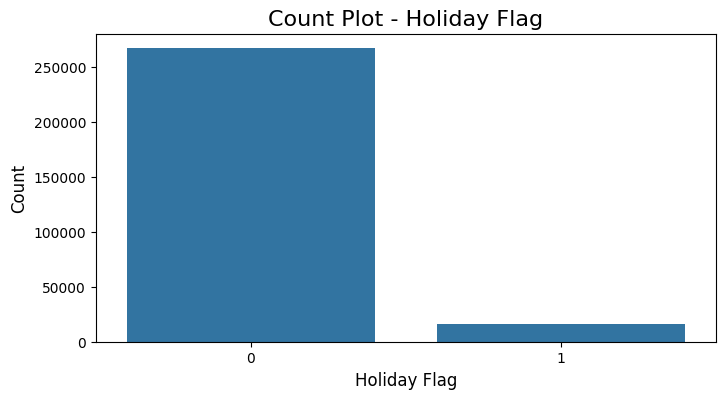

In [ ]:
# Count of holidays and non holidays
plt.figure(figsize=(8,4))
sns.countplot(x='holiday_flg', data=master_df)
plt.title("Count Plot - Holiday Flag", fontsize = 16)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Holiday Flag", fontsize = 12)
plt.show()

In [ ]:
# Value Count of holiday flag
master_df.holiday_flg.value_counts()

holiday_flg
0    266508
1     15979
Name: count, dtype: int64

**Distribution of visitors by holiday flag**

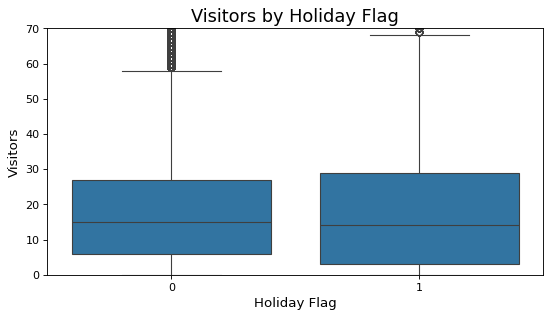

In [ ]:
# Check distribution of visitors for holiday flag
plt.figure(figsize=(8,4), dpi= 80)
sns.boxplot(x ='holiday_flg', y = 'visitors', data = master_df, notch=False)
plt.title('Visitors by Holiday Flag', fontsize = 16)
plt.ylabel("Visitors", fontsize = 12)
plt.xlabel("Holiday Flag", fontsize = 12)
plt.ylim(0,70)
plt.show()

Certain holidays have lower visitors as well.

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The count of holidays is only 0.06 times of the count of non holidays
- The number of visitors on holidays has a larger band. However, a clear shift in number of visitors can't be seen in the visitor's distribution for holiday flag, the possible reason can be the fact that weekends aren't included in the holidays

Let's look at the distribution of visitors for all the off days

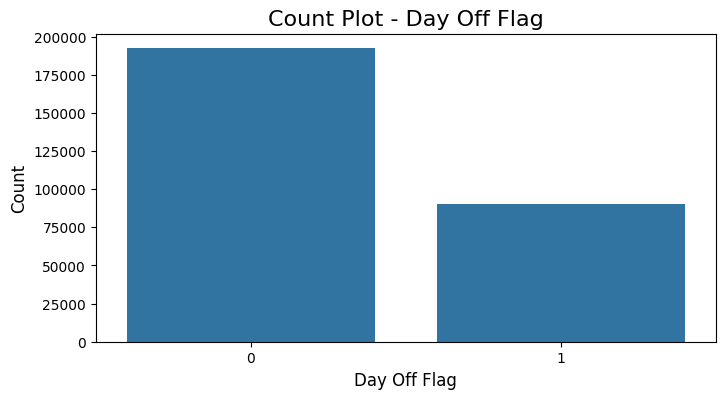

In [ ]:
# Count of holidays and non holidays
plt.figure(figsize=(8,4))
sns.countplot(x='day_off_flg', data=master_df)
plt.title("Count Plot - Day Off Flag", fontsize = 16)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Day Off Flag", fontsize = 12)
plt.show()

**Number of visitors by Day off Flag**

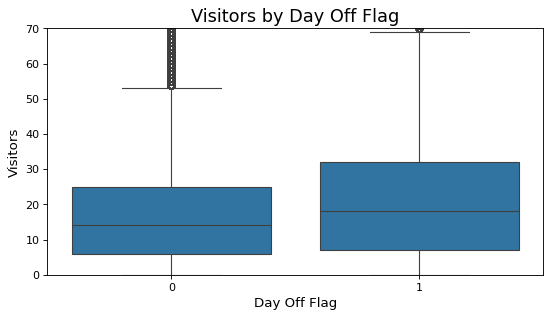

In [ ]:
# Check distribution of visitors for Day-Off flag
plt.figure(figsize=(8,4), dpi= 80)
sns.boxplot(x ='day_off_flg', y = 'visitors', data = master_df, notch=False)
plt.title('Visitors by Day Off Flag', fontsize = 16)
plt.ylabel("Visitors", fontsize = 12)
plt.xlabel("Day Off Flag", fontsize = 12)
plt.ylim(0,70)
plt.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The number of visitors are higher on an off day as compared to the working day

Let's look at another way to analyze it

#### Violin Plot

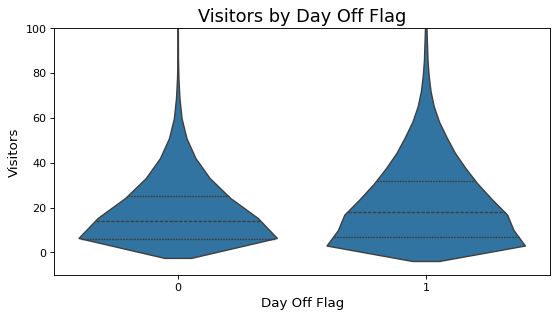

In [ ]:
# Check distribution of visitors for holiday flag using violin plot
plt.figure(figsize=(8,4), dpi= 80)
sns.violinplot(x ='day_off_flg', y = 'visitors', data = master_df, scale='width', inner='quartile')
plt.title('Visitors by Day Off Flag', fontsize = 16)
plt.ylabel("Visitors", fontsize = 12)
plt.xlabel("Day Off Flag", fontsize = 12)
plt.ylim(-10,100)
plt.show()

### Visitors by Genre

Let's analyze various genre and find out if there's a specific genre which is dominating over others

In [ ]:
# Aggregate the visitors data for Air Genre and visit date
genre_df = master_df.loc[master_df.dataset == "past",:].groupby(['air_genre_name', 'visit_date'], as_index = False).agg({'visitors' : 'mean'})
genre_df.head()

air_genre_name visit_date  visitors
0          Asian 2016-05-01      65.0
1          Asian 2016-05-07      49.0
2          Asian 2016-05-08      51.0
3          Asian 2016-05-09      21.0
4          Asian 2016-05-10      36.0

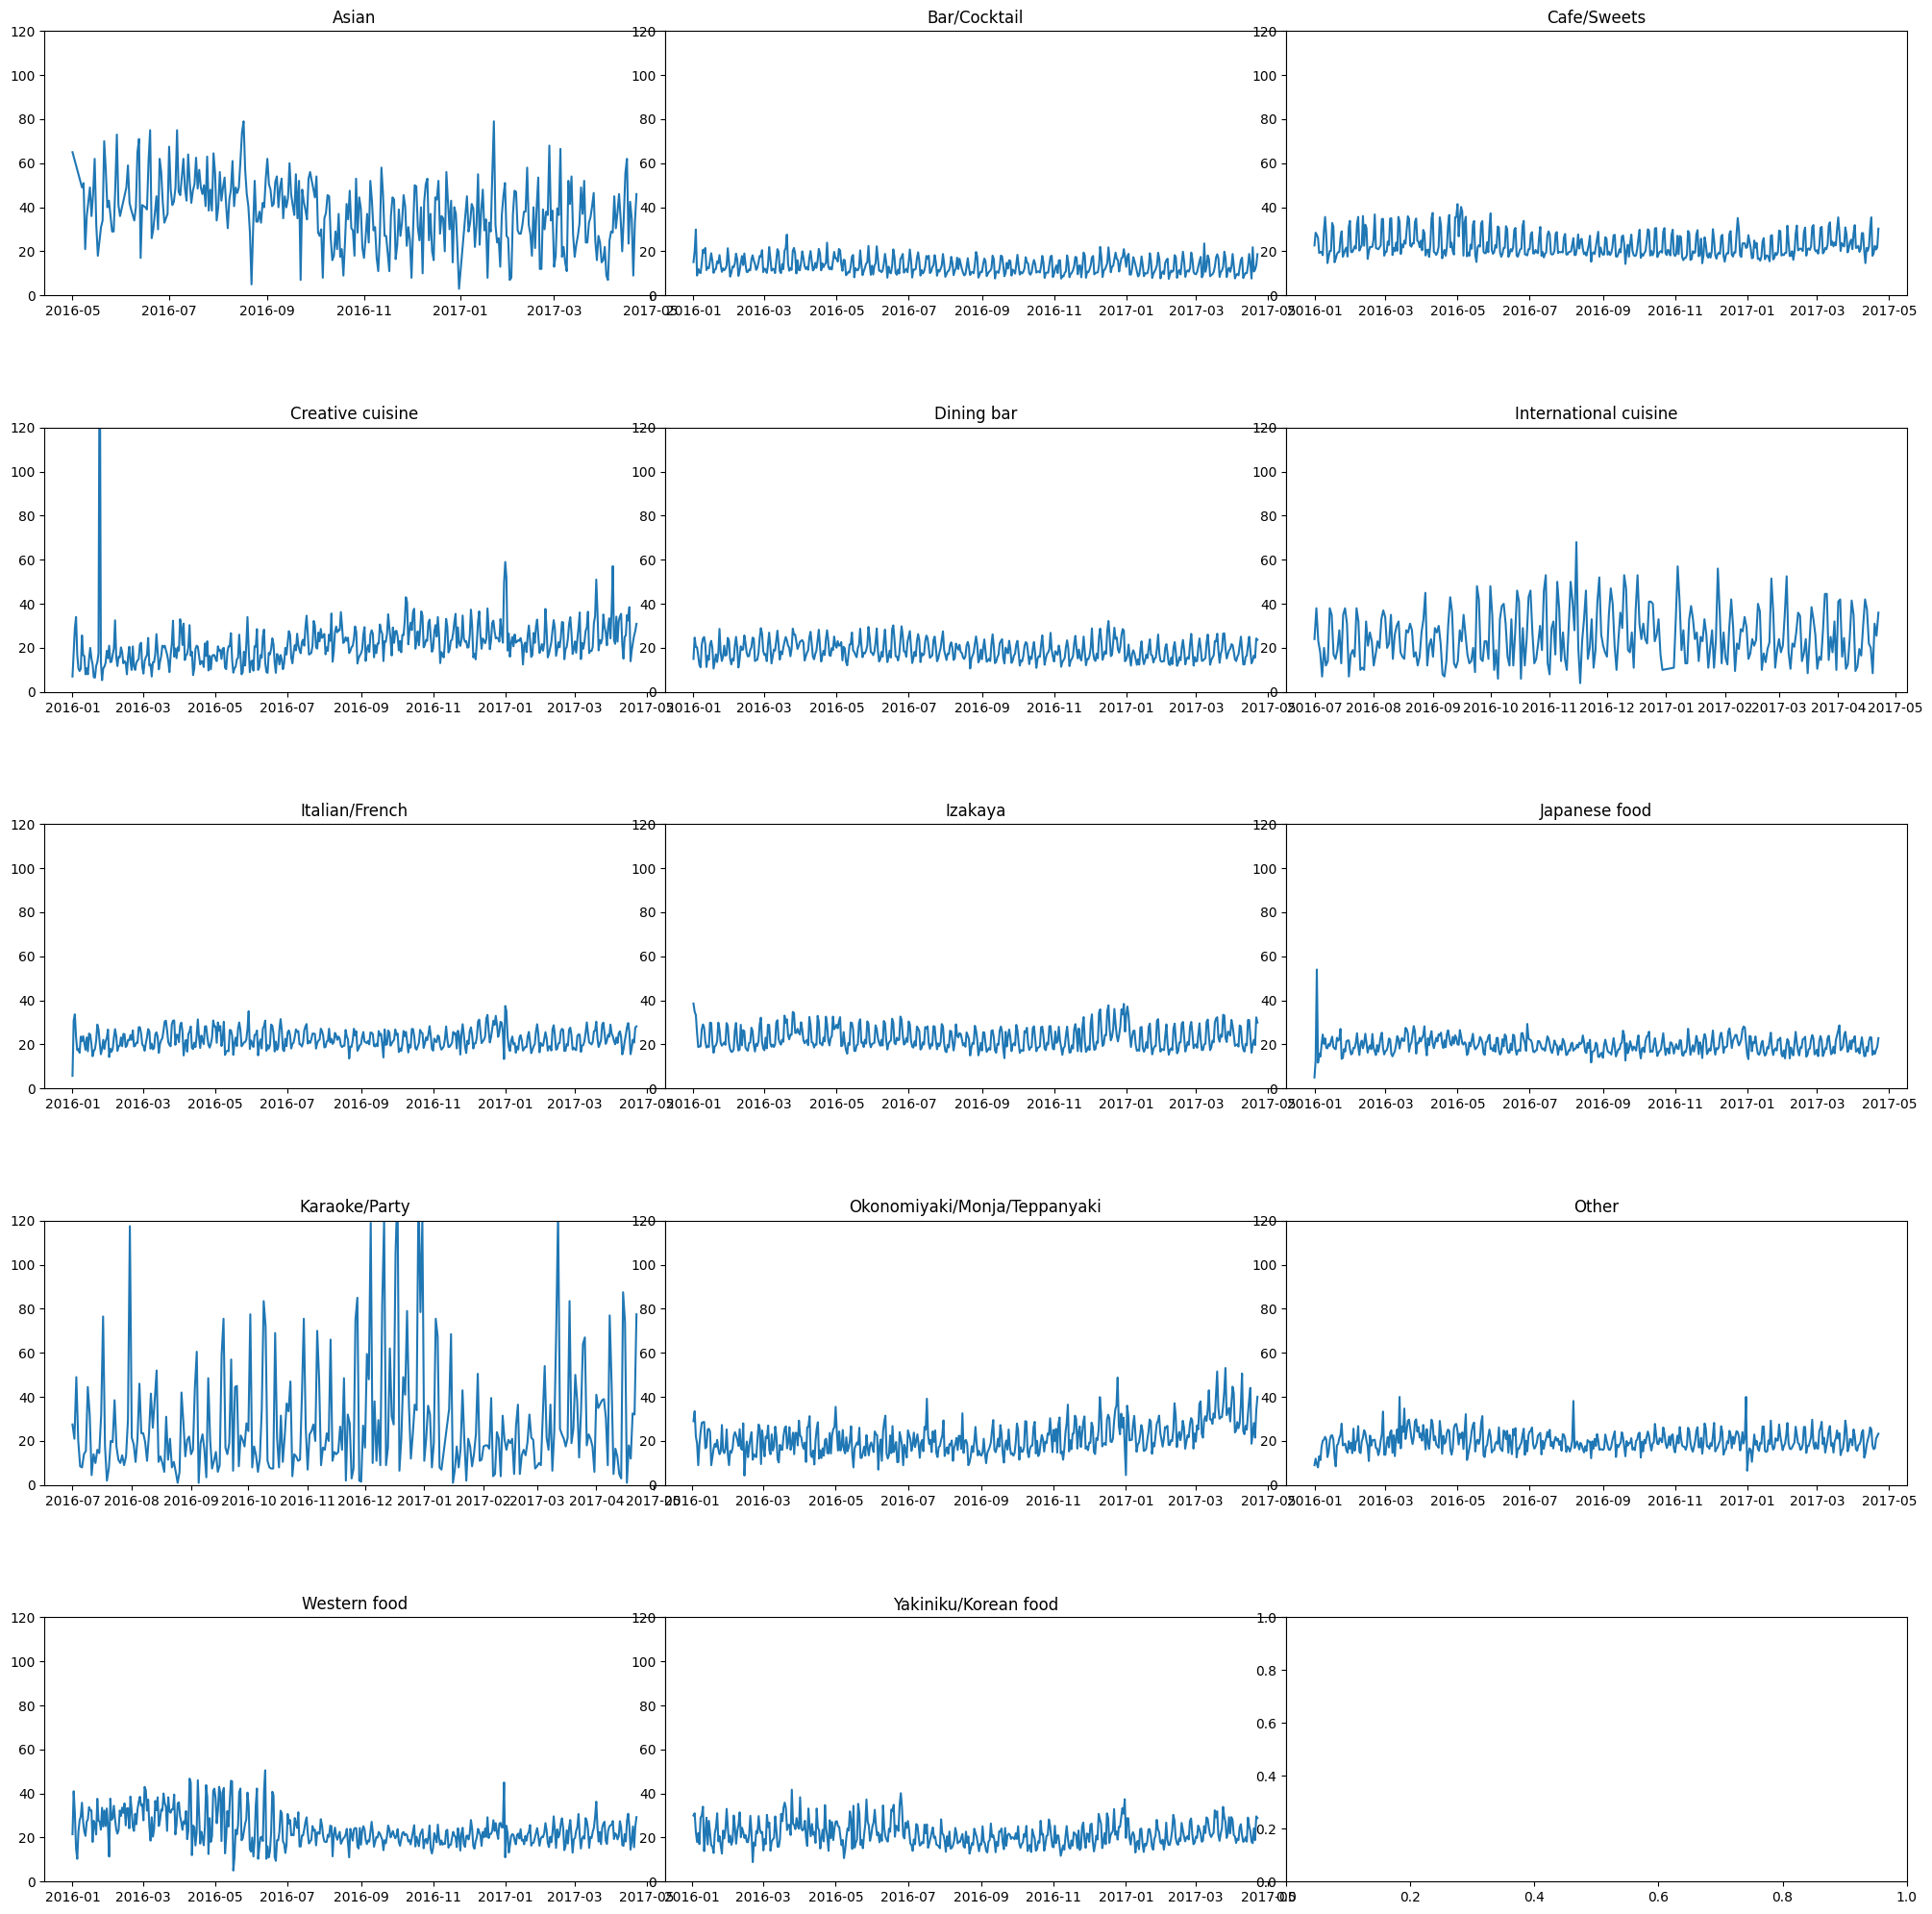

In [ ]:
# Draw time series plots for every Air Genre
fig, axs = plt.subplots(5,3, figsize=(25, 25))
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
for i in range(len(genre_df.air_genre_name.unique())):
    df = genre_df.loc[genre_df.air_genre_name == genre_df.air_genre_name.unique()[i],:]
    axs[i].plot(df.visit_date, df.visitors)
    axs[i].set_ylim([0, 120])
    axs[i].set_title(genre_df.air_genre_name.unique()[i])

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The mean values range between 0 and 80 visitors per genre per day
- The trend seems resonably stable for every genre. However there's an upward trend for “Creative Cuisine” and “Okonomiyaki” genre
- The trend of “Karaoke” and “Asian” are understandably more noisy as compared to other genres

Let's look at another very import plot to analyze the distribution of every class in dataframe

### Joy Plot

<Figure size 1280x800 with 0 Axes>

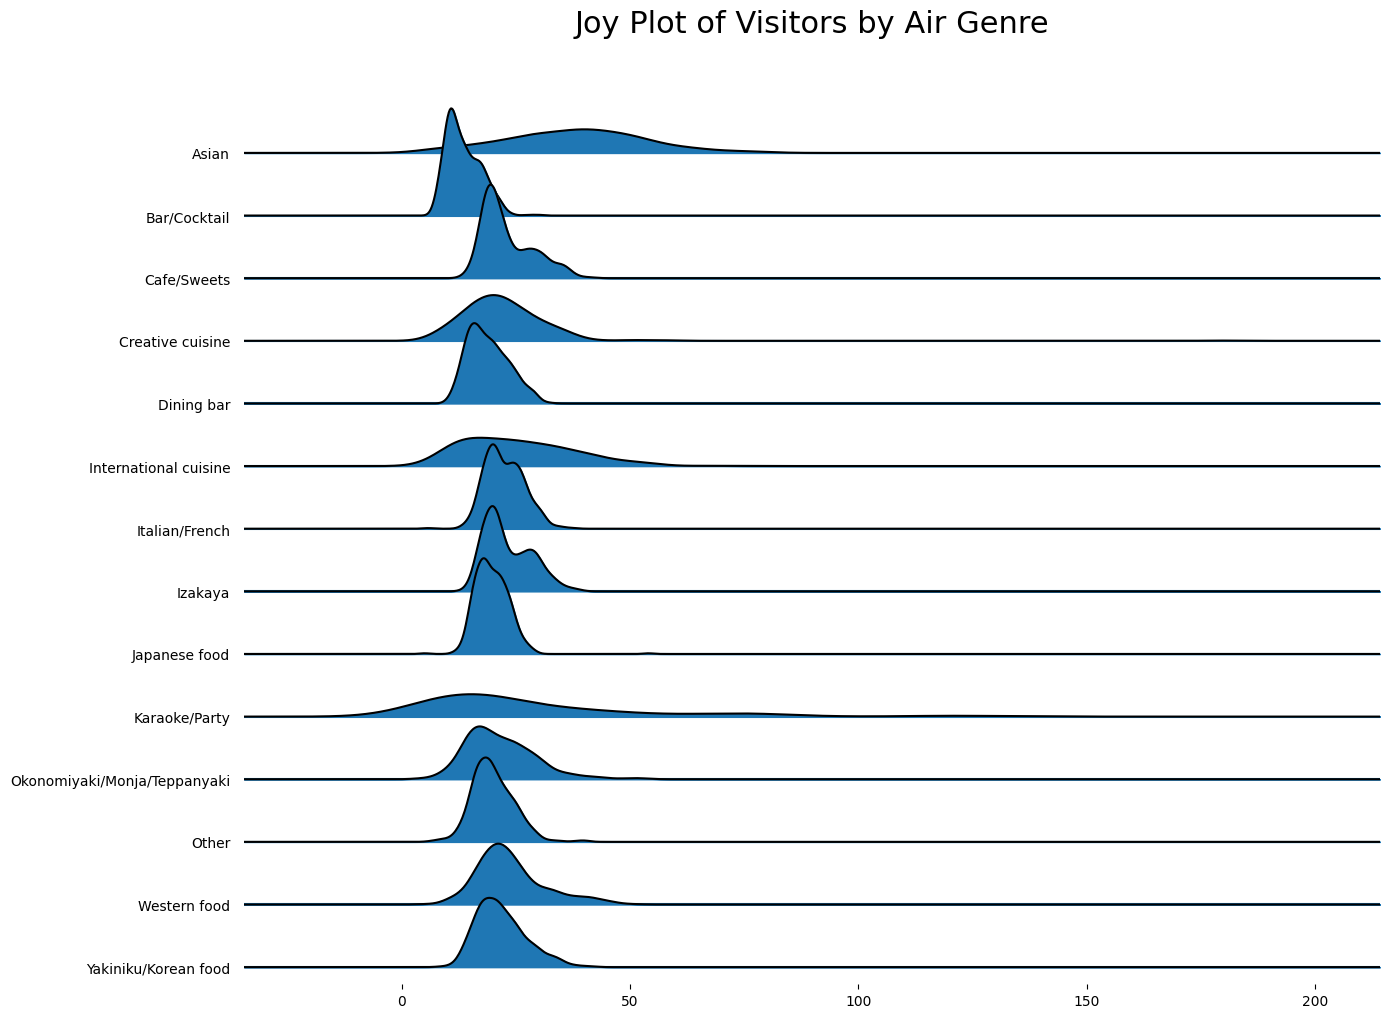

In [ ]:
import joypy as joypy

# Draw Joy Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(genre_df, column='visitors', by="air_genre_name", figsize=(14,10))
plt.title('Joy Plot of Visitors by Air Genre', fontsize=22)
plt.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Asian, International and Karake genre are boardly distributed, impying more variance in daily values.

## 8. Statistical Significance Tests

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Statistical Significance Test</h2>
</div>

## **7. Spearmanr Correlation  - Continuous Variables**
Since the data is not normally distributed, you should not go for Pearsonr Correlation. Rather go for Spearmanr Correlation

In [ ]:
# Get the spearmanr correlation coeffecient and p value for holiday flag
scipy.stats.spearmanr(master_df.visitors, master_df.holiday_flg, nan_policy = 'omit')

SignificanceResult(statistic=-0.015943372044505747, pvalue=2.3644735837666492e-17)

In [ ]:
print(master_df.columns)
master_df.head()

Index(['dataset', 'id', 'air_store_id', 'visit_date', 'visitors',
       'day_of_week', 'holiday_flg', 'weekend', 'day_off_flg',
       'tomorrow_is_holiday', 'yesterday_is_holiday', 'jump_flag', 'weekday',
       'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year',
       'is_month_end', 'air_genre_name', 'air_area_name', 'latitude_air',
       'longitude_air', 'hpg_store_id', 'hpg_genre_name', 'hpg_area_name',
       'latitude_hpg', 'longitude_hpg', 'Todofuken', 'city', 'street',
       'n_stores_same_street', 'n_stores_same_city', 'n_stores_same_Todofuken',
       'reserve_vistors_count', 'reserve_visitors', 'visit_hour',
       'reserve_hour', 'hours_ahead', 'area_genre', 'store_weekday',
       'store_weekday_holiday', 'mean_visitors', 'median_visitors',
       'min_visitors', 'max_visitors'],
      dtype='object')


dataset                               id          air_store_id visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24 2016-01-13        25   Wednesday            0        0            0                    0                     0         1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24 2016-01-14        32    Thursday            0        0            0                    0                     0         1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24 2016-01-15        29      Friday            0        0            0                    1                     0         1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24 2016-01-16        22    Saturday            0        1            1                    0                     0         1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24 2016-01-18         6      Monday            0        0            0                    0                     1         1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato-ku Shibakōe

In [ ]:
# Get the list of numerical columns
numerical_columns = ['visitors', 'day_of_year', 'days_in_month', 'week_of_year', 'latitude_air',
       'longitude_air', 'latitude_hpg',	'longitude_hpg', 'n_stores_same_street', 'n_stores_same_city', 'n_stores_same_Todofuken',
       'reserve_vistors_count', 'reserve_visitors', 'visit_hour',
       'reserve_hour', 'hours_ahead',  'mean_visitors', 'median_visitors',
       'min_visitors', 'max_visitors']
numerical_columns

['visitors',
 'day_of_year',
 'days_in_month',
 'week_of_year',
 'latitude_air',
 'longitude_air',
 'latitude_hpg',
 'longitude_hpg',
 'n_stores_same_street',
 'n_stores_same_city',
 'n_stores_same_Todofuken',
 'reserve_vistors_count',
 'reserve_visitors',
 'visit_hour',
 'reserve_hour',
 'hours_ahead',
 'mean_visitors',
 'median_visitors',
 'min_visitors',
 'max_visitors']

In [ ]:
# Create a dictionary with correlation and p values for every feature
correlation = {'feature' : [], 'correlation' : [], 'p-value' : []}
for col in numerical_columns[1:]:
    correlation['feature'].append(col)
    correlation['correlation'].append(scipy.stats.spearmanr(master_df.visitors, master_df[col], nan_policy = 'omit')[0])
    correlation['p-value'].append(scipy.stats.spearmanr(master_df.visitors, master_df[col], nan_policy = 'omit')[1])

In [ ]:
# Convert the dictionary to dataframe
correlation_df = pd.DataFrame(correlation)
correlation_df

feature  correlation        p-value
0               day_of_year     0.036389   2.160692e-83
1             days_in_month    -0.065064  1.360368e-262
2              week_of_year     0.033565   3.191163e-71
3              latitude_air    -0.002599   1.671172e-01
4             longitude_air     0.003977   3.454719e-02
5              latitude_hpg    -0.020993   1.616387e-03
6             longitude_hpg     0.033832   3.730854e-07
7      n_stores_same_street    -0.009964   1.184557e-07
8        n_stores_same_city    -0.007223   1.235123e-04
9   n_stores_same_Todofuken    -0.033018   5.581874e-69
10    reserve_vistors_count     0.330446   0.000000e+00
11         reserve_visitors     0.448830   0.000000e+00
12               visit_hour    -0.075719   3.835381e-48
13             reserve_hour    -0.053137   1.556198e-24
14              hours_ahead     0.104882   6.462588e-91
15            mean_visitors     0.639902   0.000000e+00
16          median_visitors     0.638670   0.000000e+00
17             min_visitors     0.483999   0.000000e+00
18             max_visitors     0.531775   0.000000e+00

In [ ]:
# Significant numeric variables
significant_variables = correlation_df.loc[correlation_df["p-value"] <= 0.05,"feature"]
significant_variables

0                 day_of_year
1               days_in_month
2                week_of_year
4               longitude_air
5                latitude_hpg
6               longitude_hpg
7        n_stores_same_street
8          n_stores_same_city
9     n_stores_same_Todofuken
10      reserve_vistors_count
11           reserve_visitors
12                 visit_hour
13               reserve_hour
14                hours_ahead
15              mean_visitors
16            median_visitors
17               min_visitors
18               max_visitors
Name: feature, dtype: object

In [ ]:
# # Let's create the correlations matrix between all the variables
# plt.figure(figsize=(30,30))
# p=sns.heatmap(master_df.corr(), annot=True,cmap='RdYlGn',center=0)

## **8. ANOVA**

In [ ]:
categorical_columns = [i for i in master_df.columns if i not in numerical_columns]
categorical_columns

['dataset',
 'id',
 'air_store_id',
 'visit_date',
 'day_of_week',
 'holiday_flg',
 'weekend',
 'day_off_flg',
 'tomorrow_is_holiday',
 'yesterday_is_holiday',
 'jump_flag',
 'weekday',
 'year',
 'month',
 'is_month_end',
 'air_genre_name',
 'air_area_name',
 'hpg_store_id',
 'hpg_genre_name',
 'hpg_area_name',
 'Todofuken',
 'city',
 'street',
 'area_genre',
 'store_weekday',
 'store_weekday_holiday']

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### ANOVA test using ols model

In [ ]:
# Build OLS model on 'air_store_id' column

col = 'air_store_id'
model = ols(('visitors ~ ' + col),                 # Model formula
            data = master_df).fit()

# Get ANOVA summary
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                    sum_sq        df          F  PR(>F)
air_store_id  2.542327e+07     820.0  152.57988     0.0
Residual      5.723407e+07  281666.0        NaN     NaN


In [ ]:
# p-value
anova_result["PR(>F)"][0]

0.0

In [ ]:
 # Get significant categorical variables based on ANOVA
 #for col in categorical_columns[3:]:   # first 3 features are just flags and id
  #   model = ols(('visitors ~ ' + col), data = master_df).fit()

# Get ANOVA summary
#anova_result = sm.stats.anova_lm(model, typ=2)

#if anova_result["PR(>F)"][0] <= 0.05:
 #  print(col)

## **9. Feature Encoding**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>9. Feature Encoding</h2>
</div>

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.
- **Label encoding** - Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

It is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [ ]:
categorical_columns = [i for i in master_df.columns if i not in numerical_columns]
categorical_columns

['dataset',
 'id',
 'air_store_id',
 'visit_date',
 'day_of_week',
 'holiday_flg',
 'weekend',
 'day_off_flg',
 'tomorrow_is_holiday',
 'yesterday_is_holiday',
 'jump_flag',
 'weekday',
 'year',
 'month',
 'is_month_end',
 'air_genre_name',
 'air_area_name',
 'hpg_store_id',
 'hpg_genre_name',
 'hpg_area_name',
 'Todofuken',
 'city',
 'street',
 'area_genre',
 'store_weekday',
 'store_weekday_holiday']

In [ ]:
categorical_columns.remove("dataset")
categorical_columns.remove("id")
categorical_columns.remove("visit_date")
# categorical_columns.remove("air_store_id")

In [ ]:
master_df.head()

dataset                               id          air_store_id visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24 2016-01-13        25   Wednesday            0        0            0                    0                     0         1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24 2016-01-14        32    Thursday            0        0            0                    0                     0         1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24 2016-01-15        29      Friday            0        0            0                    1                     0         1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24 2016-01-16        22    Saturday            0        1            1                    0                     0         1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24 2016-01-18         6      Monday            0        0            0                    0                     1         1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato-ku Shibakōe

In [ ]:
# Label encode the variables
for col in categorical_columns:
    lbl = LabelEncoder()
    lbl.fit(list(master_df[col].values))
    master_df[col] = lbl.transform(list(master_df[col].values))

In [ ]:
master_df.head()

dataset                               id  air_store_id visit_date  visitors  day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end  air_genre_name  air_area_name  latitude_air  longitude_air  hpg_store_id  hpg_genre_name  hpg_area_name  latitude_hpg  longitude_hpg  Todofuken  city  street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead  area_genre  store_weekday  store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13           599 2016-01-13        25            6            0        0            0                    0                     0          1        2     0      0           13             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4195                   7817      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14           599 2016-01-14        32            4            0        0            0                    0                     0          1        3     0      0           14             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4196                   7819      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15           599 2016-01-15        29            0            0        0            0                    1                     0          1        4     0      0           15             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4197                   7821      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16           599 2016-01-16        22            2            0        1            1                    0                     0          1        5     0      0           16             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4198                   7823      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18           599 2016-01-18         6            1            0        0            0                    0                     1          1        0     0      0           18             31             3             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4193                   7815      13.754386    

## **10. Data Preprocessing for Model Building**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>10. Data Preprocessing for model building</h2>
</div>



The goal of this section is to:
- Drop the column which may not be useful
- Split the dataset in training and test sets


**Tip : Save the train df, and clean all memory**

In [ ]:
# Save master df to csv file
#master_df.to_csv("training_df.csv",index = False)

# Read master df
master_df = pd.read_csv("/content/drive/MyDrive/training_df.csv")

In [ ]:
# Split the past data and future data
train,future = master_df[master_df['dataset'] == 'past'],master_df[master_df['dataset'] == 'future']

Split the historical data and future dataset

In [ ]:
train.head()

dataset                               id  air_store_id  visit_date  visitors  day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end  air_genre_name  air_area_name  latitude_air  longitude_air  hpg_store_id  hpg_genre_name  hpg_area_name  latitude_hpg  longitude_hpg  Todofuken  city  street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead  area_genre  store_weekday  store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13           599  2016-01-13        25            6            0        0            0                    0                     0          1        2     0      0           13             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4195                   7817      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14           599  2016-01-14        32            4            0        0            0                    0                     0          1        3     0      0           14             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4196                   7819      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15           599  2016-01-15        29            0            0        0            0                    1                     0          1        4     0      0           15             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4197                   7821      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16           599  2016-01-16        22            2            0        1            1                    0                     0          1        5     0      0           16             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4198                   7823      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18           599  2016-01-18         6            1            0        0            0                    0                     1          1        0     0      0           18             31             3             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4193                   7815      13.7543

In [ ]:
# Drop the dataset and id columns
train = train.drop(['dataset', 'id',],axis=1)

#### Split the dataset for training and testing

In [ ]:
# Print min and max visit date
print(train.visit_date.min())
print(train.visit_date.max())

2016-01-01
2017-04-22


In [ ]:
train.head()

air_store_id  visit_date  visitors  day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end  air_genre_name  air_area_name  latitude_air  longitude_air  hpg_store_id  hpg_genre_name  hpg_area_name  latitude_hpg  longitude_hpg  Todofuken  city  street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead  area_genre  store_weekday  store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0           599  2016-01-13        25            6            0        0            0                    0                     0          1        2     0      0           13             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4195                   7817      24.095238             25.0           7.0          57.0
1           599  2016-01-14        32            4            0        0            0                    0                     0          1        3     0      0           14             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4196                   7819      20.450000             21.0           7.0          45.0
2           599  2016-01-15        29            0            0        0            0                    1                     0          1        4     0      0           15             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4197                   7821      35.218750             35.5          17.0          61.0
3           599  2016-01-16        22            2            0        1            1                    0                     0          1        5     0      0           16             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4198                   7823      27.828125             27.0           6.0          53.0
4           599  2016-01-18         6            1            0        0            0                    0                     1          1        0     0      0           18             31             3             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4193                   7815      13.754386             12.0           2.0          34.0

In [ ]:
# Get the train dataset, we will use the data till end of Jan 2017
train_selector = train.visit_date < '2017-02-01'
X_train = train[train_selector]
y_train = train[train_selector]['visitors'].apply(np.log1p)    # apply np.log1p() (log(1+x)) to visitors count, to correct for high skewness
# y_train = train[train_selector]['visitors']    # apply np.log1p() (log(1+x)) to visitors count, to correct for high skewness

print('Training dataset dimensions')
print('- X_train:', X_train.shape)
print('- y_train:', y_train.shape)

Training dataset dimensions
- X_train: (192785, 44)
- y_train: (192785,)


In [ ]:
X_train.head()

air_store_id  visit_date  visitors  day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end  air_genre_name  air_area_name  latitude_air  longitude_air  hpg_store_id  hpg_genre_name  hpg_area_name  latitude_hpg  longitude_hpg  Todofuken  city  street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead  area_genre  store_weekday  store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0           599  2016-01-13        25            6            0        0            0                    0                     0          1        2     0      0           13             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4195                   7817      24.095238             25.0           7.0          57.0
1           599  2016-01-14        32            4            0        0            0                    0                     0          1        3     0      0           14             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4196                   7819      20.450000             21.0           7.0          45.0
2           599  2016-01-15        29            0            0        0            0                    1                     0          1        4     0      0           15             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4197                   7821      35.218750             35.5          17.0          61.0
3           599  2016-01-16        22            2            0        1            1                    0                     0          1        5     0      0           16             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4198                   7823      27.828125             27.0           6.0          53.0
4           599  2016-01-18         6            1            0        0            0                    0                     1          1        0     0      0           18             31             3             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4193                   7815      13.754386             12.0           2.0          34.0

In [ ]:
# Convert it back to original scale and check
y_original = y_train.apply(np.exp) - 1
print(y_original.head())
print(train[train_selector]['visitors'].head())


0    25.0
1    32.0
2    29.0
3    22.0
4     6.0
Name: visitors, dtype: float64
0    25
1    32
2    29
3    22
4     6
Name: visitors, dtype: int64


In [ ]:
X_train.head()

air_store_id  visit_date  visitors  day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end  air_genre_name  air_area_name  latitude_air  longitude_air  hpg_store_id  hpg_genre_name  hpg_area_name  latitude_hpg  longitude_hpg  Todofuken  city  street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead  area_genre  store_weekday  store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0           599  2016-01-13        25            6            0        0            0                    0                     0          1        2     0      0           13             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4195                   7817      24.095238             25.0           7.0          57.0
1           599  2016-01-14        32            4            0        0            0                    0                     0          1        3     0      0           14             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4196                   7819      20.450000             21.0           7.0          45.0
2           599  2016-01-15        29            0            0        0            0                    1                     0          1        4     0      0           15             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4197                   7821      35.218750             35.5          17.0          61.0
3           599  2016-01-16        22            2            0        1            1                    0                     0          1        5     0      0           16             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4198                   7823      27.828125             27.0           6.0          53.0
4           599  2016-01-18         6            1            0        0            0                    0                     1          1        0     0      0           18             31             3             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4193                   7815      13.754386             12.0           2.0          34.0

In [ ]:
y_train.head()

0    3.258097
1    3.496508
2    3.401197
3    3.135494
4    1.945910
Name: visitors, dtype: float64

In [ ]:
# Get the test dataset, we will use the data from start of Feb 2017
test_selector = train.visit_date >= '2017-02-01'
X_test = train[test_selector]
y_test = train[test_selector]['visitors'].apply(np.log1p)
# y_test = train[test_selector]['visitors']
print('Testing dataset dimensions')
print('- X_test:', X_test.shape)
print('- y_test:', y_test.shape)

Testing dataset dimensions
- X_test: (57683, 44)
- y_test: (57683,)


In [ ]:
# Proportion of training and test dataset
X_train.shape[0]/X_test.shape[0]

3.342145866199747

Train dataset is 3.35 times of test dataset, so it's a good mix

In [ ]:
# Drop the visitors and visit date column from train and test X dataset
# X_train = X_train.drop(["visit_date","visitors"],axis=1)
# X_test = X_test.drop(["visit_date","visitors"],axis=1)

X_train = X_train.drop(["visitors"],axis=1)
X_test = X_test.drop(["visitors"],axis=1)

In [ ]:
# Head of X_train
X_train.head()

air_store_id  visit_date  day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end  air_genre_name  air_area_name  latitude_air  longitude_air  hpg_store_id  hpg_genre_name  hpg_area_name  latitude_hpg  longitude_hpg  Todofuken  city  street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead  area_genre  store_weekday  store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0           599  2016-01-13            6            0        0            0                    0                     0          1        2     0      0           13             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4195                   7817      24.095238             25.0           7.0          57.0
1           599  2016-01-14            4            0        0            0                    0                     0          1        3     0      0           14             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4196                   7819      20.450000             21.0           7.0          45.0
2           599  2016-01-15            0            0        0            0                    1                     0          1        4     0      0           15             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4197                   7821      35.218750             35.5          17.0          61.0
3           599  2016-01-16            2            0        1            1                    0                     0          1        5     0      0           16             31             2             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4198                   7823      27.828125             27.0           6.0          53.0
4           599  2016-01-18            1            0        0            0                    0                     1          1        0     0      0           18             31             3             0               4             62     35.658068     139.751599           150              16             31           NaN            NaN          7    29      77                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN         143           4193                   7815      13.754386             12.0           2.0          34.0

## **11. Evaluation Metrics for Regression**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Model Building Starts Here</h3>
</div>

.
.
.
.



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>11. Evaluation Metrices - Regression</h2>
</div>

- Mean Absolute Error (MAE)

- Mean Absolute Percentage Error (MAPE)

- Root Mean Squared Log Error (RMSLE)  -- Final Evaluation Metric for this problem

The Root Mean Squared Log Error (RMSLE) can be defined using a slight modification on sklearn's mean_squared_log_error function, which itself a modification on the familiar Mean Squared Error (MSE) metric.

The formula for RMSLE is represented as follows:

RMSLE formula![image.png](attachment:image.png)

Where:

𝑛  is the total number of observations in the (public/private) data set,

𝑝𝑖  is your prediction of target, and

𝑎𝑖  is the actual target for  𝑖 .

𝑙𝑜𝑔(𝑥)  is the natural logarithm of  𝑥  ( 𝑙𝑜𝑔𝑒(𝑥) .

In [ ]:
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# import
df_univariate = pd.read_csv("df_univariate.csv")
df_univariate.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0        0            0                    0                     0          1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0        0            0                    0                     0          1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24  2016-01-15        29      Friday            0        0            0                    1                     0          1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0        1            1                    0                     0          1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24  2016-01-18         6      Monday            0        0            0                    0                     1          1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato

## **Time Series Forecasting - ARIMA**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Time Series Forecasting</h2>
</div>

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.
In our case the time series can be weekly or monthly or yearly. By looking at the data, weekly time series makes more sense



##  ARIMA Forecasting for Each Restaurant

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

In [ ]:
print("Earliest Date :", df_univariate.visit_date.min())
print("Latest Date   :", df_univariate.visit_date.max())

Earliest Date : 2016-01-01
Latest Date   : 2017-05-31


We will exclude submission data and take past data alone and split it into training and test datasets.

In [ ]:
# Filter the historical data
df_tsf = df_univariate.loc[df_univariate.dataset == "past",]
df_tsf.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0        0            0                    0                     0          1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0        0            0                    0                     0          1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24  2016-01-15        29      Friday            0        0            0                    1                     0          1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0        1            1                    0                     0          1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24  2016-01-18         6      Monday            0        0            0                    0                     1          1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>12a. ARIMA Forecasting using Statsmodels</h2>
</div>

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

**Get unique restaurant IDs**

In [ ]:
df_tsf.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0        0            0                    0                     0          1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0        0            0                    0                     0          1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24  2016-01-15        29      Friday            0        0            0                    1                     0          1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0        1            1                    0                     0          1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24  2016-01-18         6      Monday            0        0            0                    0                     1          1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato

In [ ]:
air_store_id = df_tsf.air_store_id.unique()

**Create Train and Test Data**

In [ ]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[10], :]

# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
train = df_tsf_restaurant[train_selector]

test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
test = df_tsf_restaurant[test_selector]

**View**

In [ ]:
df_tsf_restaurant.reset_index(drop=True, inplace=True)
df_tsf_restaurant.head()


dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                            area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_d69b08a175bc0387_2016-07-01  air_d69b08a175bc0387  2016-07-01        10      Friday            0        0            0                    1                     1          1        4  2016      7          183             31            26         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_4  air_d69b08a175bc0387_4_0      12.948718             14.0           2.0          26.0
1    past  air_d69b08a175bc0387_2016-07-02  air_d69b08a175bc0387  2016-07-02         1    Saturday            0        1            1                    0                     0          1        5  2016      7          184             31            26         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_5  air_d69b08a175bc0387_5_0       8.218750              8.5           1.0          23.0
2    past  air_d69b08a175bc0387_2016-07-04  air_d69b08a175bc0387  2016-07-04         8      Monday            0        0            0                    0                     1          1        0  2016      7          186             31            27         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_0  air_d69b08a175bc0387_0_0       8.178571              8.0           1.0          19.0
3    past  air_d69b08a175bc0387_2016-07-05  air_d69b08a175bc0387  2016-07-05         4     Tuesday            0        0            0                    0                     0          1        1  2016      7          187             31            27         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_1  air_d69b08a175bc0387_1_0       8.675676              8.0           1.0          20.0
4    past  air_d69b08a175bc0387_2016-07-07  air_d69b08a175bc0387  2016-07-07         9    Thursday            0        0            0                    0                     0          1        3  2016      7          189             31            27         False        Izakaya  Tōkyō-to Minato-ku Shibakōen  

**Create Time Series**

In [ ]:
ts = train.loc[:, ['visit_date', 'visitors']]
ts['visit_date'] = pd.to_datetime(ts['visit_date'])
ts.set_index('visit_date', inplace=True)
ts.head()

visitors
visit_date          
2016-07-01        10
2016-07-02         1
2016-07-04         8
2016-07-05         4
2016-07-07         9

**Plot**

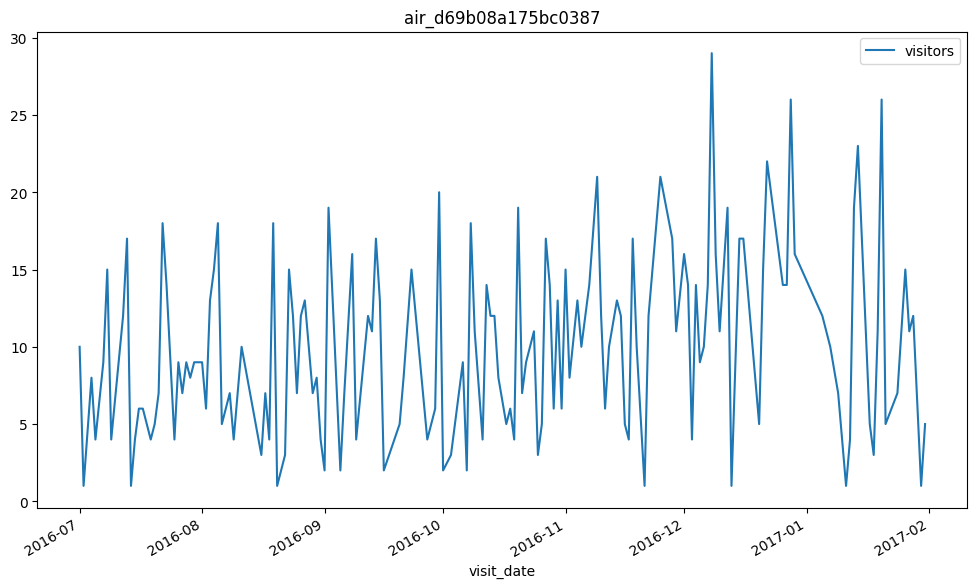

In [ ]:
# Plot
ts.plot(figsize=(12, 7), title=df_tsf_restaurant.air_store_id.values[0]);

**ADF Test for Stationarity**

The Augmented Dickey Fuller Test tests for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'Inference: The time series is {"non-" if result[1] >= 0.05 else ""}stationary')

ADF Statistic: -9.479721
p-value: 0.000000
Inference: The time series is stationary


**Check First order differenced series**

In [ ]:
# First Order Differenced
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'Inference: The time series is {"non-" if result[1] >= 0.05 else ""}stationary')

ADF Statistic: -6.521633
p-value: 0.000000
Inference: The time series is stationary


### Determining P and Q

**ACF and PACF Plots**

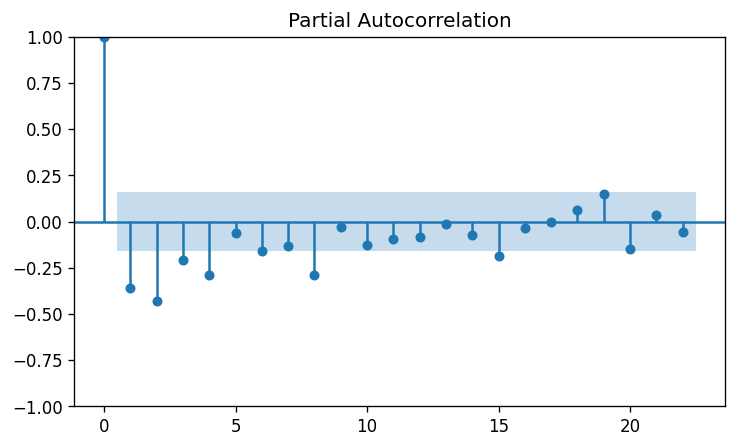

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(7, 4), 'figure.dpi':120})
plot_pacf(ts.diff().dropna());

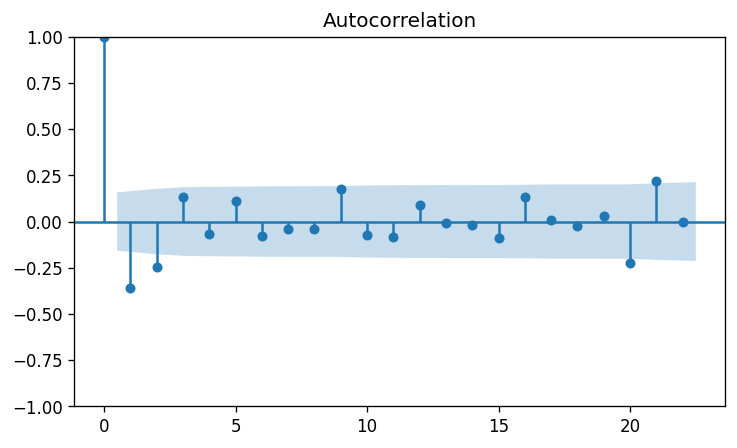

In [ ]:
# ACF plot of 1st differenced series
plot_acf(ts.diff().dropna());

Train the ARIMA model


In [ ]:
# Orders to try
order = (5, 1, 2)
order = (4, 1, 2)


# Train model
model = ARIMA(endog=ts, order=order)
fit = model.fit()

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               visitors   No. Observations:                  155
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -483.357
Date:                Sat, 19 Oct 2024   AIC                            980.714
Time:                        06:24:36   BIC                           1001.972
Sample:                             0   HQIC                           989.349
                                - 155                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7697      0.147     -5.244      0.000      -1.057      -0.482
ar.L2         -0.1951      0.111     -1.755      0.079      -0.413       0.023
ar.L3         -0.1673      0.107     -1.570      0.117      -0.376       0.042
ar.L4         -0.0893      0.099     -0.903      0.367      -0.283       0.104
ma.L1         -0.0696      0.121     -0.573      0.567      -0.308       0.168
ma.L2         -0.8216      0.128     -6.398      0.000      -1.073      -0.570
sigma2        30.5967      3.564      8.584      0.000      23.611      37.583
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.87   Prob(JB):                         0.38
Heteroskedasticity (H):               1.68   Skew:                             0.28
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Get prediction for test duration
predictions = pd.Series(fit.forecast(len(test)))
predictions = predictions.map(lambda x: x if x >= 0 else 0)
print(predictions.head())
actuals = test['visitors']

155    12.515826
156    12.423137
157    11.340517
158    10.577127
159    10.720506
Name: predicted_mean, dtype: float64


In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  4.683399342117149

 RMSLE : 
 0.6394508896314895

 MAPE : 
 42.77580585595143


**Plot Actual vs Predicted**

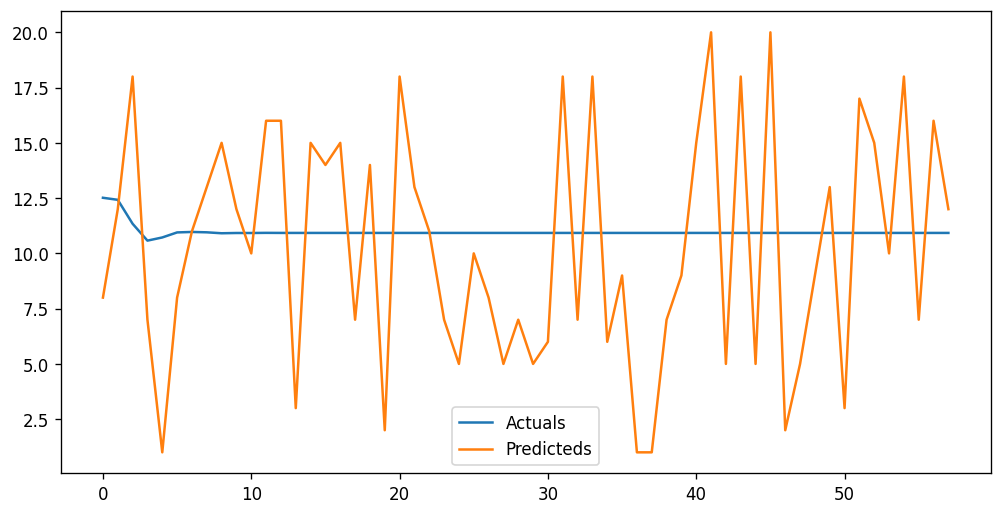

In [ ]:
# plot predictions and actual values
plt.figure(figsize=(10,5))
plt.plot(predictions.values, label='Actuals');
plt.plot(actuals.values, label='Predicteds');
plt.legend(loc='best');

### **Durbin Watson Statistic & Check for Pattern in Errors**


Line Plot

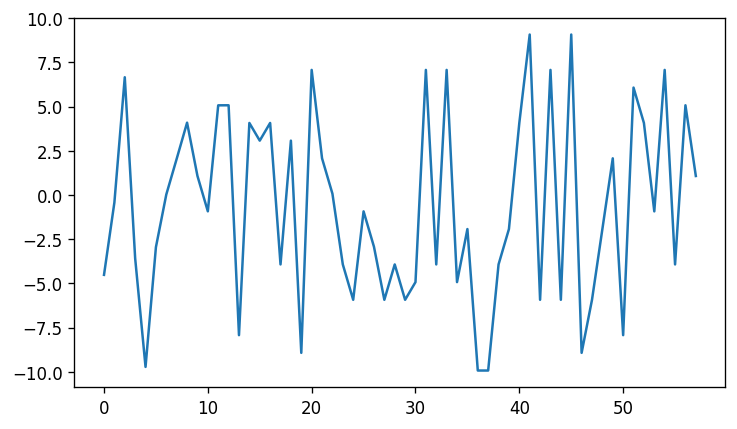

In [ ]:
errors = (actuals.values-predictions.values)
plt.plot(errors);

**Check Auto Correlation**

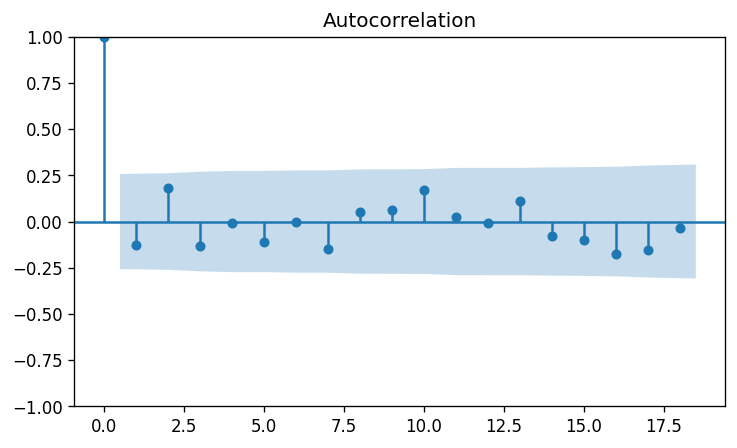

In [ ]:
plot_acf(errors);

**Durbin Watson Statistic**

DW statistic is used to check for serial correlation.

When there is no autocorrelation, the value of the statistic equals 2. When closer to 0 -> implies positive serial correlation. When closer to 4 -> implies negative serial correlation.

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals.

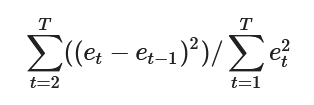

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(errors)

2.2040492152262283

## **12b. Auto ARIMA Modeled at Restaurant Level Time Series**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>12b. Auto ARIMA Modeled at Restaurant Level Time Series</h2>
</div>



In [ ]:
air_store_id = df_tsf.air_store_id.unique()
air_store_id[:10]

array(['air_ba937bf13d40fb24', 'air_25e9888d30b386df',
       'air_8e4360a64dbd4c50', 'air_35512c42db0868da',
       'air_a271c9ba19e81d17', 'air_fd6aac1043520e83',
       'air_64d4491ad8cdb1c6', 'air_f3f9824b7d70c3cf',
       'air_820d1919cbecaa0a', 'air_9ae7081cb77dc51e'], dtype=object)

In [ ]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[10], :]


# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
train = df_tsf_restaurant[train_selector]


test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
test = df_tsf_restaurant[test_selector]


In [ ]:
df_tsf_restaurant.reset_index(drop=True, inplace=True)
df_tsf_restaurant.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                            area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_d69b08a175bc0387_2016-07-01  air_d69b08a175bc0387  2016-07-01        10      Friday            0        0            0                    1                     1          1        4  2016      7          183             31            26         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_4  air_d69b08a175bc0387_4_0      12.948718             14.0           2.0          26.0
1    past  air_d69b08a175bc0387_2016-07-02  air_d69b08a175bc0387  2016-07-02         1    Saturday            0        1            1                    0                     0          1        5  2016      7          184             31            26         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_5  air_d69b08a175bc0387_5_0       8.218750              8.5           1.0          23.0
2    past  air_d69b08a175bc0387_2016-07-04  air_d69b08a175bc0387  2016-07-04         8      Monday            0        0            0                    0                     1          1        0  2016      7          186             31            27         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_0  air_d69b08a175bc0387_0_0       8.178571              8.0           1.0          19.0
3    past  air_d69b08a175bc0387_2016-07-05  air_d69b08a175bc0387  2016-07-05         4     Tuesday            0        0            0                    0                     0          1        1  2016      7          187             31            27         False        Izakaya  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Izakaya  air_d69b08a175bc0387_1  air_d69b08a175bc0387_1_0       8.675676              8.0           1.0          20.0
4    past  air_d69b08a175bc0387_2016-07-07  air_d69b08a175bc0387  2016-07-07         9    Thursday            0        0            0                    0                     0          1        3  2016      7          189             31            27         False        Izakaya  Tōkyō-to Minato-ku Shibakōen  

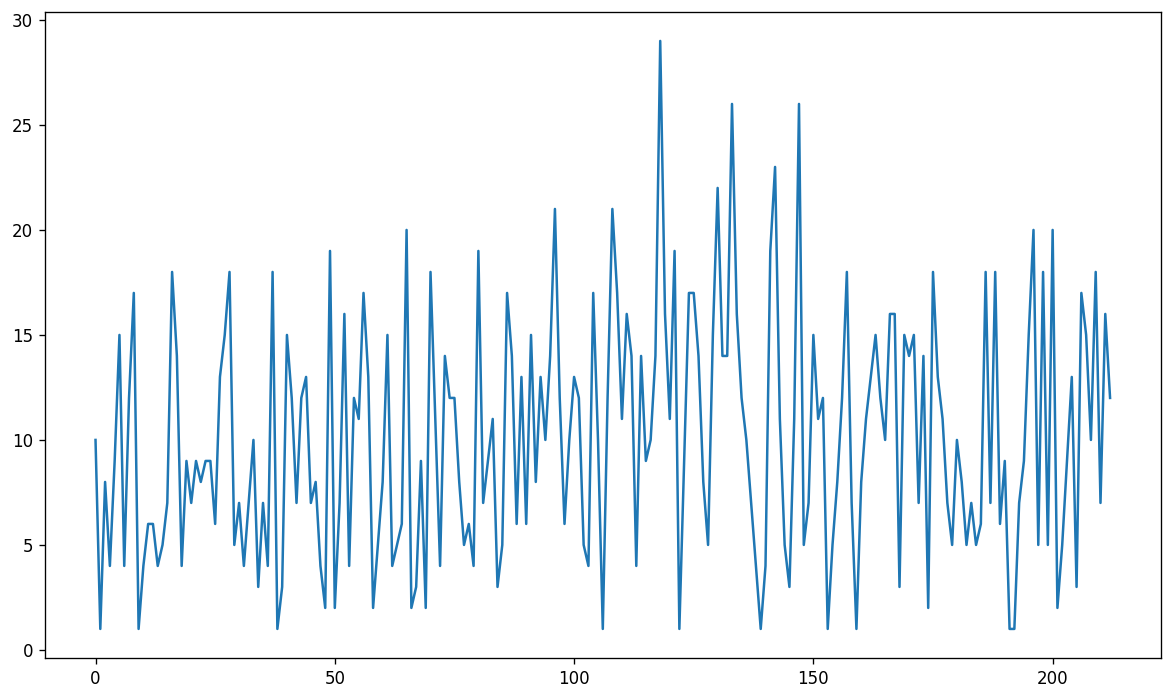

In [ ]:
# Plot
df_tsf_restaurant.visitors.plot(figsize=(12, 7));

In [ ]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1,
                          max_p = 7, max_q = 3, m = 30,
                          seasonal = False,
                          d = None, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1072.507, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1053.042, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1070.509, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1023.165, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1018.168, Time=1.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1005.798, Time=0.30 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1007.252, Time=0.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1003.799, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1016.168, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1005.253, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  155
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -484.882
Date:                Sat, 19 Oct 2024   AIC                            977.765
Time:                        06:24:46   BIC                            989.913
Sample:                             0   HQIC                           982.699
                                - 155                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8610      0.075    -11.499      0.000      -1.008      -0.714
ma.L2         -0.4009      0.111     -3.622      0.000      -0.618      -0.184
ma.L3          0.3132      0.081      3.887      0.000       0.155       0.471
sigma2        31.2286      3.643      8.571      0.000      24.088      38.370
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.83   Prob(JB):                         0.63
Heteroskedasticity (H):               1.67   Skew:                             0.18
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predict

In [ ]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
predictions = predictions.map(lambda x: x if x >= 0 else 0)

actuals = test['visitors'].reset_index(drop = True)

#### Evaluate

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  4.7182565818377515

 RMSLE : 
 0.6402207522837626

 MAPE : 
 43.27042759628216


#### Plot

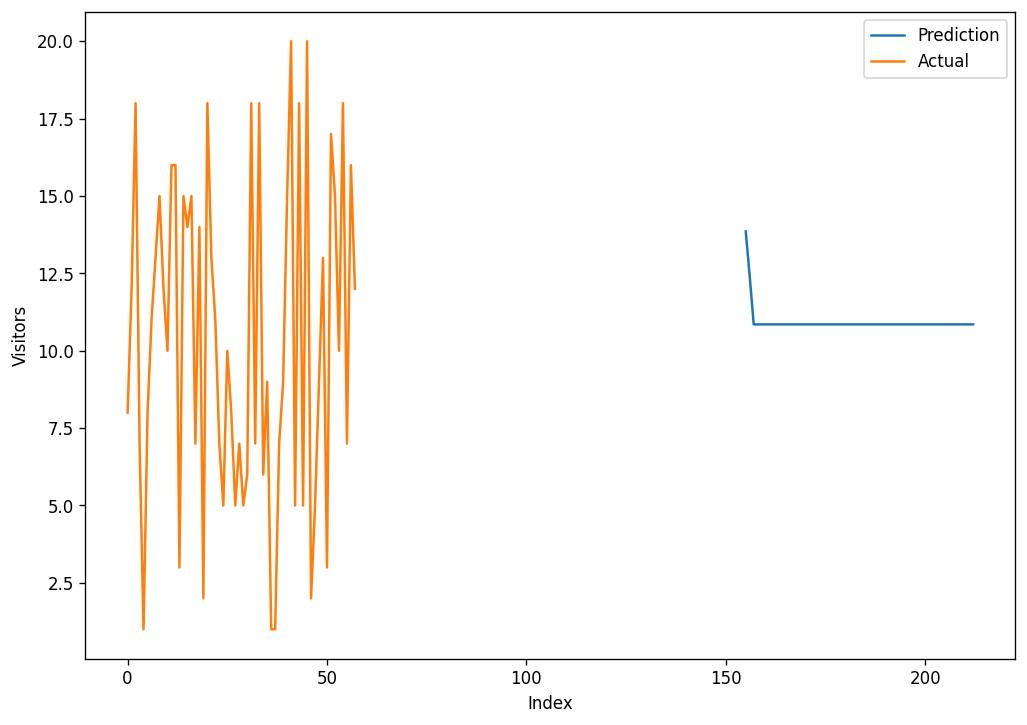

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7))
actuals.plot(legend = True, label = "Actual");

### Forecast and Evaluate for Multiple Restaurants

air_ba937bf13d40fb24
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2436.478, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2641.184, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2577.406, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2434.557, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2639.186, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2436.440, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2437.774, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2432.675, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2434.596, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2434.558, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2575.416, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2435.891, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.555 seconds

 MAPE : 
 49.13452765546477

 MAE : 
  9.173835778172055

 RMSLE :

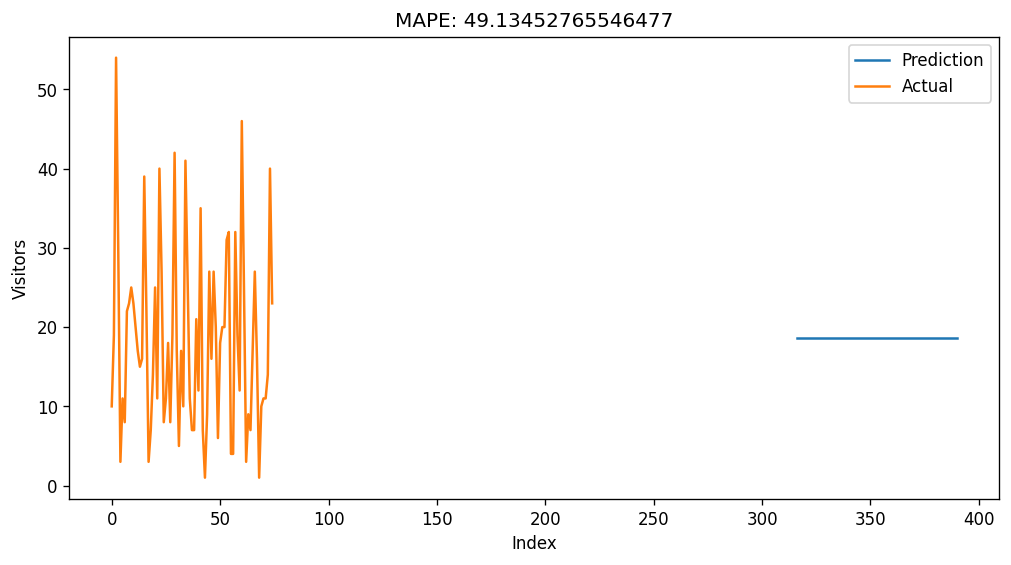

air_25e9888d30b386df
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1809.353, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1987.847, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1909.079, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1807.510, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1985.851, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1809.349, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1809.175, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1809.842, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.088 seconds

 MAPE : 
 inf

 MAE : 
  2.9683431399434554

 RMSLE : 
 1.0461757913592034


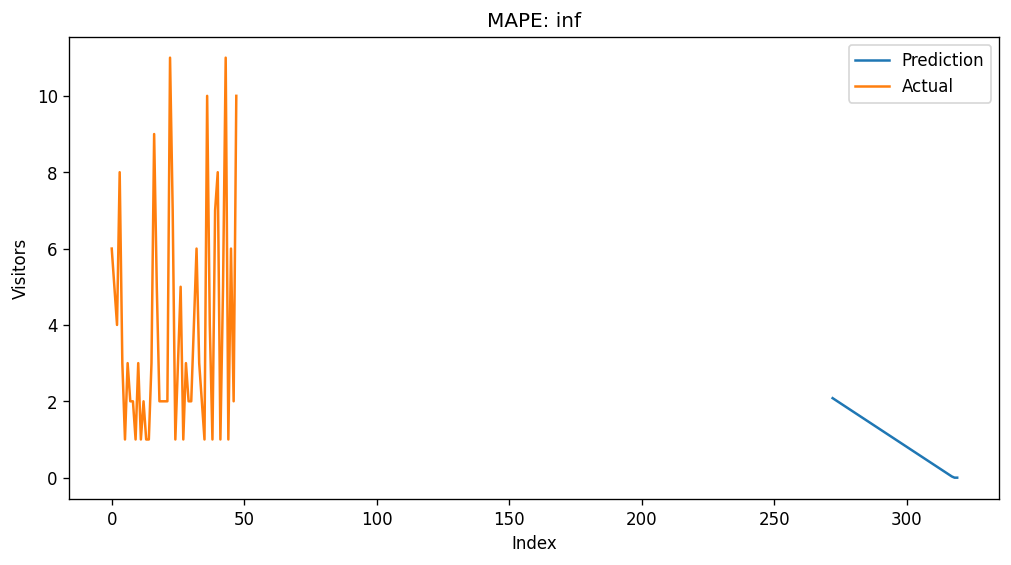

air_8e4360a64dbd4c50
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1702.245, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1688.693, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1700.263, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1665.078, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1655.116, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1645.968, Time=0.23 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1606.071, Time=0.29 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=1581.396, Time=0.50 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=1574.972, Time=1.65 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.16 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=1574.068, Time=0.59 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1573.902, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] int

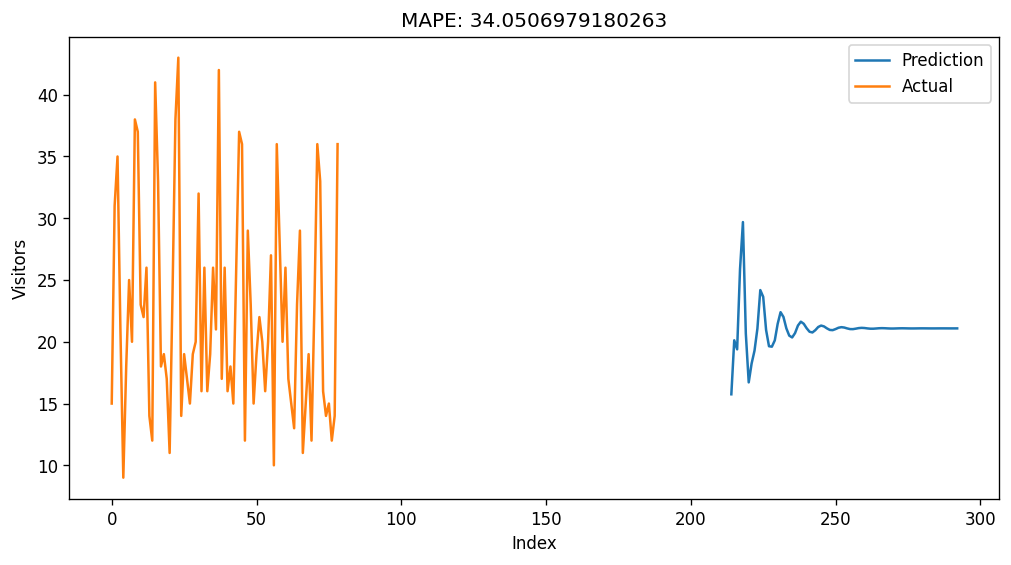

air_35512c42db0868da
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2078.908, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2283.460, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2196.452, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2076.989, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2281.463, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2078.905, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2076.081, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2078.004, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2078.001, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2194.453, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.309 seconds

 MAPE : 
 36.61271835919239

 MAE : 
  3.0614669191952304

 RMSLE : 
 0.5227

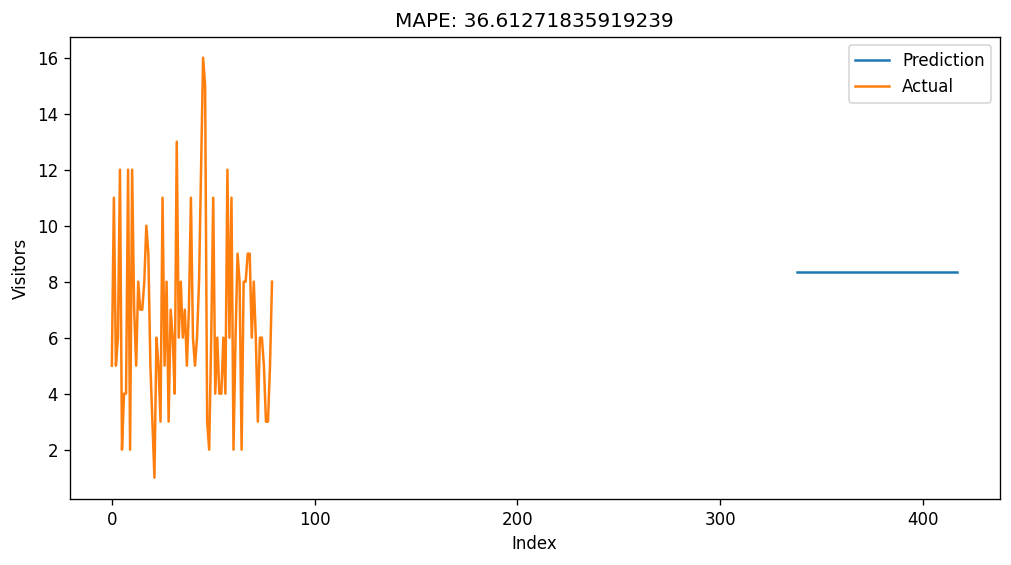

air_a271c9ba19e81d17
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1644.505, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.413, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1763.300, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1916.013, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1646.492, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1646.487, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1873.535, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1730.040, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1636.069, Time=0.75 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1637.154, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1637.215, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1637.129, Time=1.66 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1637.130, Time=1.54 sec
 ARIMA(0,0,0)(0,0

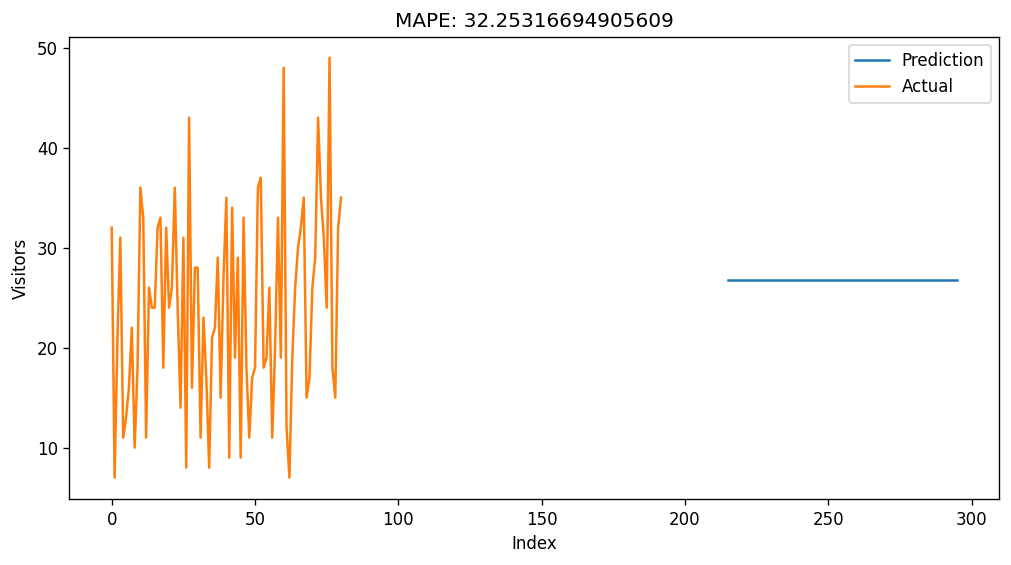

air_fd6aac1043520e83
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3122.338, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2762.920, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2944.954, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2722.516, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2685.646, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2673.286, Time=0.17 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2652.880, Time=0.19 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=2612.876, Time=0.38 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=inf, Time=1.01 sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=inf, Time=1.05 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=

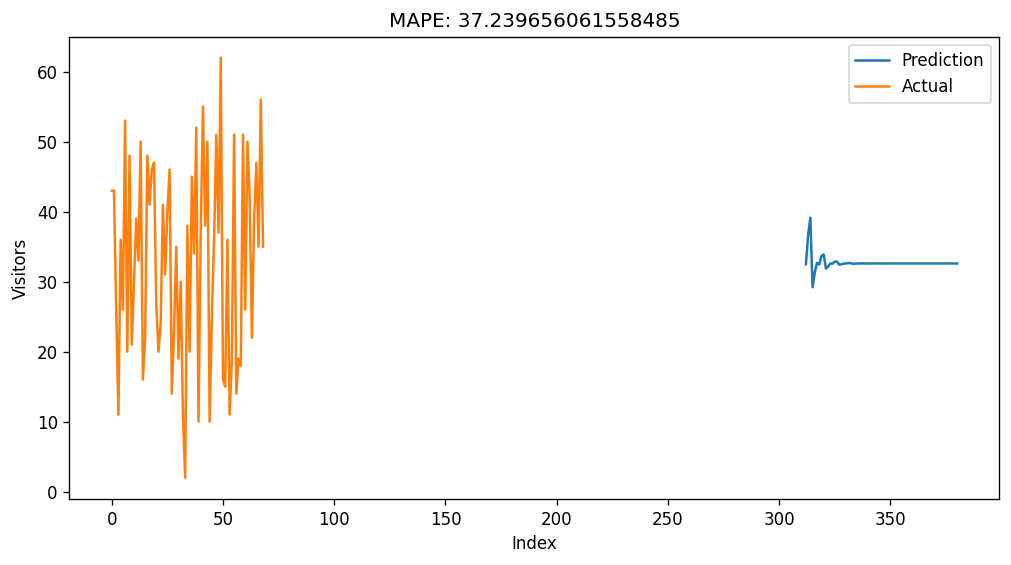

air_64d4491ad8cdb1c6
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2485.216, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2948.290, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2659.653, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2802.702, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2487.191, Time=1.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.75 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2750.717, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2605.918, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2488.497, Time=1.94 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2480.478, Time=0.70 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2478.868, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2477.253, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2478.899, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 7.133 seconds

 MAPE

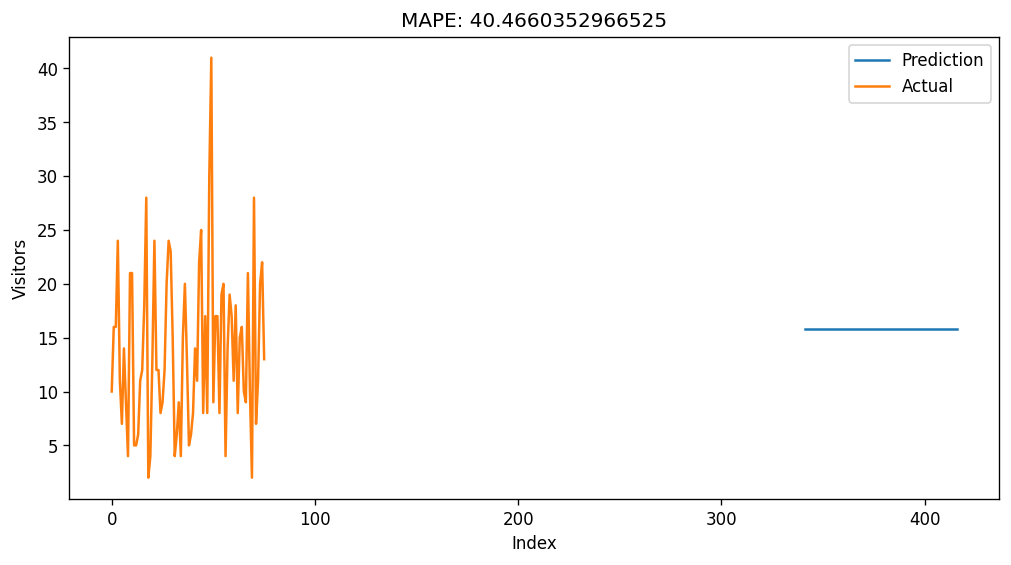

air_f3f9824b7d70c3cf
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1633.953, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1918.860, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1715.979, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1808.960, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1631.409, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1704.392, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1627.327, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1696.445, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1621.836, Time=0.75 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1691.746, Time=0.14 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1611.713, Time=0.78 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1679.256, Time=0.16 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=1608.723, Time=1.11 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=1653.429, Time=0.17 sec
 ARIMA(7,0,1

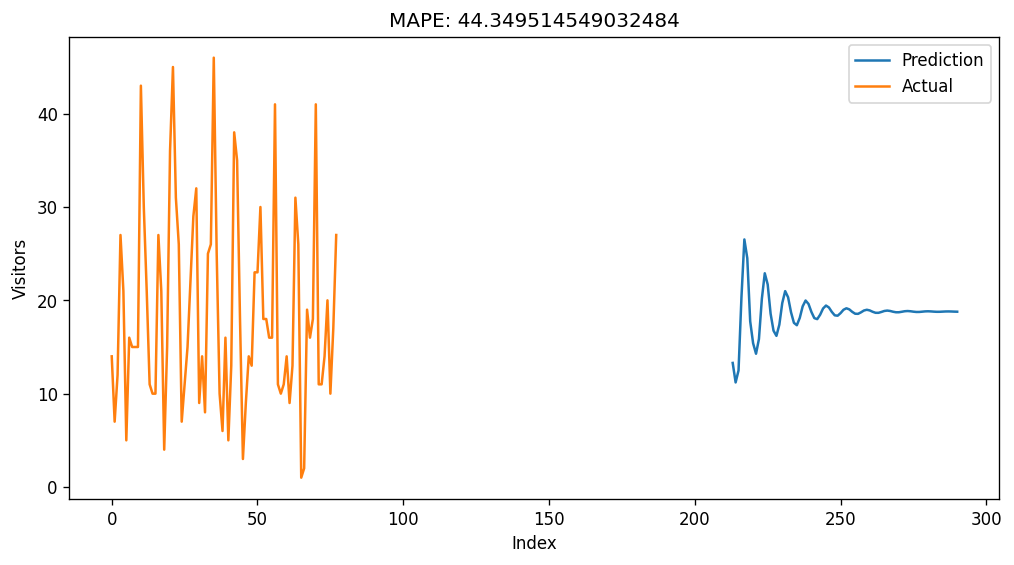

air_820d1919cbecaa0a
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1429.757, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2013.402, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1555.675, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1850.984, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1431.670, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1431.682, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1740.908, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1489.899, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1431.949, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1424.617, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1424.518, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1422.786, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1424.457, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.699 seconds



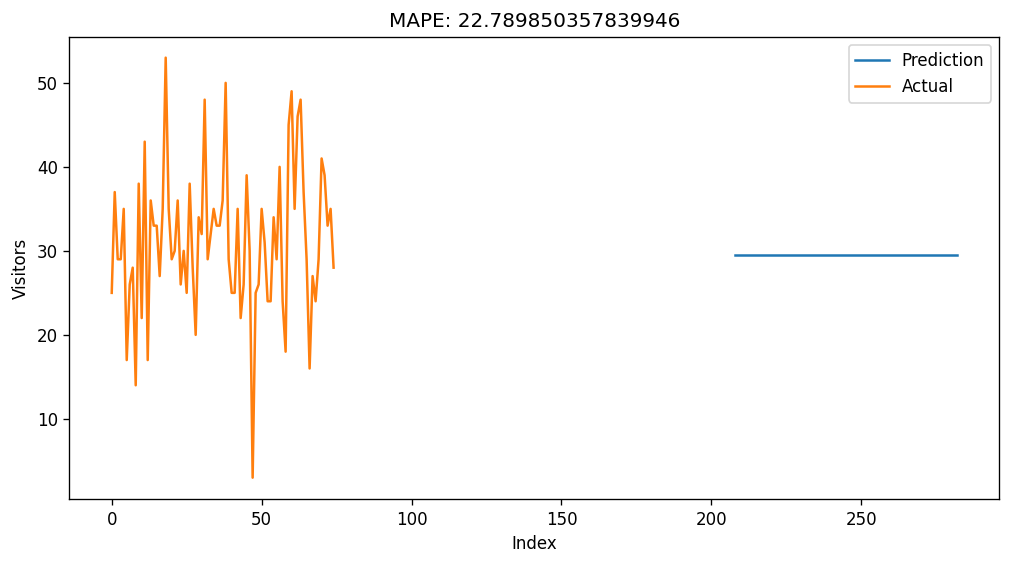

air_9ae7081cb77dc51e
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1919.812, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1673.445, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1787.325, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1667.222, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1648.732, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1643.130, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1638.495, Time=0.14 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1562.486, Time=0.63 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=1536.471, Time=0.42 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=1510.448, Time=0.41 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(7,0,2)(0,0,0)[0]         

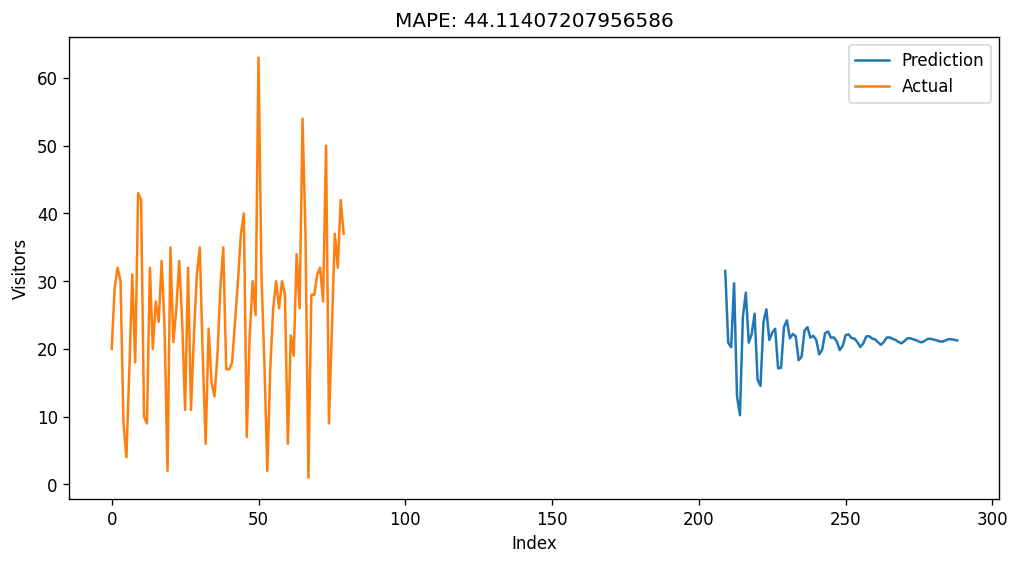

air_d69b08a175bc0387
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1072.507, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1053.042, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1070.509, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1023.165, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1018.168, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1005.798, Time=0.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1007.252, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1003.799, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1016.168, Time=0.10 sec
 ARIMA(5,1,0)(0,0,0)[0]             :

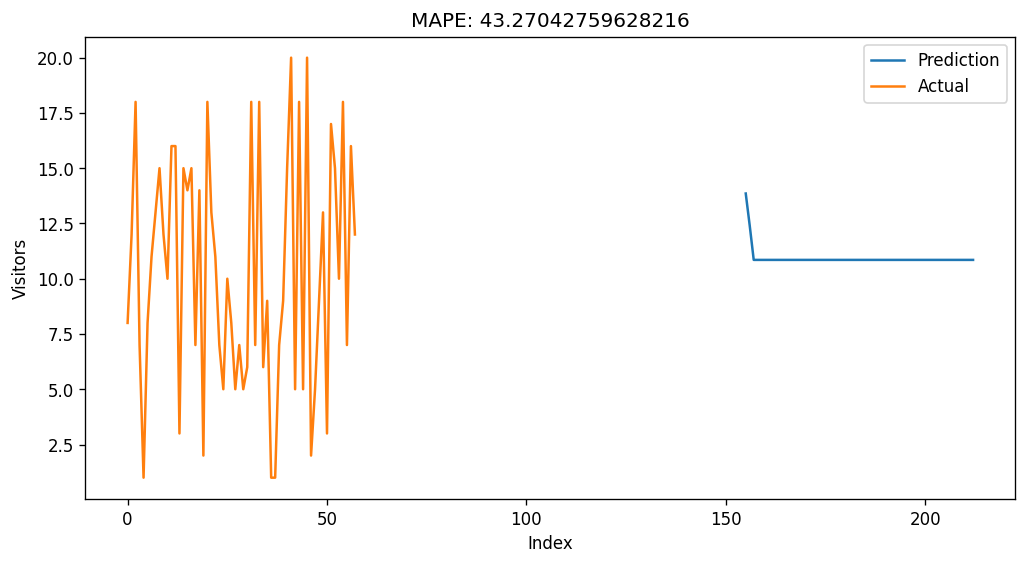

air_ee3a01f0c71a769f
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2837.891, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2832.088, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2835.915, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2806.002, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2762.594, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2676.295, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2641.116, Time=0.47 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=2643.057, Time=0.66 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2643.076, Time=0.94 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2650.805, Time=0.62 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.21 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2639.157, Time=0.37 sec
 ARIMA(4,1,0)(0,0,0)[0]    

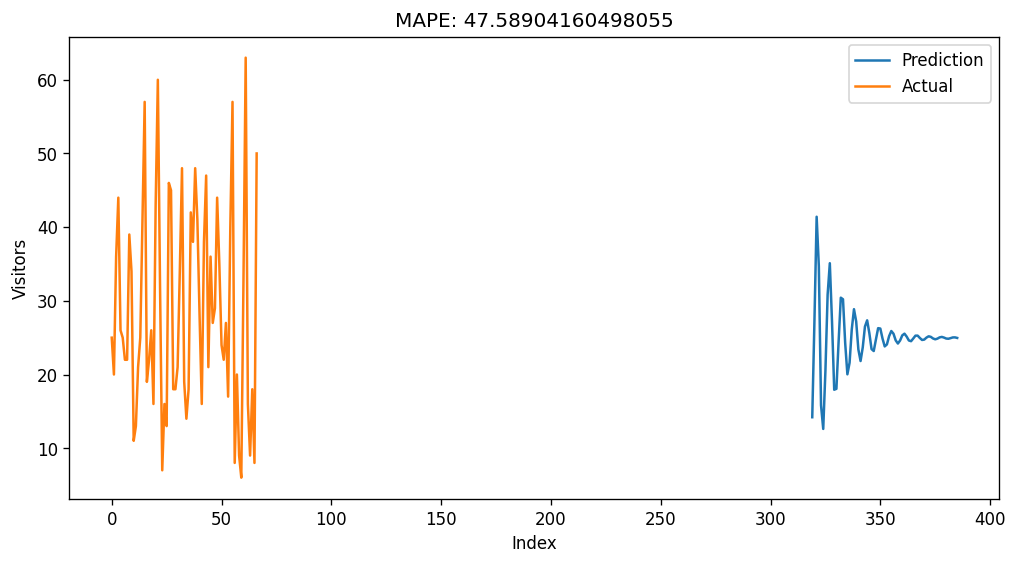

In [ ]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
mapes, rmsles, maes = [], [], []

for i in range(12):
    print("==============================================")
    print(air_store_id[i]);
    df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[i], :]

    # Get the train dataset, we will use the data till end of Jan 2017 for training
    train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
    train = df_tsf_restaurant[train_selector]

    test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
    test = df_tsf_restaurant[test_selector]

    # Fit auto_arima on train set
    model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1,
                            max_p = 7, max_q = 3, m = 30,
                            seasonal = False,
                            d = None, trace = True,
                            error_action ='ignore',
                            suppress_warnings = True,
                            stepwise = True)

    # To print the summary
    model.summary()


    # Get prediction for test duration
    predictions = pd.Series(model.predict(len(test)))
    predictions = predictions.map(lambda x: x if x >= 0 else 0)

    actuals = test['visitors'].reset_index(drop = True)

    # Evaluation Metric
    mape  = mean_absolute_percentage_error(predictions, actuals)
    rmsle = RMSLE(predictions, actuals)
    mae = mean_absolute_error(predictions, actuals)

    print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))
    print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
    print("\n RMSLE : \n", RMSLE(predictions, actuals))

    mapes.append(round(mape, 2))
    rmsles.append(rmsle)
    maes.append(mae)

    # plot predictions and actual values
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 5))
    actuals.plot(legend = True, label = "Actual");
    plt.title(f"MAPE: {mape}")
    plt.show()

#### Errors

**Replace Inf with NaN, to calculate mean**

In [ ]:
mapes_clean = pd.Series(mapes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
maes_clean = pd.Series(maes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
rmsles_clean = pd.Series(rmsles).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)

Calculate mean

In [ ]:
print("MAPES : ", np.nanmean(mapes_clean).round(2), mapes_clean)
print("MAES  : ", np.nanmean(maes_clean).round(2), maes_clean)
print("RMSLES: ", np.nanmean(rmsles_clean).round(2), rmsles_clean)

MAPES :  39.26 [49.13   nan 34.05 36.61 32.25 37.24 40.47 44.35 22.79 44.11 43.27 47.59]
MAES  :  7.52 [ 9.17  2.97  7.17  3.06  8.62 12.16  6.38  8.35  6.74  9.28  4.72 11.56]
RMSLES:  0.59 [0.74 1.05 0.38 0.52 0.49 0.55 0.61 0.64 0.35 0.6  0.64 0.53]


Let's build time series model for Air Genre "Yakiniku/Korean food", then go to restaurant level.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>13. ARIMA - AIR Genre level Model</h2>
</div

In [ ]:
# Reservations each day for air genre
df_genre = df_tsf.groupby(['air_genre_name','visit_date'], as_index=False).agg({'visitors': np.sum,
                                                                                'holiday_flg': np.mean,
                                                                                'tomorrow_is_holiday': np.mean,
                                                                                'yesterday_is_holiday': np.mean,
                                                                                'weekday': np.mean,
                                                                                'month': np.mean,
                                                                                'day_of_year': np.mean,
                                                                                'days_in_month': np.mean,
                                                                                'week_of_year': np.mean,
                                                                                'is_month_end': np.mean})
df_genre = df_genre.loc[df_genre['air_genre_name'] =="Yakiniku/Korean food",]
df_genre.reset_index(drop = True, inplace = True)
df_genre.head(35)

air_genre_name  visit_date  visitors  holiday_flg  tomorrow_is_holiday  yesterday_is_holiday  weekday  month  day_of_year  days_in_month  week_of_year  is_month_end
0   Yakiniku/Korean food  2016-01-02        60          1.0             1.000000              0.500000      5.0    1.0          2.0           31.0          53.0           0.0
1   Yakiniku/Korean food  2016-01-03        62          1.0             0.000000              1.000000      6.0    1.0          3.0           31.0          53.0           0.0
2   Yakiniku/Korean food  2016-01-04       113          0.0             0.000000              0.800000      0.0    1.0          4.0           31.0           1.0           0.0
3   Yakiniku/Korean food  2016-01-05        90          0.0             0.000000              0.000000      1.0    1.0          5.0           31.0           1.0           0.0
4   Yakiniku/Korean food  2016-01-06       132          0.0             0.000000              0.166667      2.0    1.0          6.0           31.0           1.0           0.0
5   Yakiniku/Korean food  2016-01-07       102          0.0             0.000000              0.000000      3.0    1.0          7.0           31.0           1.0           0.0
6   Yakiniku/Korean food  2016-01-08       174          0.0             1.000000              0.000000      4.0    1.0          8.0           31.0           1.0           0.0
7   Yakiniku/Korean food  2016-01-09       150          0.0             1.000000              0.000000      5.0    1.0          9.0           31.0           1.0           0.0
8   Yakiniku/Korean food  2016-01-10       136          0.0             1.000000              1.000000      6.0    1.0         10.0           31.0           1.0           0.0
9   Yakiniku/Korean food  2016-01-11        83          1.0             0.000000              0.833333      0.0    1.0         11.0           31.0           2.0           0.0
10  Yakiniku/Korean food  2016-01-12       109          0.0             0.000000              1.000000      1.0    1.0         12.0           31.0           2.0           0.0
11  Yakiniku/Korean food  2016-01-13       174          0.0             0.000000              0.166667      2.0    1.0         13.0           31.0           2.0           0.0
12  Yakiniku/Korean food  2016-01-14       101          0.0             0.000000              0.000000      3.0    1.0         14.0           31.0           2.0           0.0
13  Yakiniku/Korean food  2016-01-15       193          0.0             0.857143              0.142857      4.0    1.0         15.0           31.0           2.0           0.0
14  Yakiniku/Korean food  2016-01-16       132          0.0             1.000000              0.000000      5.0    1.0         16.0           31.0           2.0           0.0
15  Yakiniku/Korean food  2016-01-17        99          0.0             0.000000              1.000000      6.0    1.0         17.0           31.0           2.0           0.0
16  Yakiniku/Korean food  2016-01-18       111          0.0             0.000000              0.857143      0.0    1.0         18.0           31.0           3.0           0.0
17  Yakiniku/Korean food  2016-01-19        78          0.0             0.000000              0.000000      1.0    1.0         19.0           31.0           3.0           0.0
18  Yakiniku/Korean food  2016-01-20       110          0.0             0.000000              0.000000      2.0    1.0         20.0           31.0           3.0           0.0
19  Yakiniku/Korean food  2016-01-21       172          0.0             0.000000              0.000000      3.0    1.0         21.0           31.0           3.0           0.0
20  Yakiniku/Korean food  2016-01-22       217          0.0             1.000000              0.000000      4.0    1.0         22.0           31.0           3.0           0.0
21  Yakiniku/Korean food  2016-01-23       128          0.0             0.714286              0.000000      5.0    1.0         23.0           31.0           3.0

In [ ]:
# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_genre.visit_date < '2017-02-01'
train = df_genre[train_selector]
test_selector = df_genre.visit_date >= '2017-02-01'
test = df_genre[test_selector]

In [ ]:
train.head()

air_genre_name  visit_date  visitors  holiday_flg  tomorrow_is_holiday  yesterday_is_holiday  weekday  month  day_of_year  days_in_month  week_of_year  is_month_end
0  Yakiniku/Korean food  2016-01-02        60          1.0                  1.0              0.500000      5.0    1.0          2.0           31.0          53.0           0.0
1  Yakiniku/Korean food  2016-01-03        62          1.0                  0.0              1.000000      6.0    1.0          3.0           31.0          53.0           0.0
2  Yakiniku/Korean food  2016-01-04       113          0.0                  0.0              0.800000      0.0    1.0          4.0           31.0           1.0           0.0
3  Yakiniku/Korean food  2016-01-05        90          0.0                  0.0              0.000000      1.0    1.0          5.0           31.0           1.0           0.0
4  Yakiniku/Korean food  2016-01-06       132          0.0                  0.0              0.166667      2.0    1.0          6.0           31.0           1.0           0.0

### Build Auto ARIMA Model at Genre Level

In [ ]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 7,
                          seasonal = False,
                          d = None, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4634.176, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4752.018, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4746.115, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4683.867, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4750.045, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4608.674, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4715.027, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4602.631, Time=0.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4701.800, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4612.545, Time=1.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4581.213, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4618.852, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4609.687, Time=0.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  396
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2284.606
Date:                Sat, 19 Oct 2024   AIC                           4581.213
Time:                        06:26:42   BIC                           4605.086
Sample:                             0   HQIC                          4590.672
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5011      0.507      0.989      0.323      -0.492       1.494
ar.L1          0.9914      0.064     15.505      0.000       0.866       1.117
ar.L2         -0.5708      0.036    -15.666      0.000      -0.642      -0.499
ma.L1         -1.5125      0.071    -21.211      0.000      -1.652      -1.373
ma.L2          0.6334      0.067      9.470      0.000       0.502       0.765
sigma2      6155.4297    316.628     19.441      0.000    5534.851    6776.009
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                66.12
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               5.88   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make Predictions

In [ ]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
actuals = test['visitors'].reset_index(drop = True)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  103.77842002000196

 RMSLE : 
 0.2475515345349541

 MAPE : 
 21.787967180073124


#### Plot

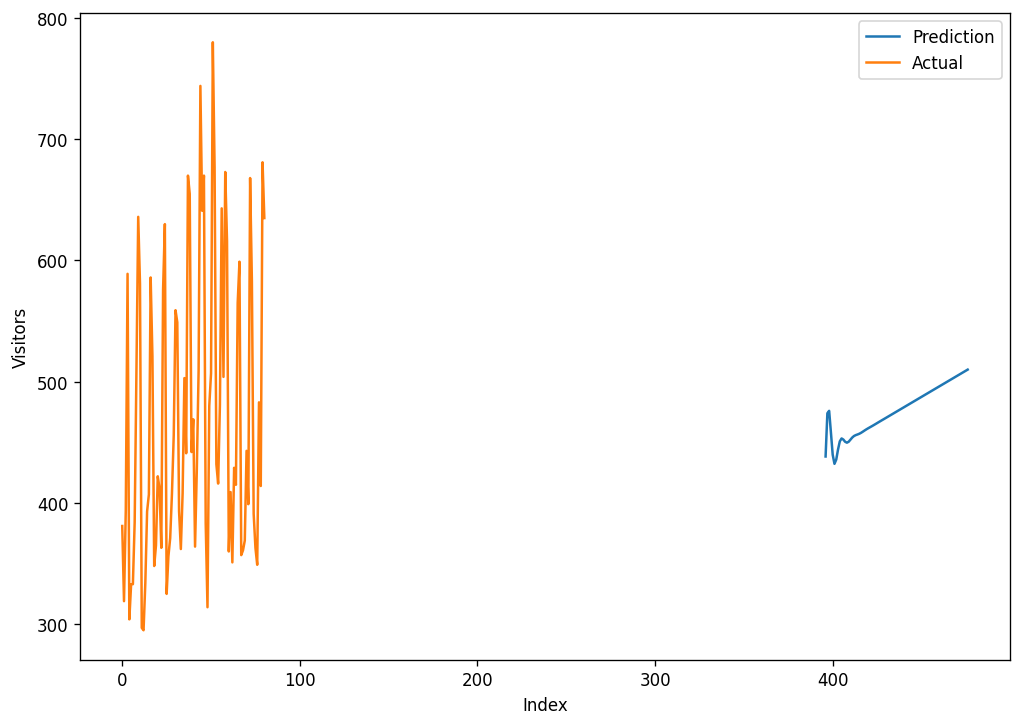

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7))
actuals.plot(legend = True, label = "Actual");

### **Prediction at restaurant level**

Now once you have the predictions at genre level, you need to get the predictions for every restaurant.

For that you can split the predicted visitors among all restaurants in the genre by looking at the historical share of restaurants in the genre

In [ ]:
# Get the data for Yakiniku/Korean food genre
gen_df = df_tsf.loc[df_tsf['air_genre_name'] =="Yakiniku/Korean food",]
gen_df.reset_index(drop = True, inplace = True)
gen_df.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end        air_genre_name                air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city    street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                                        area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_b80fed1a07c817d2_2016-07-02  air_b80fed1a07c817d2  2016-07-02         8    Saturday            0        1            1                    0                     1          1        5  2016      7          184             31            26         False  Yakiniku/Korean food  Ōsaka-fu Ōsaka-shi Ōgimachi     34.705362     135.510025          NaN            NaN           NaN           NaN            NaN  Ōsaka-fu  Ōsaka-shi  Ōgimachi                    25                  66                       74                    NaN               NaN         NaN           NaN          NaN  Ōsaka-fu Ōsaka-shi Ōgimachi_Yakiniku/Korean food  air_b80fed1a07c817d2_5  air_b80fed1a07c817d2_5_0       6.166667              4.5           1.0          24.0
1    past  air_b80fed1a07c817d2_2016-07-04  air_b80fed1a07c817d2  2016-07-04         2      Monday            0        0            0                    0                     1          1        0  2016      7          186             31            27         False  Yakiniku/Korean food  Ōsaka-fu Ōsaka-shi Ōgimachi     34.705362     135.510025          NaN            NaN           NaN           NaN            NaN  Ōsaka-fu  Ōsaka-shi  Ōgimachi                    25                  66                       74                    NaN               NaN         NaN           NaN          NaN  Ōsaka-fu Ōsaka-shi Ōgimachi_Yakiniku/Korean food  air_b80fed1a07c817d2_0  air_b80fed1a07c817d2_0_0       4.142857              4.0           1.0          11.0
2    past  air_b80fed1a07c817d2_2016-07-05  air_b80fed1a07c817d2  2016-07-05         8     Tuesday            0        0            0                    0                     0          1        1  2016      7          187             31            27         False  Yakiniku/Korean food  Ōsaka-fu Ōsaka-shi Ōgimachi     34.705362     135.510025          NaN            NaN           NaN           NaN            NaN  Ōsaka-fu  Ōsaka-shi  Ōgimachi                    25                  66                       74                    NaN               NaN         NaN           NaN          NaN  Ōsaka-fu Ōsaka-shi Ōgimachi_Yakiniku/Korean food  air_b80fed1a07c817d2_1  air_b80fed1a07c817d2_1_0       4.945946              4.0           1.0          18.0
3    past  air_b80fed1a07c817d2_2016-07-06  air_b80fed1a07c817d2  2016-07-06        13   Wednesday            0        0            0                    0                     0          1        2  2016      7          188             31            27         False  Yakiniku/Korean food  Ōsaka-fu Ōsaka-shi Ōgimachi     34.705362     135.510025          NaN            NaN           NaN           NaN            NaN  Ōsaka-fu  Ōsaka-shi  Ōgimachi                    25                  66                       74                    NaN               NaN         NaN           NaN          NaN  Ōsaka-fu Ōsaka-shi Ōgimachi_Yakiniku/Korean food  air_b80fed1a07c817d2_2  air_b80fed1a07c817d2_2_0       7.382353              7.0           1.0          15.0
4    past  air_b80fed1a07c817d2_2016-07-07  air_b80fed1a07c817d2  2016-07-07         8    Thursday            0        0            0                    0                     0          1        3  2016      7          189     

**Total Visitors by each restaurant**

In [ ]:
# Aggregate the data by air_store_id to compute the total visitors for every restaurant in the past
store_visitor_df = gen_df.groupby(['air_store_id'], as_index=False).agg({'visitors': np.sum})
store_visitor_df.head()

air_store_id  visitors
0  air_08f994758a1e76d4      7569
1  air_1653a6c513865af3     13913
2  air_2aab19554f91ff82     13292
3  air_2bffb19a24d11729      5014
4  air_2fc478dc9f0a6b31      2934

**Restaurant Share**

In [ ]:
# Get the share of every restaurant in the genre
store_visitor_df['restaurant_share'] = store_visitor_df['visitors']/store_visitor_df['visitors'].sum()
store_visitor_df.head()

air_store_id  visitors  restaurant_share
0  air_08f994758a1e76d4      7569          0.050737
1  air_1653a6c513865af3     13913          0.093262
2  air_2aab19554f91ff82     13292          0.089099
3  air_2bffb19a24d11729      5014          0.033610
4  air_2fc478dc9f0a6b31      2934          0.019667

**Total Visitors every day**

In [ ]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

visit_date    visitors
0  2017-02-01  438.328164
1  2017-02-02  473.998637
2  2017-02-03  475.999674
3  2017-02-04  458.124955
4  2017-02-05  439.763477

**Cartesian Merge**

In [ ]:
# Merge the prediction df and store_visitor df
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(1863, 4)

In [ ]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

visit_date    visitors          air_store_id  restaurant_share
0   2017-02-01  438.328164  air_08f994758a1e76d4          0.050737
1   2017-02-01  438.328164  air_1653a6c513865af3          0.093262
2   2017-02-01  438.328164  air_2aab19554f91ff82          0.089099
3   2017-02-01  438.328164  air_2bffb19a24d11729          0.033610
4   2017-02-01  438.328164  air_2fc478dc9f0a6b31          0.019667
5   2017-02-01  438.328164  air_396166d47733d5c9          0.039690
6   2017-02-01  438.328164  air_3f91d592acd6cc0b          0.040856
7   2017-02-01  438.328164  air_42d41eb58cad170e          0.043095
8   2017-02-01  438.328164  air_52e2a1fd42bc917a          0.018333
9   2017-02-01  438.328164  air_5e70fe82f9e4fab6          0.038376
10  2017-02-01  438.328164  air_627cabe2fe53f33f          0.023924
11  2017-02-01  438.328164  air_6c952e3c6e590945          0.046279
12  2017-02-01  438.328164  air_8093d0b565e9dbdf          0.109350
13  2017-02-01  438.328164  air_98b54e32ccddd896          0.028147
14  2017-02-01  438.328164  air_a546cbf478a8b6e4          0.045562
15  2017-02-01  438.328164  air_a9133955abccf071          0.058908
16  2017-02-01  438.328164  air_b80fed1a07c817d2          0.007809
17  2017-02-01  438.328164  air_c2626f5f86d57342          0.035507
18  2017-02-01  438.328164  air_c73d319ffabf287a          0.045347
19  2017-02-01  438.328164  air_cf5ab75a0afb8af9          0.019124
20  2017-02-01  438.328164  air_dc71c6cc06cd1aa2          0.014881
21  2017-02-01  438.328164  air_dfad598ff642dab7          0.074955
22  2017-02-01  438.328164  air_f180301886c21375          0.023481
23  2017-02-02  473.998637  air_08f994758a1e76d4          0.050737
24  2017-02-02  473.998637  air_1653a6c513865af3          0.093262
25  2017-02-02  473.998637  air_2aab19554f91ff82          0.089099
26  2017-02-02  473.998637  air_2bffb19a24d11729          0.033610
27  2017-02-02  473.998637  air_2fc478dc9f0a6b31          0.019667
28  2017-02-02  473.998637  air_396166d47733d5c9          0.039690
29  2017-02-02  473.998637  air_3f91d592acd6cc0b          0.040856
30  2017-02-02  473.998637  air_42d41eb58cad170e          0.043095
31  2017-02-02  473.998637  air_52e2a1fd42bc917a          0.018333
32  2017-02-02  473.998637  air_5e70fe82f9e4fab6          0.038376
33  2017-02-02  473.998637  air_627cabe2fe53f33f          0.023924
34  2017-02-02  473.998637  air_6c952e3c6e590945          0.046279
35  2017-02-02  473.998637  air_8093d0b565e9dbdf          0.109350
36  2017-02-02  473.998637  air_98b54e32ccddd896          0.028147
37  2017-02-02  473.998637  air_a546cbf478a8b6e4          0.045562
38  2017-02-02  473.998637  air_a9133955abccf071          0.058908
39  2017-02-02  473.998637  air_b80fed1a07c817d2          0.007809
40  2017-02-02  473.998637  air_c2626f5f86d57342          0.035507
41  2017-02-02  473.998637  air_c73d319ffabf287a          0.045347
42  2017-02-02  473.998637  air_cf5ab75a0afb8af9          0.019124
43  2017-02-02  473.998637  air_dc71c6cc06cd1aa2          0.014881
44  2017-02-02  473.998637  air_dfad598ff642dab7          0.074955
45  2017-02-02  473.998637  air_f180301886c21375          0.023481
46  2017-02-03  475.999674  air_08f994758a1e76d4          0.050737
47  2017-02-03  475.999674  air_1653a6c513865af3          0.093262
48  2017-02-03  475.999674  air_2aab19554f91ff82          0.089099
49  2017-02-03  475.999674  air_2bffb19a24d11729          0.033610

**Visitors split by restaurant share**

In [ ]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']
restaurant_prediction_df.head()

visit_date    visitors          air_store_id  restaurant_share  visitors_predicted
0  2017-02-01  438.328164  air_08f994758a1e76d4          0.050737           22.239318
1  2017-02-01  438.328164  air_1653a6c513865af3          0.093262           40.879327
2  2017-02-01  438.328164  air_2aab19554f91ff82          0.089099           39.054698
3  2017-02-01  438.328164  air_2bffb19a24d11729          0.033610           14.732189
4  2017-02-01  438.328164  air_2fc478dc9f0a6b31          0.019667            8.620710

**Actual visitors for each restaurant**

In [ ]:
# y actual
restaurant_df_actual = gen_df.loc[gen_df.visit_date >= '2017-02-01', ['air_store_id', 'visit_date', 'visitors']]
restaurant_df_actual.reset_index(drop = True, inplace = True)
restaurant_df_actual.head()

air_store_id  visit_date  visitors
0  air_b80fed1a07c817d2  2017-02-01         3
1  air_b80fed1a07c817d2  2017-02-02         4
2  air_b80fed1a07c817d2  2017-02-03         3
3  air_b80fed1a07c817d2  2017-02-04        14
4  air_b80fed1a07c817d2  2017-02-06         8

**Evaluate**

In [ ]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('visitors', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()

visit_date          air_store_id  restaurant_share  visitors_predicted  visitors
0  2017-02-01  air_08f994758a1e76d4          0.050737           22.239318        34
1  2017-02-01  air_1653a6c513865af3          0.093262           40.879327        19
2  2017-02-01  air_2aab19554f91ff82          0.089099           39.054698        64
3  2017-02-01  air_2bffb19a24d11729          0.033610           14.732189        18
4  2017-02-01  air_396166d47733d5c9          0.039690           17.397146         9

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n RMSLE : \n", RMSLE(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))


 MAE : 
  10.673274116107809

 RMSLE : 
 0.6763784360544559

 MAPE : 
 63.86870932654134


## **14. Build Auto ARIMA - SARIMA model**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>14. Build Auto ARIMA - SARIMA model</h2>
</div>

### **SARIMA Modeling at Genre Level and then split Restaurants share**

Let's build a Seasonal ARIMA model at genre level and then go to restaurant level.

In [ ]:
train.head()

air_genre_name  visit_date  visitors  holiday_flg  tomorrow_is_holiday  yesterday_is_holiday  weekday  month  day_of_year  days_in_month  week_of_year  is_month_end
0  Yakiniku/Korean food  2016-01-02        60          1.0                  1.0              0.500000      5.0    1.0          2.0           31.0          53.0           0.0
1  Yakiniku/Korean food  2016-01-03        62          1.0                  0.0              1.000000      6.0    1.0          3.0           31.0          53.0           0.0
2  Yakiniku/Korean food  2016-01-04       113          0.0                  0.0              0.800000      0.0    1.0          4.0           31.0           1.0           0.0
3  Yakiniku/Korean food  2016-01-05        90          0.0                  0.0              0.000000      1.0    1.0          5.0           31.0           1.0           0.0
4  Yakiniku/Korean food  2016-01-06       132          0.0                  0.0              0.166667      2.0    1.0          6.0           31.0           1.0           0.0

In [ ]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1,
                      max_p = 3, max_q = 3, m = 7,
                      start_P = 0, seasonal = True,
                      d = None, D = 1, trace = True,
                      error_action ='ignore',
                      suppress_warnings = True,
                      stepwise = True,  max_D=2, max_order=5)

# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=4371.468, Time=1.10 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=4536.810, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=4457.226, Time=0.70 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=4402.662, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=4536.953, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=4503.985, Time=0.38 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=4364.679, Time=1.39 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=4458.946, Time=0.72 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=4363.831, Time=6.42 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=4429.453, Time=3.17 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=4.33 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=4365.112, Time=3.60 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=4369.736, Time=4.61 sec
 ARIMA(2,0,1)(2,1,1)[7] intercept   : AIC=4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  396
Model:             SARIMAX(2, 0, 1)x(2, 1, [1, 2], 7)   Log Likelihood               -2166.193
Date:                                Sat, 19 Oct 2024   AIC                           4350.386
Time:                                        06:28:23   BIC                           4386.059
Sample:                                             0   HQIC                          4364.528
                                                - 396                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0937      0.112      0.835      0.404      -0.126       0.313
ar.L1          1.2349      0.058     21.295      0.000       1.121       1.349
ar.L2         -0.2602      0.045     -5.779      0.000      -0.348      -0.172
ma.L1         -0.8519      0.047    -18.061      0.000      -0.944      -0.759
ar.S.L7        0.5622      0.428      1.312      0.190      -0.278       1.402
ar.S.L14      -0.1801      0.080     -2.257      0.024      -0.336      -0.024
ma.S.L7       -1.3207      0.432     -3.060      0.002      -2.167      -0.475
ma.S.L14       0.3935      0.395      0.997      0.319      -0.380       1.167
sigma2      3905.6155    158.354     24.664      0.000    3595.247    4215.984
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               732.46
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               6.29   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
actuals = test['visitors'].reset_index(drop = True)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  56.78354459788864

 RMSLE : 
 0.156127763522096

 MAPE : 
 12.053076139683595


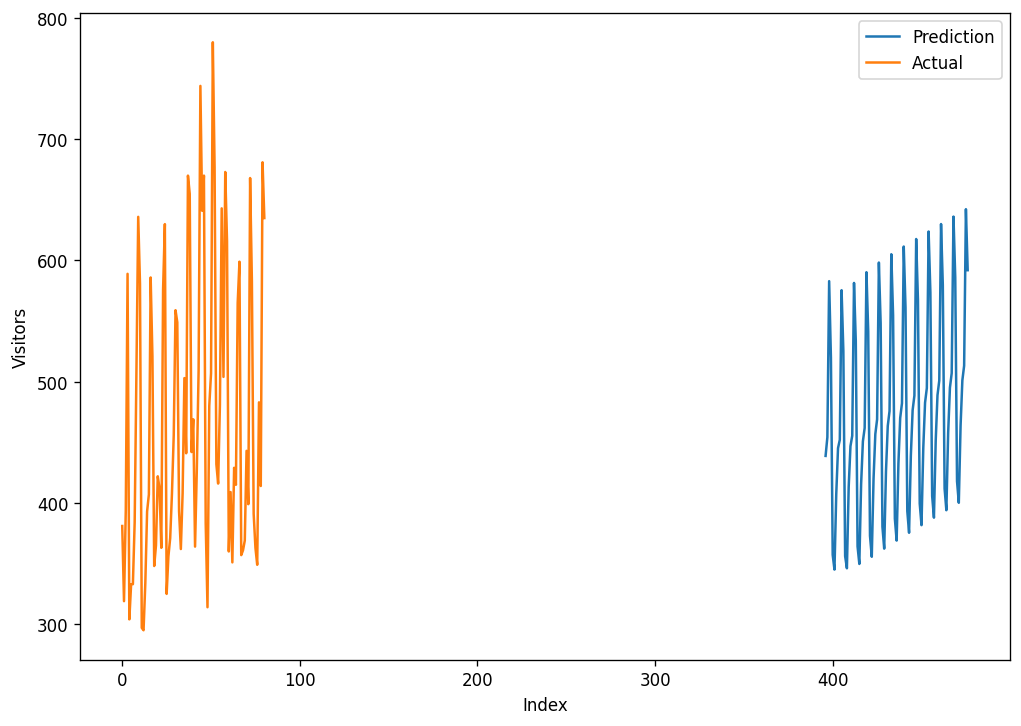

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7))
actuals.plot(legend = True, label = "Actual");

#### Prediction at restaurant level

In [ ]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

visit_date    visitors
0  2017-02-01  438.809204
1  2017-02-02  454.281086
2  2017-02-03  582.948731
3  2017-02-04  519.934325
4  2017-02-05  357.205013

In [ ]:
# Merge the prediction df and store_visitor df
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(1863, 4)

In [ ]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

visit_date    visitors          air_store_id  restaurant_share
0   2017-02-01  438.809204  air_08f994758a1e76d4          0.050737
1   2017-02-01  438.809204  air_1653a6c513865af3          0.093262
2   2017-02-01  438.809204  air_2aab19554f91ff82          0.089099
3   2017-02-01  438.809204  air_2bffb19a24d11729          0.033610
4   2017-02-01  438.809204  air_2fc478dc9f0a6b31          0.019667
5   2017-02-01  438.809204  air_396166d47733d5c9          0.039690
6   2017-02-01  438.809204  air_3f91d592acd6cc0b          0.040856
7   2017-02-01  438.809204  air_42d41eb58cad170e          0.043095
8   2017-02-01  438.809204  air_52e2a1fd42bc917a          0.018333
9   2017-02-01  438.809204  air_5e70fe82f9e4fab6          0.038376
10  2017-02-01  438.809204  air_627cabe2fe53f33f          0.023924
11  2017-02-01  438.809204  air_6c952e3c6e590945          0.046279
12  2017-02-01  438.809204  air_8093d0b565e9dbdf          0.109350
13  2017-02-01  438.809204  air_98b54e32ccddd896          0.028147
14  2017-02-01  438.809204  air_a546cbf478a8b6e4          0.045562
15  2017-02-01  438.809204  air_a9133955abccf071          0.058908
16  2017-02-01  438.809204  air_b80fed1a07c817d2          0.007809
17  2017-02-01  438.809204  air_c2626f5f86d57342          0.035507
18  2017-02-01  438.809204  air_c73d319ffabf287a          0.045347
19  2017-02-01  438.809204  air_cf5ab75a0afb8af9          0.019124
20  2017-02-01  438.809204  air_dc71c6cc06cd1aa2          0.014881
21  2017-02-01  438.809204  air_dfad598ff642dab7          0.074955
22  2017-02-01  438.809204  air_f180301886c21375          0.023481
23  2017-02-02  454.281086  air_08f994758a1e76d4          0.050737
24  2017-02-02  454.281086  air_1653a6c513865af3          0.093262
25  2017-02-02  454.281086  air_2aab19554f91ff82          0.089099
26  2017-02-02  454.281086  air_2bffb19a24d11729          0.033610
27  2017-02-02  454.281086  air_2fc478dc9f0a6b31          0.019667
28  2017-02-02  454.281086  air_396166d47733d5c9          0.039690
29  2017-02-02  454.281086  air_3f91d592acd6cc0b          0.040856
30  2017-02-02  454.281086  air_42d41eb58cad170e          0.043095
31  2017-02-02  454.281086  air_52e2a1fd42bc917a          0.018333
32  2017-02-02  454.281086  air_5e70fe82f9e4fab6          0.038376
33  2017-02-02  454.281086  air_627cabe2fe53f33f          0.023924
34  2017-02-02  454.281086  air_6c952e3c6e590945          0.046279
35  2017-02-02  454.281086  air_8093d0b565e9dbdf          0.109350
36  2017-02-02  454.281086  air_98b54e32ccddd896          0.028147
37  2017-02-02  454.281086  air_a546cbf478a8b6e4          0.045562
38  2017-02-02  454.281086  air_a9133955abccf071          0.058908
39  2017-02-02  454.281086  air_b80fed1a07c817d2          0.007809
40  2017-02-02  454.281086  air_c2626f5f86d57342          0.035507
41  2017-02-02  454.281086  air_c73d319ffabf287a          0.045347
42  2017-02-02  454.281086  air_cf5ab75a0afb8af9          0.019124
43  2017-02-02  454.281086  air_dc71c6cc06cd1aa2          0.014881
44  2017-02-02  454.281086  air_dfad598ff642dab7          0.074955
45  2017-02-02  454.281086  air_f180301886c21375          0.023481
46  2017-02-03  582.948731  air_08f994758a1e76d4          0.050737
47  2017-02-03  582.948731  air_1653a6c513865af3          0.093262
48  2017-02-03  582.948731  air_2aab19554f91ff82          0.089099
49  2017-02-03  582.948731  air_2bffb19a24d11729          0.033610

In [ ]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

visit_date    visitors          air_store_id  restaurant_share  visitors_predicted
0  2017-02-01  438.809204  air_08f994758a1e76d4          0.050737           22.263724
1  2017-02-01  438.809204  air_1653a6c513865af3          0.093262           40.924190
2  2017-02-01  438.809204  air_2aab19554f91ff82          0.089099           39.097558
3  2017-02-01  438.809204  air_2bffb19a24d11729          0.033610           14.748357
4  2017-02-01  438.809204  air_2fc478dc9f0a6b31          0.019667            8.630171

In [ ]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('visitors', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()



visit_date          air_store_id  restaurant_share  visitors_predicted  visitors
0  2017-02-01  air_08f994758a1e76d4          0.050737           22.263724        34
1  2017-02-01  air_1653a6c513865af3          0.093262           40.924190        19
2  2017-02-01  air_2aab19554f91ff82          0.089099           39.097558        64
3  2017-02-01  air_2bffb19a24d11729          0.033610           14.748357        18
4  2017-02-01  air_396166d47733d5c9          0.039690           17.416239         9

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n RMSLE : \n", RMSLE(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))


 MAE : 
  10.335899706624241

 RMSLE : 
 0.6593090181378689

 MAPE : 
 62.425211005615274


### **SARIMA Modeling directly at Restaurant Level**

In [ ]:
air_store_id = df_tsf.air_store_id.unique()
air_store_id[:10]

array(['air_ba937bf13d40fb24', 'air_25e9888d30b386df',
       'air_8e4360a64dbd4c50', 'air_35512c42db0868da',
       'air_a271c9ba19e81d17', 'air_fd6aac1043520e83',
       'air_64d4491ad8cdb1c6', 'air_f3f9824b7d70c3cf',
       'air_820d1919cbecaa0a', 'air_9ae7081cb77dc51e'], dtype=object)

In [ ]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[4], :]

# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
train = df_tsf_restaurant[train_selector]

test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
test = df_tsf_restaurant[test_selector]

In [ ]:
df_tsf_restaurant.reset_index(drop=True, inplace=True)
df_tsf_restaurant.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                  air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city      street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                             area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_a271c9ba19e81d17_2016-07-01  air_a271c9ba19e81d17  2016-07-01        16      Friday            0        0            0                    1                     1          1        4  2016      7          183             31            26         False        Izakaya  Tōkyō-to Meguro-ku Kamimeguro     35.641463     139.698171          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Meguro-ku  Kamimeguro                    22                  26                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Meguro-ku Kamimeguro_Izakaya  air_a271c9ba19e81d17_4  air_a271c9ba19e81d17_4_0      28.243902             27.0          14.0          60.0
1    past  air_a271c9ba19e81d17_2016-07-02  air_a271c9ba19e81d17  2016-07-02        36    Saturday            0        1            1                    1                     0          1        5  2016      7          184             31            26         False        Izakaya  Tōkyō-to Meguro-ku Kamimeguro     35.641463     139.698171          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Meguro-ku  Kamimeguro                    22                  26                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Meguro-ku Kamimeguro_Izakaya  air_a271c9ba19e81d17_5  air_a271c9ba19e81d17_5_0      30.025000             31.5           8.0          57.0
2    past  air_a271c9ba19e81d17_2016-07-03  air_a271c9ba19e81d17  2016-07-03        30      Sunday            0        1            1                    0                     1          1        6  2016      7          185             31            26         False        Izakaya  Tōkyō-to Meguro-ku Kamimeguro     35.641463     139.698171          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Meguro-ku  Kamimeguro                    22                  26                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Meguro-ku Kamimeguro_Izakaya  air_a271c9ba19e81d17_6  air_a271c9ba19e81d17_6_0      30.075000             30.5          11.0          61.0
3    past  air_a271c9ba19e81d17_2016-07-04  air_a271c9ba19e81d17  2016-07-04        28      Monday            0        0            0                    0                     1          1        0  2016      7          186             31            27         False        Izakaya  Tōkyō-to Meguro-ku Kamimeguro     35.641463     139.698171          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Meguro-ku  Kamimeguro                    22                  26                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Meguro-ku Kamimeguro_Izakaya  air_a271c9ba19e81d17_0  air_a271c9ba19e81d17_0_0      20.142857             20.0           8.0          35.0
4    past  air_a271c9ba19e81d17_2016-07-05  air_a271c9ba19e81d17  2016-07-05        19     Tuesday            0        0            0                    0                     0          1        1  2016      7          187             31            27         False        Izakaya  Tōkyō-to Meguro

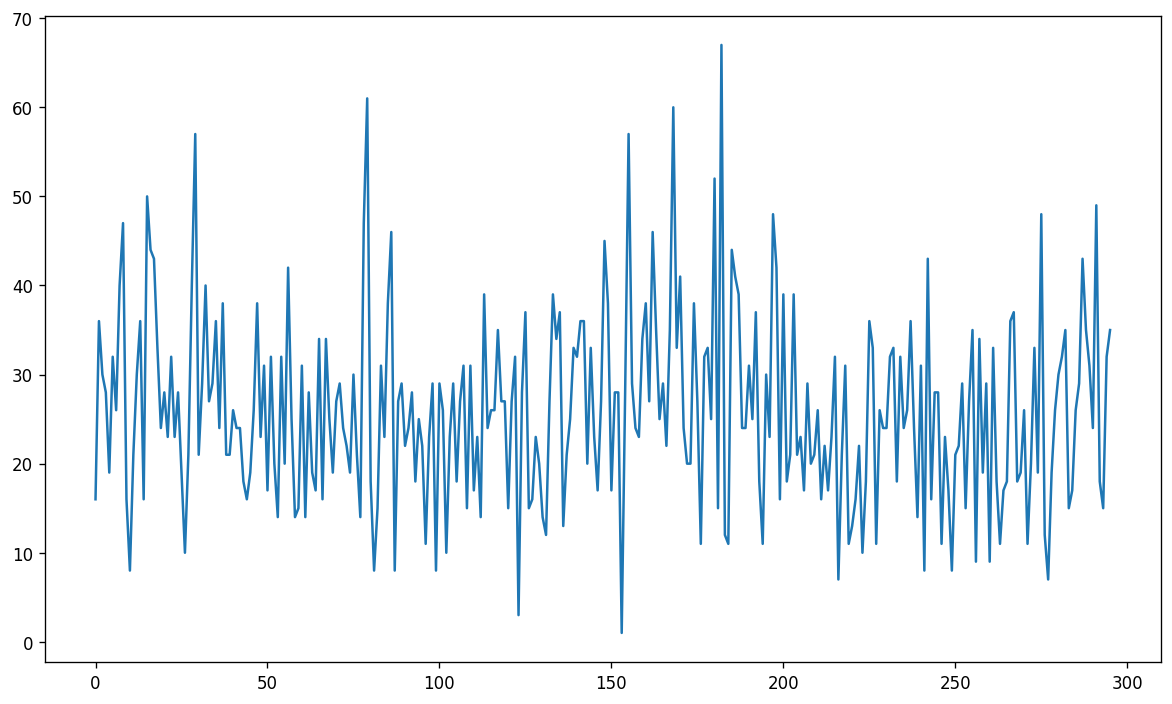

In [ ]:
# Plot
df_tsf_restaurant.visitors.plot(figsize=(12, 7));

In [ ]:
# Fit auto_arima on train set
# Fit auto_arima on train set
# model = pm.auto_arima(train.visitors,
#                       start_p = 1,
#                       start_q = 1,
#                       max_p = 3,
#                       max_q = 3,
#                       m = 7,
#                       start_P = 0,
#                       seasonal = True,
#                       d = None,
#                       D = 1,
#                       trace = True,
#                       error_action ='ignore',
#                       suppress_warnings = True,
#                       stepwise = True,
#                       max_D=2,
#                       max_order=5)

model = pm.auto_arima(train.visitors,
                      start_p = 1,
                      start_q = 1,
                      max_p = 5,
                      max_q = 3,
                      seasonal = True,
                      m = 7,
                      d = 1,
                      # max_d = 3,
                      trace = True,
                      error_action ='ignore',
                      suppress_warnings = True,
                      start_P = 1,
                      start_Q = 1,
                      max_P = 3,
                      max_Q = 2,
                      D = 1,  # Force Seasonal Differencing
                      max_order = 7,
                      stepwise = True)

# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1840.315, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1755.566, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1793.228, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1735.826, Time=0.20 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=1724.768, Time=0.32 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=5.31 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=2.60 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=1767.519, Time=0.71 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=1685.273, Time=1.30 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=1698.100, Time=0.73 sec
 ARIMA(2,1,0)(3,1,1)[7]             : AIC=inf, Time=3.17 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.56 sec
 ARIMA(3,1,0)(3,1,0)[7]             : AIC=1677.630, Time=0.51 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  215
Model:             SARIMAX(4, 1, 1)x(3, 1, [], 7)   Log Likelihood                -808.451
Date:                            Sat, 19 Oct 2024   AIC                           1634.902
Time:                                    06:30:00   BIC                           1664.897
Sample:                                         0   HQIC                          1647.032
                                            - 215                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0313      0.076     -0.411      0.681      -0.181       0.118
ar.L2         -0.1681      0.076     -2.213      0.027      -0.317      -0.019
ar.L3          0.0201      0.076      0.264      0.792      -0.129       0.169
ar.L4         -0.0894      0.072     -1.233      0.218      -0.231       0.053
ma.L1         -0.9520      0.037    -25.622      0.000      -1.025      -0.879
ar.S.L7       -0.6566      0.063    -10.443      0.000      -0.780      -0.533
ar.S.L14      -0.4558      0.079     -5.745      0.000      -0.611      -0.300
ar.S.L21      -0.2362      0.076     -3.103      0.002      -0.385      -0.087
sigma2       138.8395     13.540     10.254      0.000     112.302     165.377
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.82
Prob(Q):                              0.88   Prob(JB):                         0.40
Heteroskedasticity (H):               1.54   Skew:                             0.16
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predict

In [ ]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
predictions = predictions.map(lambda x: x if x >= 0 else 0)

actuals = test['visitors'].reset_index(drop = True)

#### Evaluate

In [ ]:
# Evaluation Metric
print("\n MAE : \n ",  mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n",  mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  12.387158108989013

 RMSLE : 
 0.8098352485844049

 MAPE : 
 133.51123745046826


#### Plot

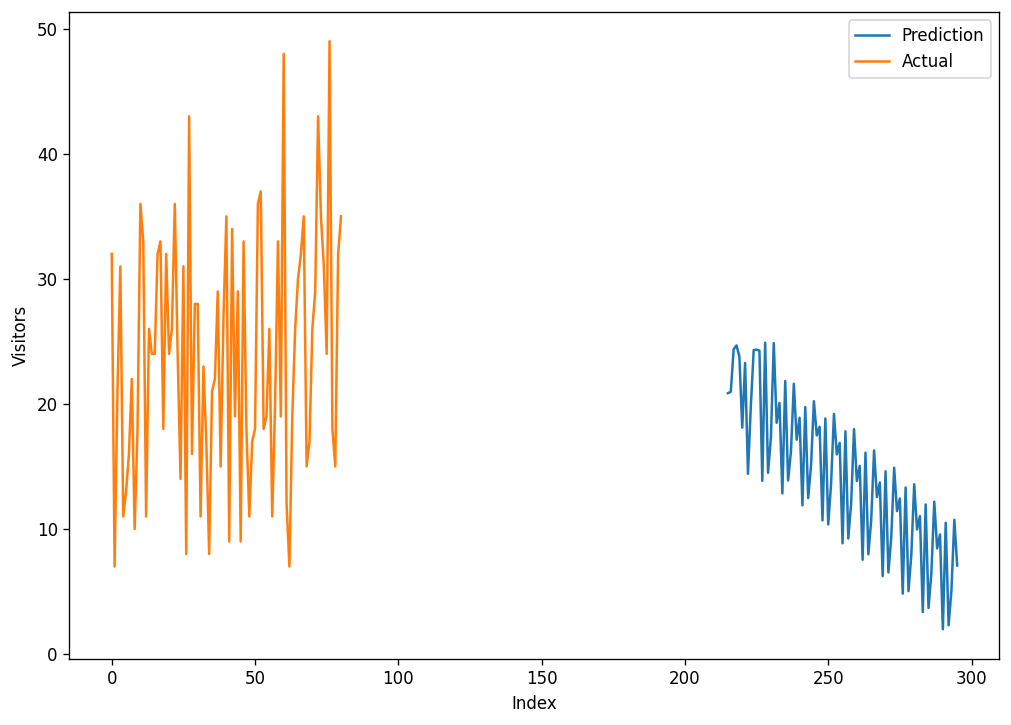

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7))
actuals.plot(legend = True, label = "Actual");

### **Forecast and Evaluate for Multiple Restaurants**

air_ba937bf13d40fb24
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=2432.997, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2641.184, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2578.772, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2434.904, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2639.186, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=2436.504, Time=0.47 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=2436.958, Time=0.43 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=2436.791, Time=1.01 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=2434.296, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=2436.478, Time=0.24 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=2433.635, Time=0.78 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=2435.079, Time=0.66 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=2435.619, Time=6.17 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2431.559, Time=0.74 sec
 ARIMA(0,1,1

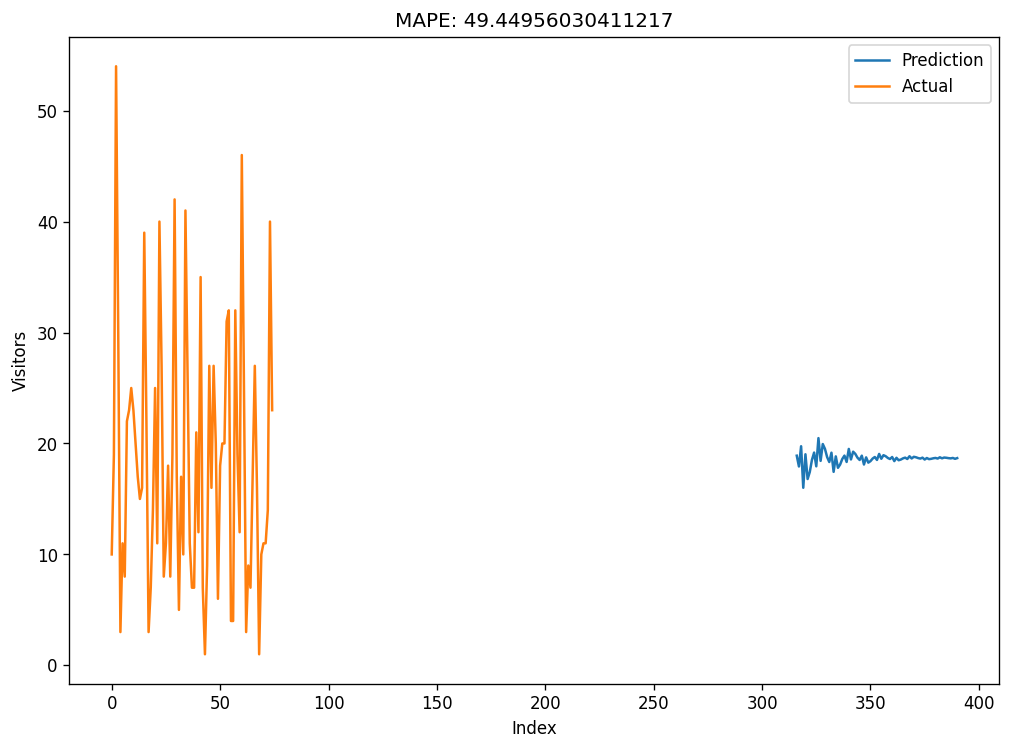

air_25e9888d30b386df
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=1811.496, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1987.847, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1910.657, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1807.963, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1985.851, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1807.510, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1807.758, Time=0.28 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1809.559, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1809.353, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=1809.349, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1909.079, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1809.175, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=1809.842, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7] intercept
Total fit time: 2.909 seconds



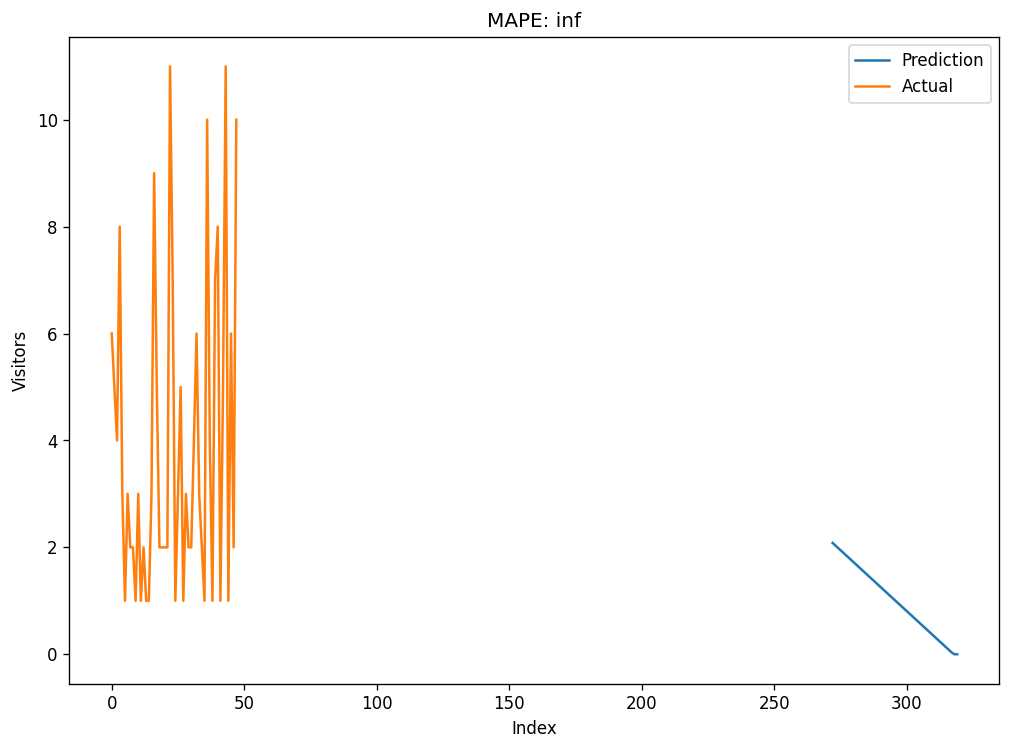

air_8e4360a64dbd4c50
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1702.245, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1673.754, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1700.263, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1688.693, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1672.227, Time=0.37 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=1694.906, Time=0.62 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=1644.193, Time=1.68 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=1647.247, Time=0.50 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=

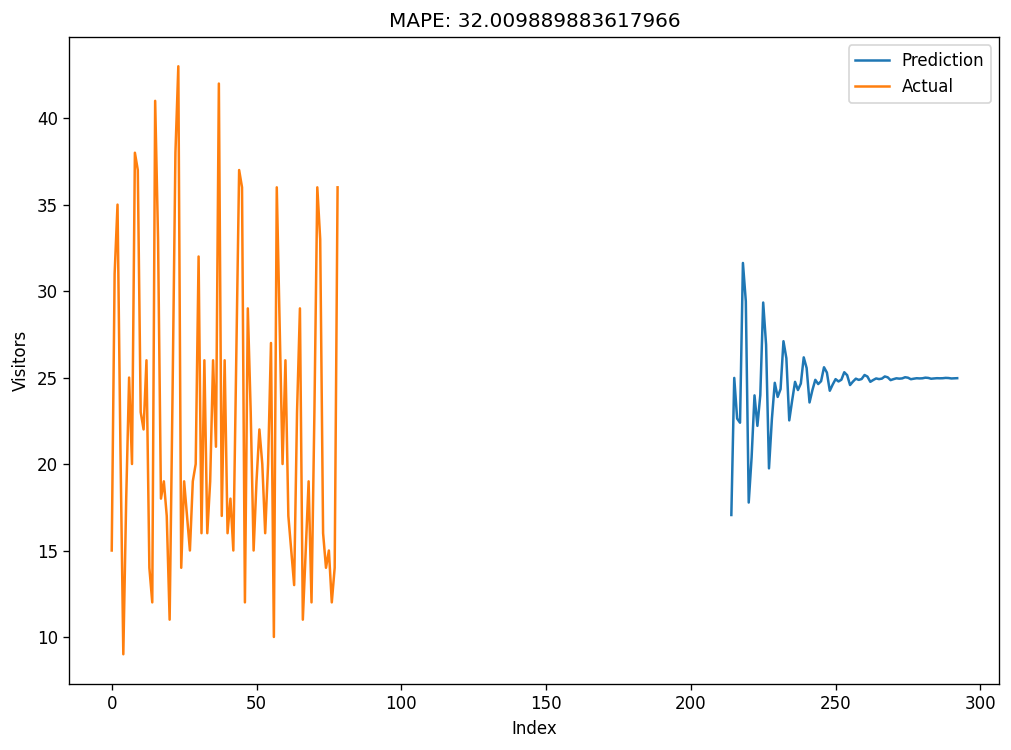

air_35512c42db0868da
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=2078.628, Time=3.69 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2283.460, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2197.825, Time=0.87 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2077.701, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2281.463, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2076.989, Time=0.16 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2077.395, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2076.643, Time=0.63 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=2076.582, Time=1.01 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=2074.917, Time=0.74 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=2286.085, Time=0.27 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=2076.909, Time=0.60 sec
 ARIMA(0,1,2)(2,0,0)[7] intercept   : AIC=2076.909, Time=0.70 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=2196.255, Time=0.46 sec
 ARIMA(1,1,2

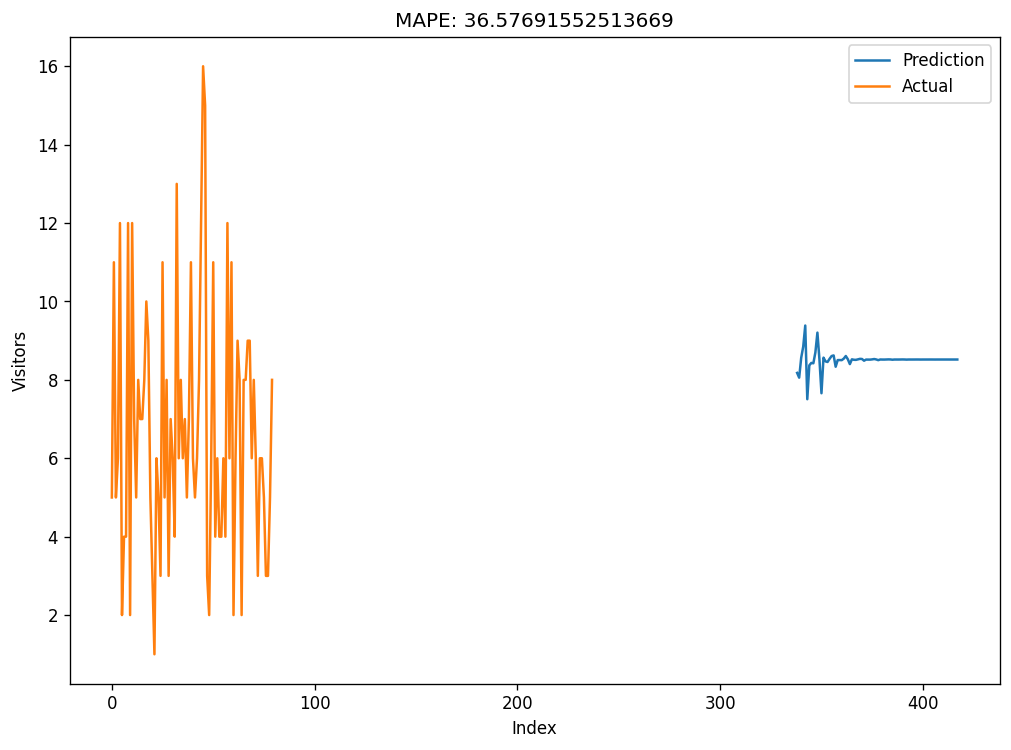

air_a271c9ba19e81d17
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=1637.341, Time=2.60 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1635.470, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1635.454, Time=1.94 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1635.418, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2057.413, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=1637.154, Time=0.20 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=1637.414, Time=1.36 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=1637.414, Time=1.12 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=1635.436, Time=1.25 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=1639.413, Time=0.68 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=1633.530, Time=0.12 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=1635.513, Time=0.47 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=1635.517, Time=0.27 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=1633.525, Time=0.24 sec
 ARIMA(0,0,0

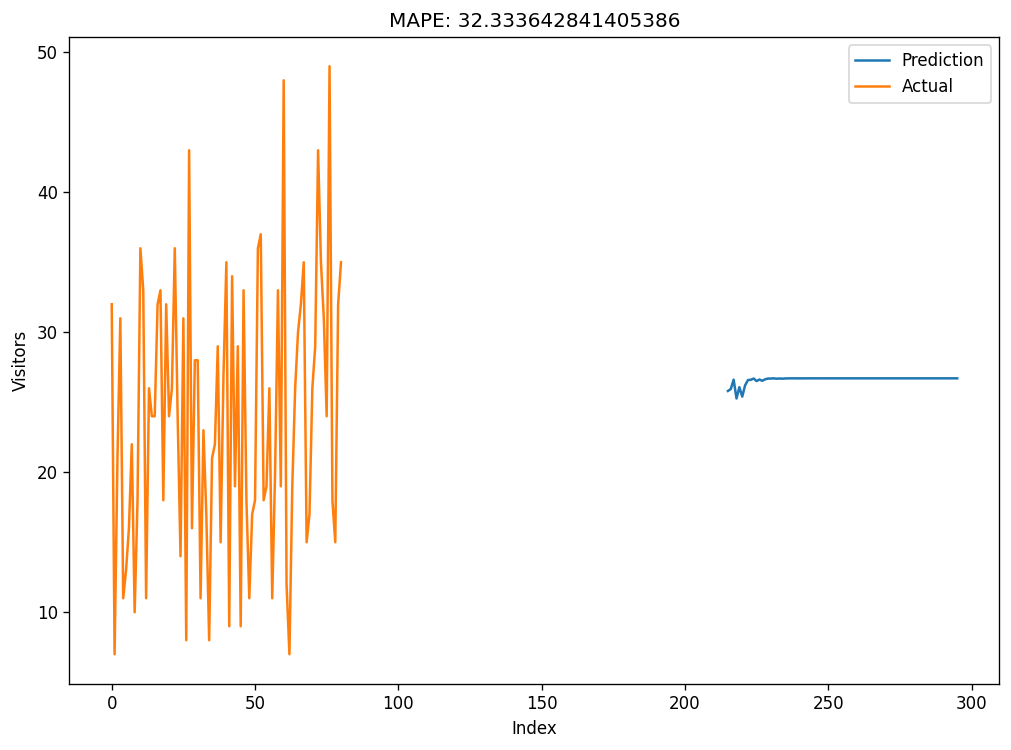

air_fd6aac1043520e83
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2585.524, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2588.914, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2588.754, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3122.338, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=2587.378, Time=0.27 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=2587.370, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=2589.374, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2587.020, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2586.850, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2586.773, Time=0.31 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 3.338 seconds

 MAPE : 
 37.363359638429664

 MAE : 
  12.173030471943518

 RMSLE : 
 0.5497368873447996


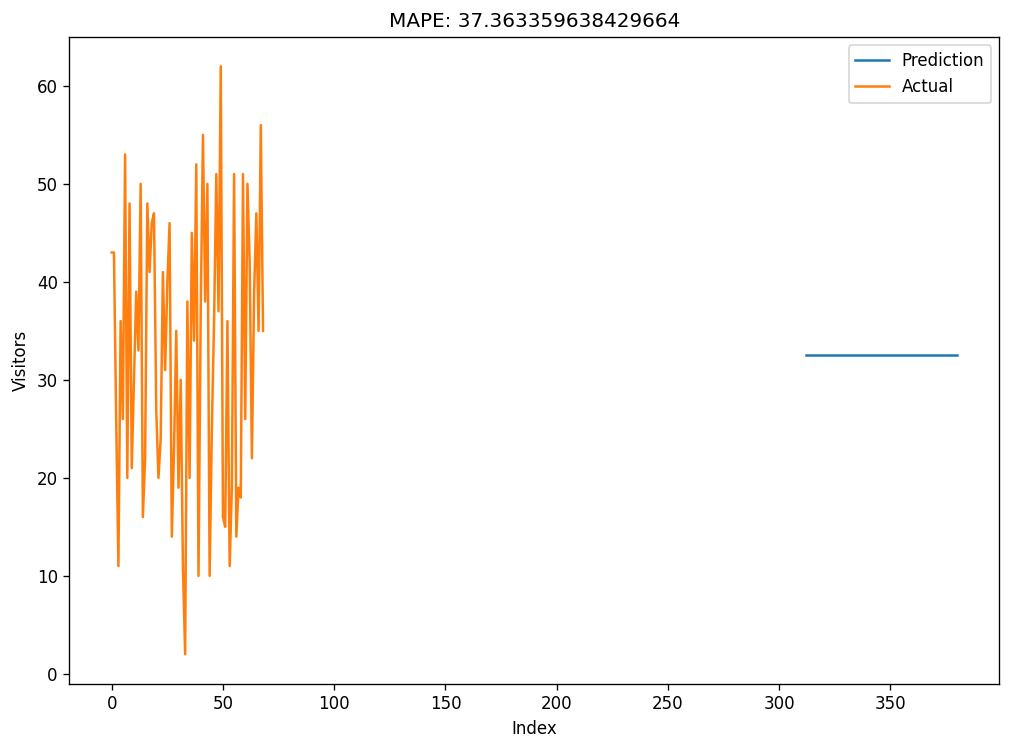

air_64d4491ad8cdb1c6
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=2477.710, Time=1.62 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2477.253, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2480.779, Time=1.32 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2480.730, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2948.290, Time=0.04 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=2479.060, Time=0.64 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=2479.027, Time=0.76 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=2480.637, Time=1.85 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2478.899, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2478.868, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2480.478, Time=0.38 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 8.448 seconds

 MAPE : 
 40.4660352966525

 MAE : 
  6.377257292792097

 RMSLE : 
 0.6100815906535431


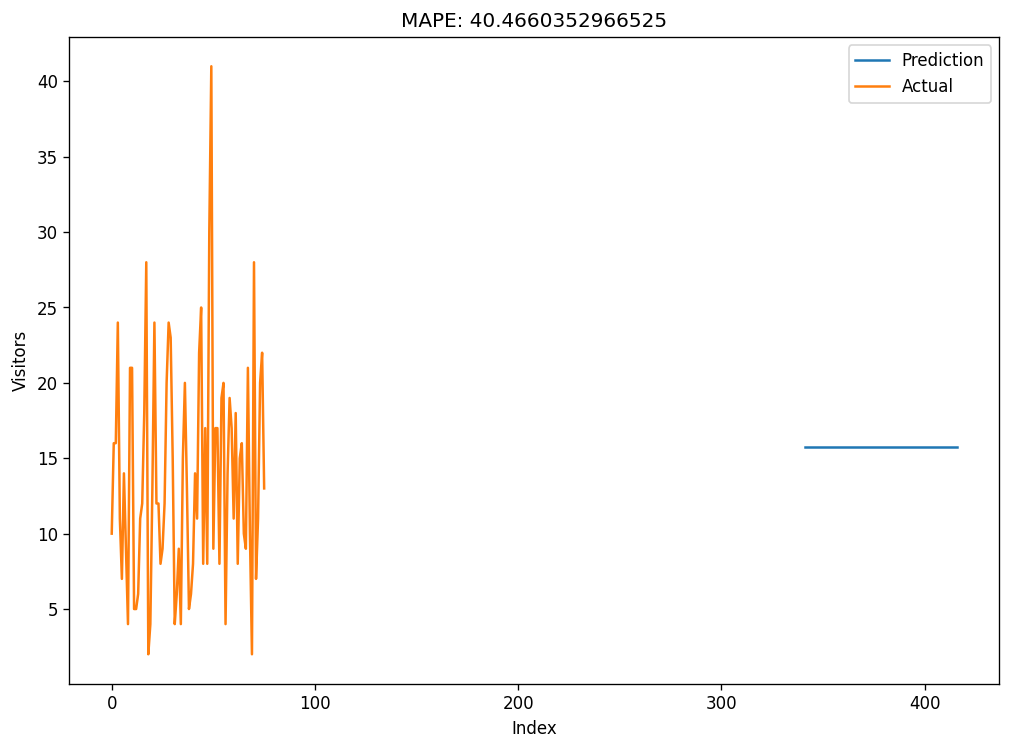

air_f3f9824b7d70c3cf
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1625.123, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1594.275, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1605.230, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1918.860, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1622.460, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=1574.942, Time=0.59 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=1559.727, Time=1.46 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1554.342, Time=0.75 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1605.720, Time=0.21 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=1551.553, Time=1.21 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=1593.752, Time=0.45 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=1550.981, Time=1.51 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=1549.284, Time=3.00 sec
 ARIMA(0,0,0)(1,0

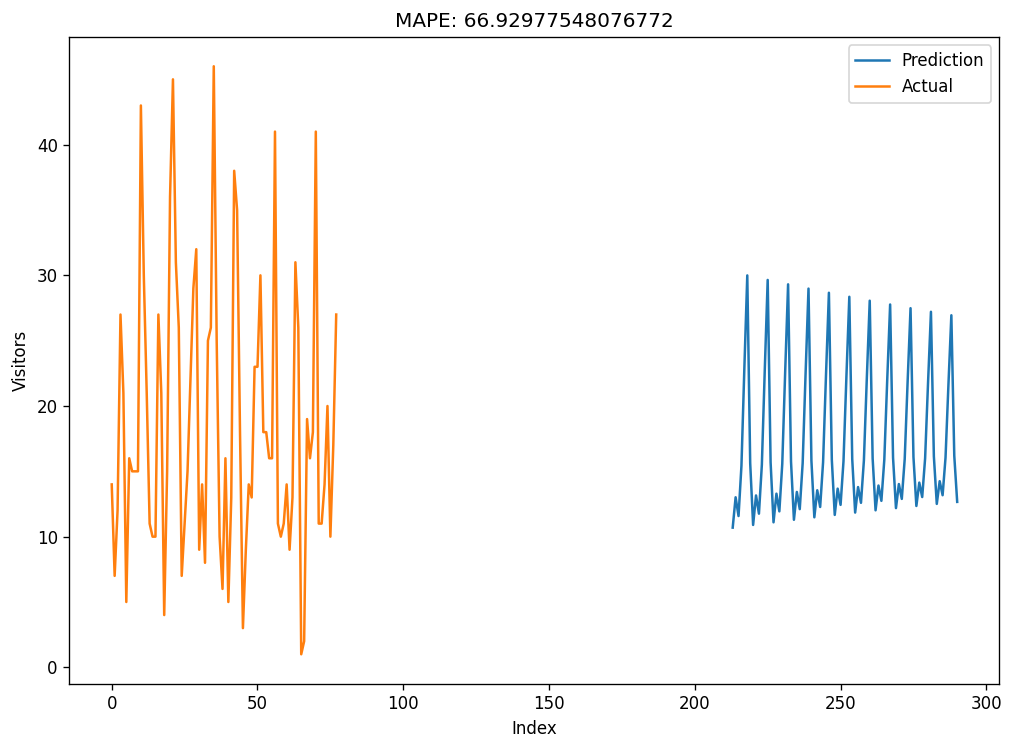

air_820d1919cbecaa0a
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=1423.052, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1422.786, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1422.475, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1423.065, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2013.402, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1424.457, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=1423.387, Time=0.98 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1425.053, Time=0.69 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1423.042, Time=0.26 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=1483.757, Time=1.44 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=1420.557, Time=0.19 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=1421.463, Time=1.39 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=1421.876, Time=1.59 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=1421.150, Time=0.55 sec
 ARIMA(0,0,0

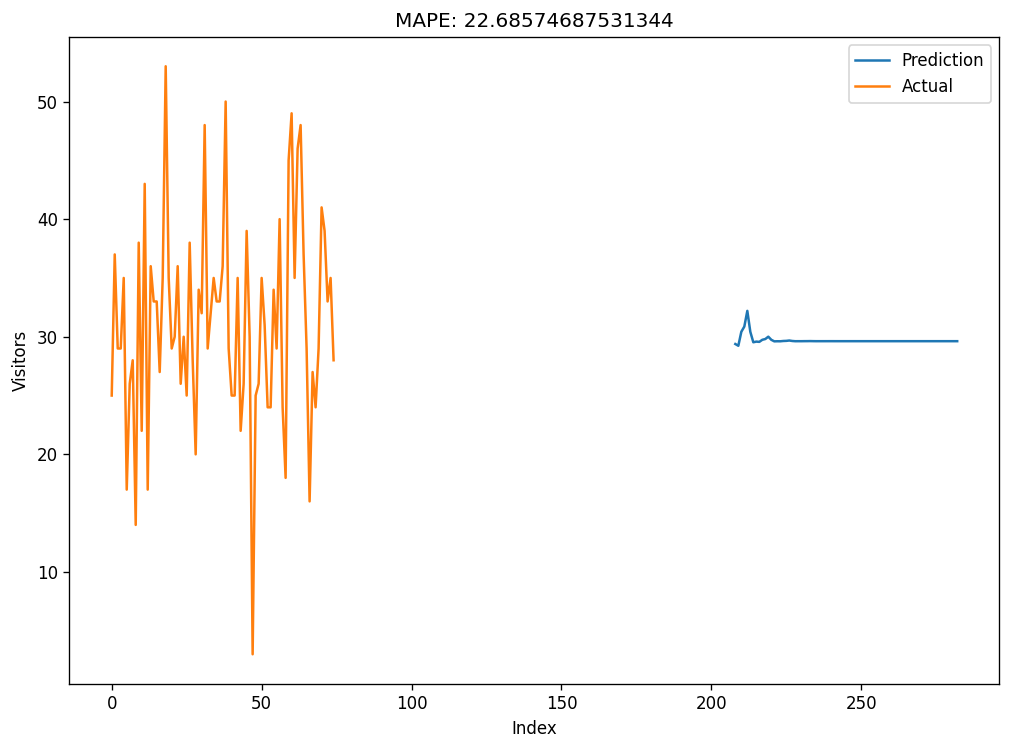

air_9ae7081cb77dc51e
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1581.095, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1499.986, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1523.837, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1919.812, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1577.648, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=1497.221, Time=0.80 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=1484.852, Time=1.37 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1486.148, Time=0.70 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=1482.815, Time=1.27 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=1512.849, Time=0.46 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1525.107, Time=0.17 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=1481.355, Time=3.53 sec
 ARIMA(0,0,0)(0,0,2)[7

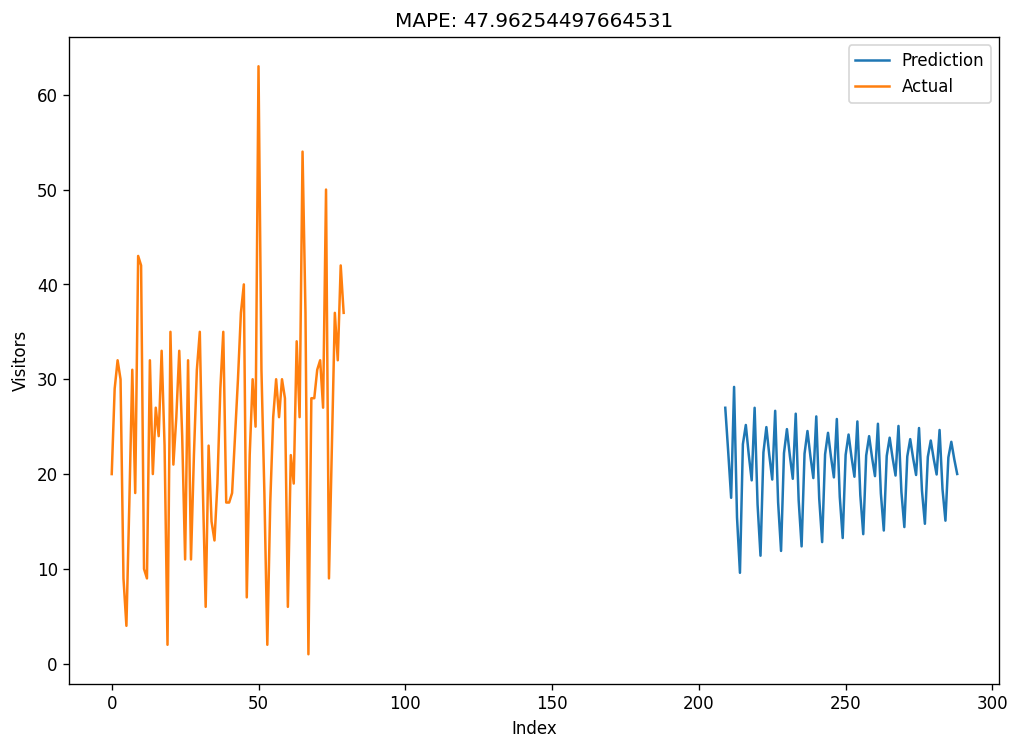

air_d69b08a175bc0387
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1072.507, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1053.672, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1070.509, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1053.042, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1053.518, Time=0.13 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1055.502, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=1023.165, Time=0.09 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=1025.038, Time=0.15 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=1025.039, Time=0.13 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=1027.038, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[7] intercept   : AIC=1018.168, Time=0.14 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=1019.910, Time=0.32 sec
 ARIMA(3,1,0)(0,0,1)[7

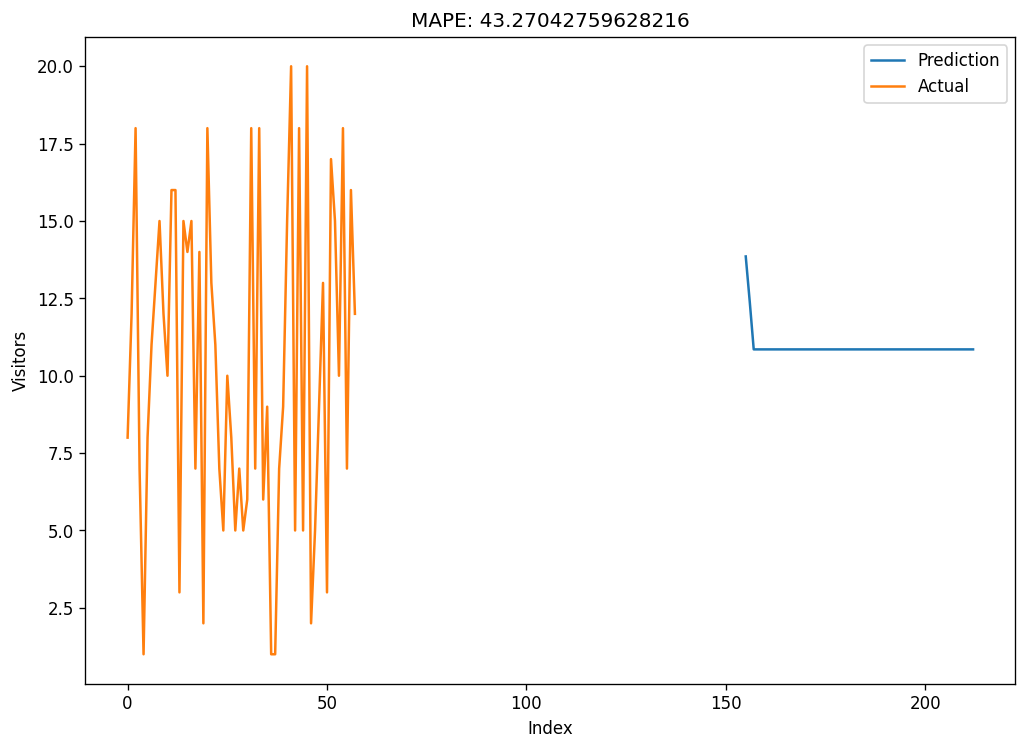

air_ee3a01f0c71a769f
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2837.891, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2834.083, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2835.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2832.088, Time=0.12 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=2834.077, Time=0.34 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=2830.402, Time=0.43 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=2808.035, Time=0.59 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=2808.612, Time=0.57 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=2793.148, Time=3.24 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=2817.297, Time=2.61 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=2814.963, Time=1.44 sec
 ARIMA(2,1,0)(2,0,2)[7] intercept   : AIC=2769.833, Time=1.84 sec
 ARIMA(2,1,0)(1,0,2)[7

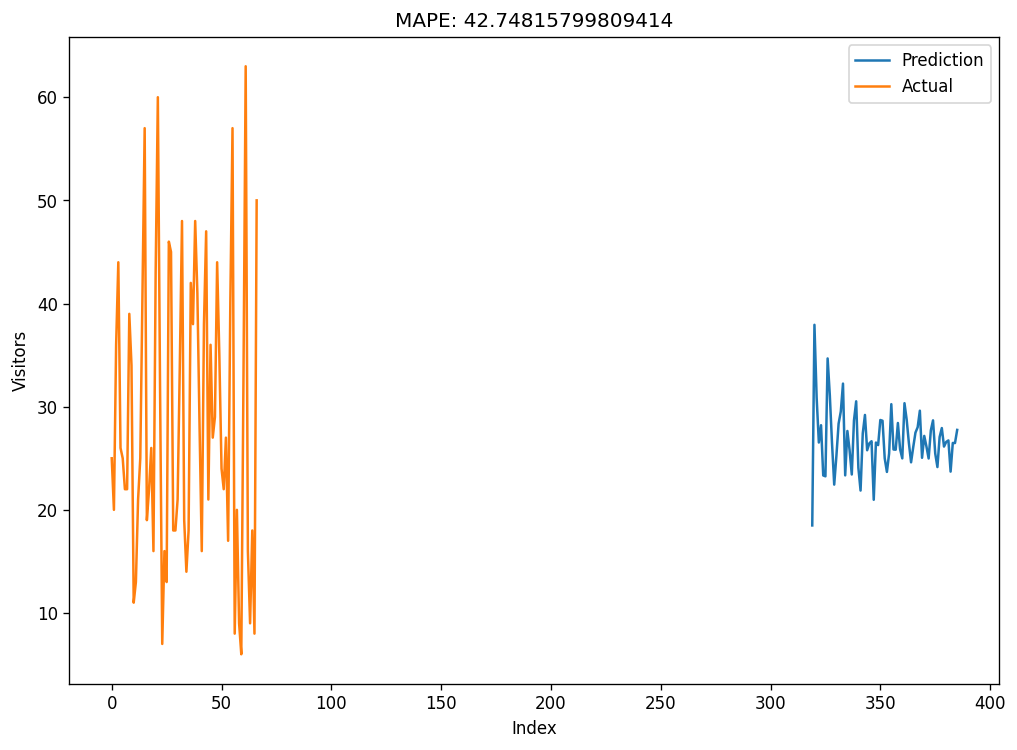

In [ ]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
mapes, rmsles, maes = [], [], []

for i in range(12):
    print("==============================================")
    print(air_store_id[i]);
    df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[i], :]

    # Get the train dataset, we will use the data till end of Jan 2017 for training
    train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
    train = df_tsf_restaurant[train_selector]

    test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
    test = df_tsf_restaurant[test_selector]

    # Fit auto_arima on train set
    model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1,
                            max_p = 3, max_q = 3, m = 7,
                            seasonal = True,
                            d = None, trace = True,
                            error_action ='ignore',
                            suppress_warnings = True,
                            stepwise = True)

    # To print the summary
    model.summary()


    # Get prediction for test duration
    predictions = pd.Series(model.predict(len(test)))
    predictions = predictions.map(lambda x: x if x >= 0 else 0)

    actuals = test['visitors'].reset_index(drop = True)

    # Evaluation Metric
    mape  = mean_absolute_percentage_error(predictions, actuals)
    rmsle = RMSLE(predictions, actuals)
    mae = mean_absolute_error(predictions, actuals)

    print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))
    print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
    print("\n RMSLE : \n", RMSLE(predictions, actuals))

    mapes.append(round(mape, 2))
    rmsles.append(rmsle)
    maes.append(mae)

    # plot predictions and actual values
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7))
    actuals.plot(legend = True, label = "Actual");
    plt.title(f"MAPE: {mape}")
    plt.show()

**Replace Infinite with NaN values, to calculate mean**

In [ ]:
mapes_clean = pd.Series(mapes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
maes_clean = pd.Series(maes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
rmsles_clean = pd.Series(rmsles).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)

Calculate mean

In [ ]:
print("MAPES : ", np.nanmean(mapes_clean).round(2), mapes_clean)
print("MAES  : ", np.nanmean(maes_clean).round(2), maes_clean)
print("RMSLES: ", np.nanmean(rmsles_clean).round(2), rmsles_clean)

MAPES :  41.07 [49.45   nan 32.01 36.58 32.33 37.36 40.47 66.93 22.69 47.96 43.27 42.75]
MAES  :  7.75 [ 9.2   2.97  7.92  3.11  8.6  12.17  6.38 10.4   6.73  9.4   4.72 11.42]
RMSLES:  0.6 [0.74 1.05 0.41 0.53 0.48 0.55 0.61 0.74 0.35 0.58 0.64 0.52]


## **15. Build Auto ARIMA - SARIMAX model**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>15. Build Auto ARIMA - SARIMAX model</h2>
</div>

- Seasonality = 7 days in a week

We will use 'Holiday Flag' as the external regressor here, but practically it can be any of the X variables.

### **Types of External Regressors**

1. Time Based
2. Demographics: People and Location based
3. Qualitative / Rating based
4. Promotions
5. Series Decomposition
6. Macroeconomic Data


In [ ]:
train.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                            air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg     Todofuken           city        street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                                         area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
3592    past  air_ee3a01f0c71a769f_2016-01-04  air_ee3a01f0c71a769f  2016-01-04        61      Monday            0        0            0                    0                     1          1        0  2016      1            4             31             1         False    Cafe/Sweets  Shizuoka-ken Hamamatsu-shi Motoshirochō     34.710895      137.72594          NaN            NaN           NaN           NaN            NaN  Shizuoka-ken  Hamamatsu-shi  Motoshirochō                    13                  13                       18                    1.0               2.0   15.000000          11.0     4.000000  Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...  air_ee3a01f0c71a769f_0  air_ee3a01f0c71a769f_0_0      20.789474             18.0           6.0          61.0
3593    past  air_ee3a01f0c71a769f_2016-01-05  air_ee3a01f0c71a769f  2016-01-05        25     Tuesday            0        0            0                    0                     0          1        1  2016      1            5             31             1         False    Cafe/Sweets  Shizuoka-ken Hamamatsu-shi Motoshirochō     34.710895      137.72594          NaN            NaN           NaN           NaN            NaN  Shizuoka-ken  Hamamatsu-shi  Motoshirochō                    13                  13                       18                    NaN               NaN         NaN           NaN          NaN  Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...  air_ee3a01f0c71a769f_1  air_ee3a01f0c71a769f_1_0      16.750000             17.0           4.0          41.0
3594    past  air_ee3a01f0c71a769f_2016-01-06  air_ee3a01f0c71a769f  2016-01-06        18   Wednesday            0        0            0                    0                     0          1        2  2016      1            6             31             1         False    Cafe/Sweets  Shizuoka-ken Hamamatsu-shi Motoshirochō     34.710895      137.72594          NaN            NaN           NaN           NaN            NaN  Shizuoka-ken  Hamamatsu-shi  Motoshirochō                    13                  13                       18                    NaN               NaN         NaN           NaN          NaN  Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...  air_ee3a01f0c71a769f_2  air_ee3a01f0c71a769f_2_0      18.084746             18.0           4.0          39.0
3595    past  air_ee3a01f0c71a769f_2016-01-08  air_ee3a01f0c71a769f  2016-01-08        21      Friday            0        0            0                    1                     0          1        4  2016      1            8             31             1         False    Cafe/Sweets  Shizuoka-ken Hamamatsu-shi Motoshirochō     34.710895      137.72594          NaN            NaN           NaN           NaN            NaN  Shizuoka-ken  Hamamatsu-shi  Motoshirochō                    13                  13                       18                    1.0               3.0   19.000000          14.0    53.000000  Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...  air_ee3a01f0c71a769f_4  air_ee3a01f0c71a769f_4_0      16.280702             16.0           4.0          38.0
3596    past  air_ee3a01f0c71a769f_2016-01-09  air_ee3a01f0c71a769f  2016-01-09        57    Saturday            0        1  

In [ ]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors,
                      start_p = 1,
                      start_q = 1,
                      max_p = 3,
                      max_q = 3,
                      m = 7,
                      start_P = 0,
                      seasonal = True,
                      d = None,
                      max_D = 1,
                      trace = True,
                      error_action ='ignore',
                      suppress_warnings = True,
                      stepwise = True,
                      max_order=7,
                      X=train.loc[:, 'holiday_flg'].values.reshape(-1, 1))


# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2813.445, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2811.986, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2811.471, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=2815.161, Time=0.82 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=2814.910, Time=1.06 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=2810.125, Time=2.16 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=2798.768, Time=2.17 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=2800.352, Time=0.73 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=2783.850, Time=0.80 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=2803.889, Time=0.61 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=2765.560, Time=1.79 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=2793.808, Time=1.35 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  319
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -1294.963
Date:                                Sat, 19 Oct 2024   AIC                           2609.926
Time:                                        06:35:27   BIC                           2647.547
Sample:                                             0   HQIC                          2624.952
                                                - 319                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0378      0.065     -0.584      0.559      -0.165       0.089
x1            23.5474      3.300      7.135      0.000      17.079      30.016
ar.L1          0.2222      0.056      3.983      0.000       0.113       0.332
ar.L2         -0.3112      0.064     -4.860      0.000      -0.437      -0.186
ma.L1         -0.9520      0.022    -43.376      0.000      -0.995      -0.909
ar.S.L7        0.4024      0.028     14.196      0.000       0.347       0.458
ar.S.L14      -0.9693      0.024    -39.815      0.000      -1.017      -0.922
ma.S.L7       -0.3723      0.052     -7.116      0.000      -0.475      -0.270
ma.S.L14       0.8647      0.060     14.397      0.000       0.747       0.982
sigma2       189.6887     17.199     11.029      0.000     155.979     223.398
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 5.94
Prob(Q):                              0.52   Prob(JB):                         0.05
Heteroskedasticity (H):               0.71   Skew:                             0.24
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Get prediction for test duration
predictions = pd.Series(model.predict(n_periods=len(test),
                                      X=test.loc[:, 'holiday_flg'].values.reshape(-1, 1)))

actuals = test['visitors'].reset_index(drop = True)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  12.029514028732056

 RMSLE : 
 0.5592985180762575

 MAPE : 
 54.39227683792232


<Axes: xlabel='Index', ylabel='Visitors'>

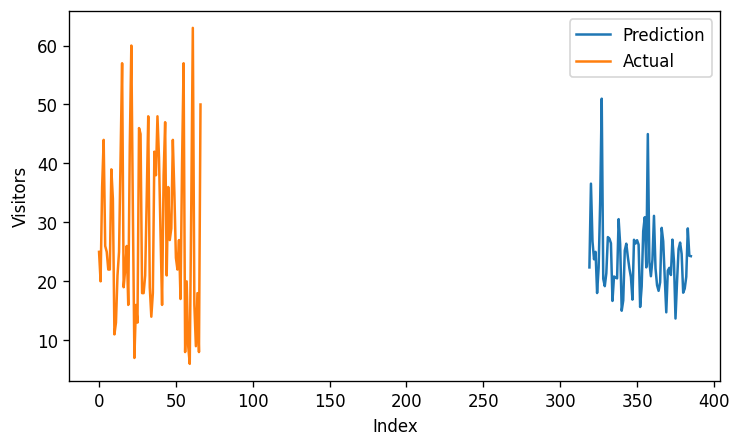

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors")
actuals.plot(legend = True, label = "Actual")

### Include multiple external regressors

In [ ]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors,
                      start_p = 1,
                      start_q = 1,
                      max_p = 3,
                      max_q = 3,
                      m = 7,
                      start_P = 0,
                      seasonal = True,
                      d = None,
                      max_D = 1,
                      trace = True,
                      error_action ='ignore',
                      suppress_warnings = True,
                      stepwise = True,
                      max_order=7,
                      X=train.loc[:, ['holiday_flg',
                                      'tomorrow_is_holiday',
                                      'yesterday_is_holiday']].values)


# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2805.729, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2789.610, Time=1.22 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2803.752, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2789.038, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=2788.776, Time=1.08 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=2786.652, Time=1.35 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=2776.777, Time=2.14 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=2778.467, Time=3.72 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=2757.552, Time=5.00 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=2782.906, Time=2.39 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=2767.864, Time=2.77 sec
 ARIMA(2,1,0)(2,0,2)[7] intercept   : AIC=2697.836, Time=7.44 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  319
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1271.355
Date:                Sat, 19 Oct 2024   AIC                           2560.711
Time:                        06:38:17   BIC                           2594.569
Sample:                             0   HQIC                          2574.234
                                - 319                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            22.9167      2.483      9.229      0.000      18.050      27.784
x2            -4.7952      2.171     -2.209      0.027      -9.050      -0.540
x3             3.0152      2.486      1.213      0.225      -1.857       7.887
ar.L1          0.8917      0.020     44.057      0.000       0.852       0.931
ar.L2         -0.9626      0.020    -48.173      0.000      -1.002      -0.923
ma.L1         -1.7158      0.059    -29.103      0.000      -1.831      -1.600
ma.L2          1.4767      0.095     15.512      0.000       1.290       1.663
ma.L3         -0.7062      0.055    -12.858      0.000      -0.814      -0.599
sigma2       171.6972     14.499     11.842      0.000     143.279     200.115
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.53   Prob(JB):                         0.41
Heteroskedasticity (H):               0.71   Skew:                             0.18
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Get prediction for test duration
predictions = pd.Series(model.predict(n_periods=len(test),
                                      X=test.loc[:, ['holiday_flg',
                                                     'tomorrow_is_holiday',
                                                     'yesterday_is_holiday']].values))

actuals = test['visitors'].reset_index(drop = True)

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  10.200820312964767

 RMSLE : 
 0.49070028110099845

 MAPE : 
 43.6591004892253


<Axes: xlabel='Index', ylabel='Visitors'>

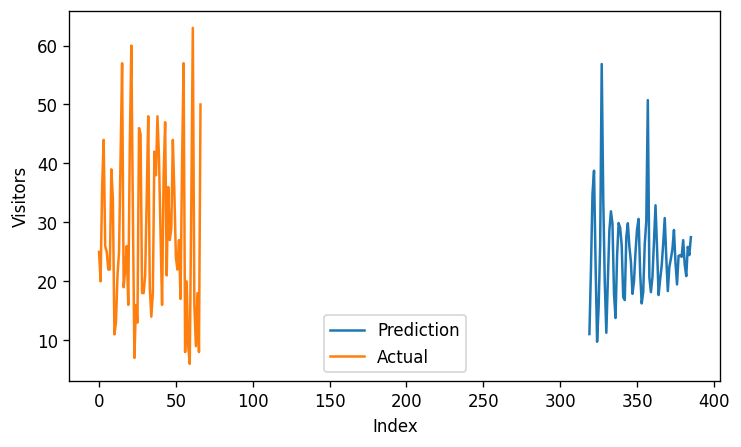

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors")
actuals.plot(legend = True, label = "Actual")

### Prediction at restaurant level

In [ ]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

visit_date   visitors
0  2017-02-01  11.053153
1  2017-02-03  22.077210
2  2017-02-04  34.823551
3  2017-02-05  38.772637
4  2017-02-06  23.059606

In [ ]:
# Merge the prediction df and store_visitor df
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(1541, 4)

In [ ]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

visit_date   visitors          air_store_id  restaurant_share
0   2017-02-01  11.053153  air_08f994758a1e76d4          0.050737
1   2017-02-01  11.053153  air_1653a6c513865af3          0.093262
2   2017-02-01  11.053153  air_2aab19554f91ff82          0.089099
3   2017-02-01  11.053153  air_2bffb19a24d11729          0.033610
4   2017-02-01  11.053153  air_2fc478dc9f0a6b31          0.019667
5   2017-02-01  11.053153  air_396166d47733d5c9          0.039690
6   2017-02-01  11.053153  air_3f91d592acd6cc0b          0.040856
7   2017-02-01  11.053153  air_42d41eb58cad170e          0.043095
8   2017-02-01  11.053153  air_52e2a1fd42bc917a          0.018333
9   2017-02-01  11.053153  air_5e70fe82f9e4fab6          0.038376
10  2017-02-01  11.053153  air_627cabe2fe53f33f          0.023924
11  2017-02-01  11.053153  air_6c952e3c6e590945          0.046279
12  2017-02-01  11.053153  air_8093d0b565e9dbdf          0.109350
13  2017-02-01  11.053153  air_98b54e32ccddd896          0.028147
14  2017-02-01  11.053153  air_a546cbf478a8b6e4          0.045562
15  2017-02-01  11.053153  air_a9133955abccf071          0.058908
16  2017-02-01  11.053153  air_b80fed1a07c817d2          0.007809
17  2017-02-01  11.053153  air_c2626f5f86d57342          0.035507
18  2017-02-01  11.053153  air_c73d319ffabf287a          0.045347
19  2017-02-01  11.053153  air_cf5ab75a0afb8af9          0.019124
20  2017-02-01  11.053153  air_dc71c6cc06cd1aa2          0.014881
21  2017-02-01  11.053153  air_dfad598ff642dab7          0.074955
22  2017-02-01  11.053153  air_f180301886c21375          0.023481
23  2017-02-03  22.077210  air_08f994758a1e76d4          0.050737
24  2017-02-03  22.077210  air_1653a6c513865af3          0.093262
25  2017-02-03  22.077210  air_2aab19554f91ff82          0.089099
26  2017-02-03  22.077210  air_2bffb19a24d11729          0.033610
27  2017-02-03  22.077210  air_2fc478dc9f0a6b31          0.019667
28  2017-02-03  22.077210  air_396166d47733d5c9          0.039690
29  2017-02-03  22.077210  air_3f91d592acd6cc0b          0.040856
30  2017-02-03  22.077210  air_42d41eb58cad170e          0.043095
31  2017-02-03  22.077210  air_52e2a1fd42bc917a          0.018333
32  2017-02-03  22.077210  air_5e70fe82f9e4fab6          0.038376
33  2017-02-03  22.077210  air_627cabe2fe53f33f          0.023924
34  2017-02-03  22.077210  air_6c952e3c6e590945          0.046279
35  2017-02-03  22.077210  air_8093d0b565e9dbdf          0.109350
36  2017-02-03  22.077210  air_98b54e32ccddd896          0.028147
37  2017-02-03  22.077210  air_a546cbf478a8b6e4          0.045562
38  2017-02-03  22.077210  air_a9133955abccf071          0.058908
39  2017-02-03  22.077210  air_b80fed1a07c817d2          0.007809
40  2017-02-03  22.077210  air_c2626f5f86d57342          0.035507
41  2017-02-03  22.077210  air_c73d319ffabf287a          0.045347
42  2017-02-03  22.077210  air_cf5ab75a0afb8af9          0.019124
43  2017-02-03  22.077210  air_dc71c6cc06cd1aa2          0.014881
44  2017-02-03  22.077210  air_dfad598ff642dab7          0.074955
45  2017-02-03  22.077210  air_f180301886c21375          0.023481
46  2017-02-04  34.823551  air_08f994758a1e76d4          0.050737
47  2017-02-04  34.823551  air_1653a6c513865af3          0.093262
48  2017-02-04  34.823551  air_2aab19554f91ff82          0.089099
49  2017-02-04  34.823551  air_2bffb19a24d11729          0.033610

In [ ]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

visit_date   visitors          air_store_id  restaurant_share  visitors_predicted
0  2017-02-01  11.053153  air_08f994758a1e76d4          0.050737            0.560800
1  2017-02-01  11.053153  air_1653a6c513865af3          0.093262            1.030838
2  2017-02-01  11.053153  air_2aab19554f91ff82          0.089099            0.984827
3  2017-02-01  11.053153  air_2bffb19a24d11729          0.033610            0.371496
4  2017-02-01  11.053153  air_2fc478dc9f0a6b31          0.019667            0.217385

In [ ]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('visitors', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()

visit_date          air_store_id  restaurant_share  visitors_predicted  visitors
0  2017-02-01  air_08f994758a1e76d4          0.050737            0.560800        34
1  2017-02-01  air_1653a6c513865af3          0.093262            1.030838        19
2  2017-02-01  air_2aab19554f91ff82          0.089099            0.984827        64
3  2017-02-01  air_2bffb19a24d11729          0.033610            0.371496        18
4  2017-02-01  air_396166d47733d5c9          0.039690            0.438697         9

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n RMSLE : \n", RMSLE(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))


 MAE : 
  22.089756944069677

 RMSLE : 
 2.3504743679697198

 MAPE : 
 2544.955522296425


### **Forecast Multiple Restaurants using SARIMAX for each Restaurant**


air_ba937bf13d40fb24
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=2433.759, Time=5.30 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=2637.040, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=2573.001, Time=3.27 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=2429.860, Time=5.47 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=2635.042, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=2433.261, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=2431.843, Time=2.82 sec
 ARIMA(0,1,1)(0,0,2)[30] intercept   : AIC=2431.833, Time=15.11 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=2429.915, Time=2.26 sec
 ARIMA(0,1,1)(1,0,2)[30] intercept   : AIC=2433.716, Time=17.39 sec
 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=2636.620, Time=0.90 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=2431.773, Time=5.98 sec
 ARIMA(0,1,2)(0,0,1)[30] intercept   : AIC=2431.732, Time=4.00 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=2572.964, Time=1.93 

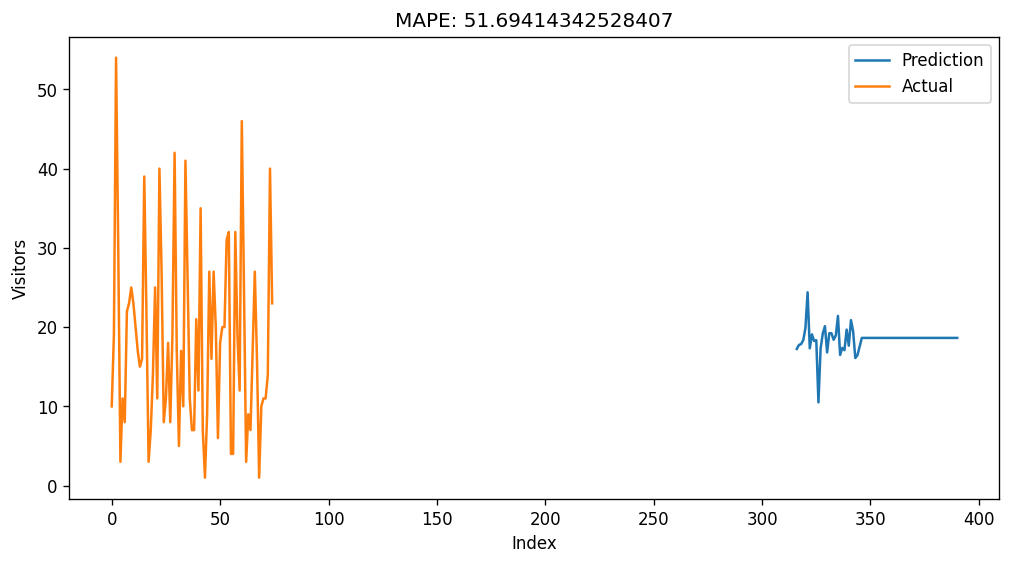

air_25e9888d30b386df
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=1815.106, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1988.396, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1913.013, Time=1.26 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=1811.366, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1986.400, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=1809.369, Time=0.21 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=1811.366, Time=1.59 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=1813.366, Time=6.36 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=1811.150, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=1811.145, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=1911.074, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=1811.079, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[30]             : AIC=1811.742, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[30] intercept
Total fit time: 1

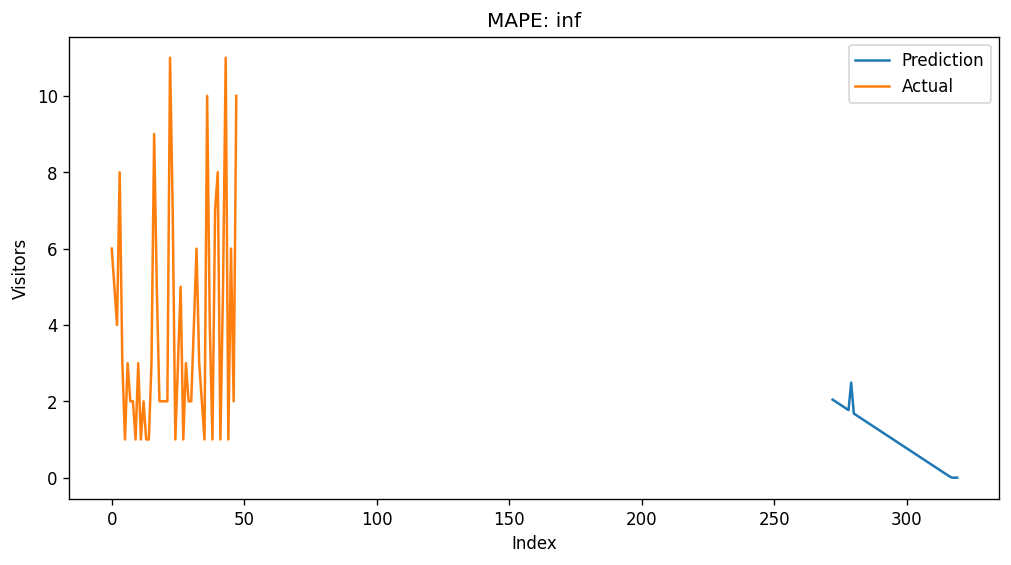

air_8e4360a64dbd4c50
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1693.488, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1680.366, Time=1.50 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1691.508, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=1679.056, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=1680.195, Time=2.74 sec
 ARIMA(1,1,0)(1,0,1)[30] intercept   : AIC=1681.193, Time=6.53 sec
 ARIMA(2,1,0)(0,0,0)[30] intercept   : AIC=1659.349, Time=1.64 sec
 ARIMA(2,1,0)(1,0,0)[30] intercept   : AIC=1661.267, Time=1.98 sec
 ARIMA(2,1,0)(0,0,1)[30] intercept   : AIC=1661.227, Time=1.55 sec
 ARIMA(2,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(3,1,0)(0,0,0)[30] intercept   : AIC=1647.674, Time=1.75 sec
 ARIMA(3,1,0)(1,0,0)[30] intercept   : AIC=1649.564, Time=4.02 sec
 ARIMA(3,1,0)

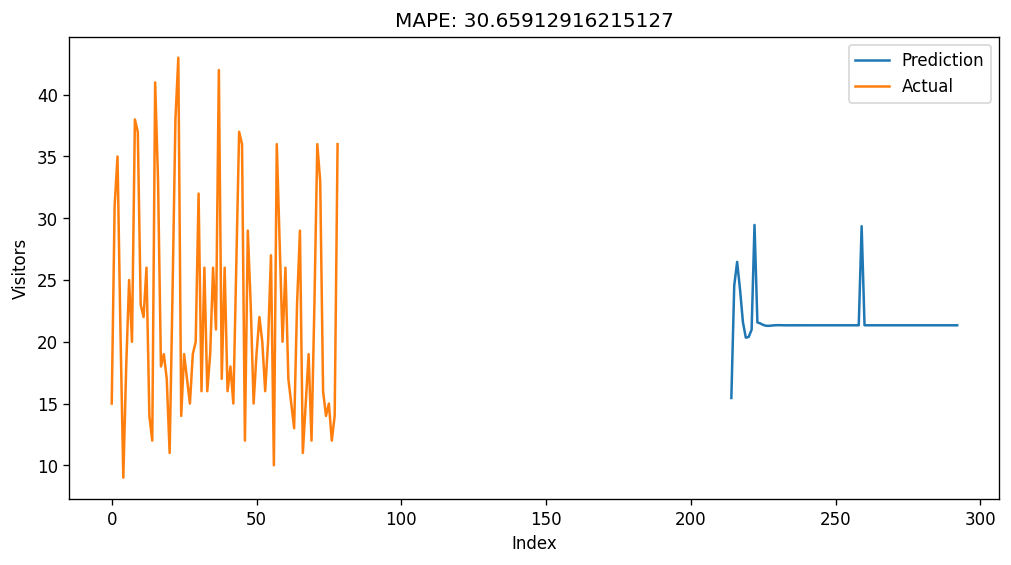

air_35512c42db0868da
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=2077.598, Time=8.78 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=2283.476, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=2190.788, Time=1.38 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=2073.719, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=2281.479, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=2074.374, Time=0.32 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=2075.702, Time=4.67 sec
 ARIMA(0,1,1)(0,0,2)[30] intercept   : AIC=2075.680, Time=13.44 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=2073.812, Time=3.82 sec
 ARIMA(0,1,1)(1,0,2)[30] intercept   : AIC=2077.442, Time=26.06 sec
 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=2278.121, Time=1.52 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=2075.614, Time=5.57 sec
 ARIMA(0,1,2)(0,0,1)[30] intercept   : AIC=2075.613, Time=3.69 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=2190.451, Time=1.18 

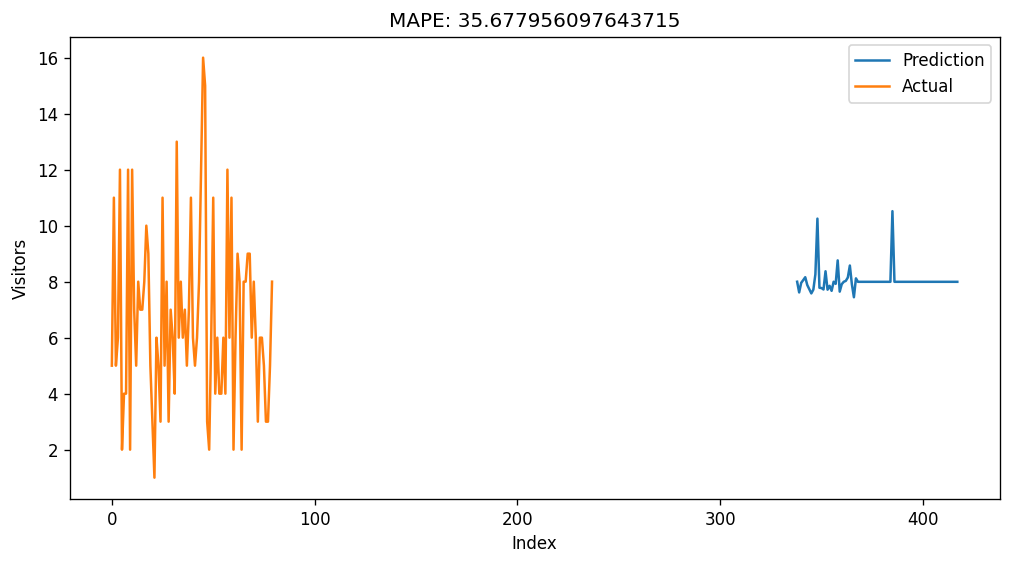

air_a271c9ba19e81d17
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=1640.802, Time=7.54 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=1637.067, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=1635.028, Time=2.08 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=1634.107, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=2041.346, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=1638.776, Time=0.18 sec
 ARIMA(0,0,1)(1,0,1)[30] intercept   : AIC=1635.911, Time=2.94 sec
 ARIMA(0,0,1)(0,0,2)[30] intercept   : AIC=1635.748, Time=8.95 sec
 ARIMA(0,0,1)(1,0,0)[30] intercept   : AIC=1634.915, Time=1.89 sec
 ARIMA(0,0,1)(1,0,2)[30] intercept   : AIC=1637.704, Time=7.42 sec
 ARIMA(0,0,0)(0,0,1)[30] intercept   : AIC=1632.640, Time=1.86 sec
 ARIMA(0,0,0)(1,0,1)[30] intercept   : AIC=1634.310, Time=5.71 sec
 ARIMA(0,0,0)(0,0,2)[30] intercept   : AIC=1634.131, Time=5.41 sec
 ARIMA(0,0,0)(1,0,0)[30] intercept   : AIC=1633.511, Time=1.57 se

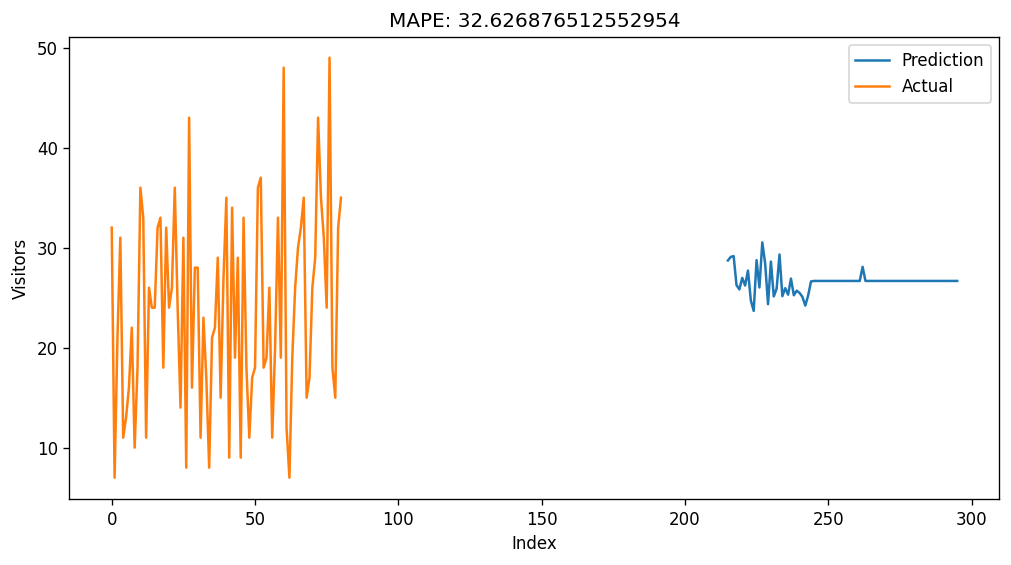

air_fd6aac1043520e83
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=inf, Time=9.13 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=2582.181, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=2584.824, Time=4.26 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=2584.467, Time=1.78 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=3124.238, Time=0.09 sec
 ARIMA(0,0,0)(1,0,0)[30] intercept   : AIC=2583.371, Time=2.50 sec
 ARIMA(0,0,0)(0,0,1)[30] intercept   : AIC=2583.184, Time=3.46 sec
 ARIMA(0,0,0)(1,0,1)[30] intercept   : AIC=2591.254, Time=6.09 sec
 ARIMA(1,0,0)(0,0,0)[30] intercept   : AIC=2583.674, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=2583.510, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=2583.753, Time=0.53 sec

Best model:  ARIMA(0,0,0)(0,0,0)[30] intercept
Total fit time: 28.437 seconds

 MAPE : 
 37.13324244198042

 MAE : 
  12.1569429128635

 RMSLE : 
 0.5506980633268355


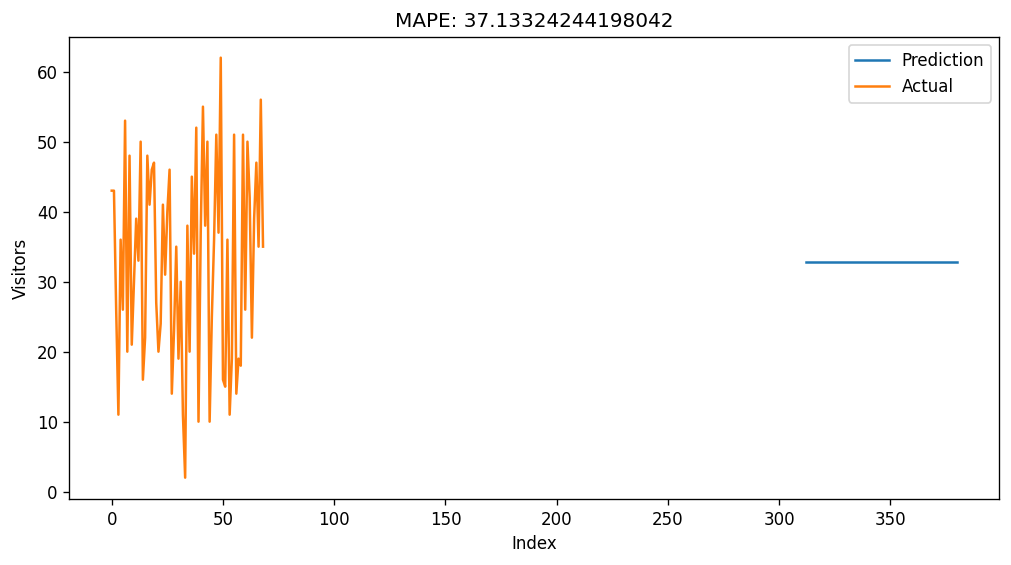

air_64d4491ad8cdb1c6
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=2484.038, Time=5.26 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=2478.790, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=2480.699, Time=6.60 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=2480.694, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=2940.332, Time=0.11 sec
 ARIMA(0,0,0)(1,0,0)[30] intercept   : AIC=2479.211, Time=1.85 sec
 ARIMA(0,0,0)(0,0,1)[30] intercept   : AIC=2479.244, Time=1.34 sec
 ARIMA(0,0,0)(1,0,1)[30] intercept   : AIC=2481.233, Time=3.00 sec
 ARIMA(1,0,0)(0,0,0)[30] intercept   : AIC=2480.440, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=2480.407, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=2482.516, Time=0.33 sec

Best model:  ARIMA(0,0,0)(0,0,0)[30] intercept
Total fit time: 20.529 seconds

 MAPE : 
 40.5813896377761

 MAE : 
  6.415687931348624

 RMSLE : 
 0.6126773858630958


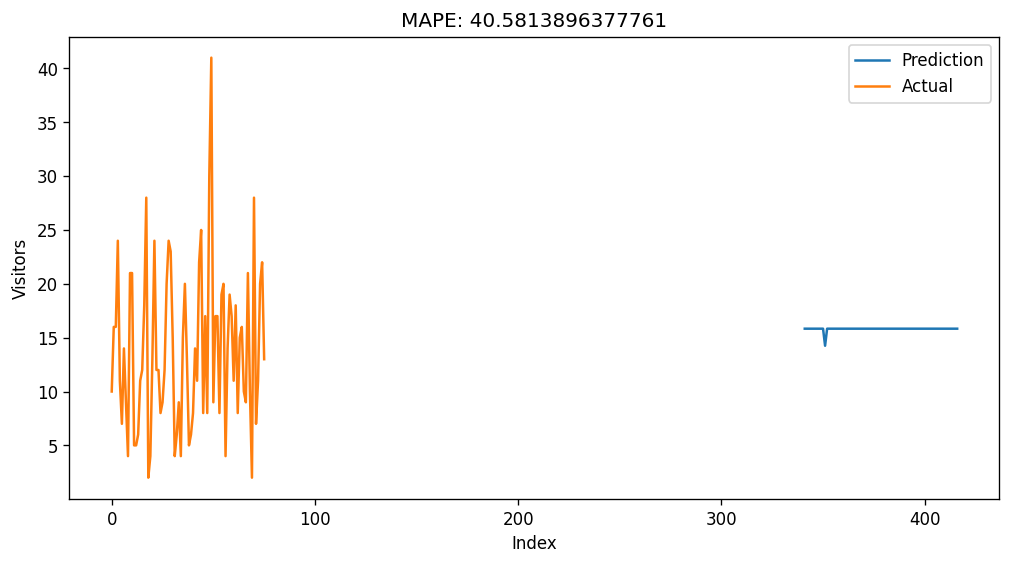

air_f3f9824b7d70c3cf
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=inf, Time=8.41 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1731.560, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1708.070, Time=1.24 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=inf, Time=2.71 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1729.560, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=1709.988, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[30] intercept   : AIC=1705.335, Time=11.76 sec
 ARIMA(1,1,0)(2,0,1)[30] intercept   : AIC=1707.195, Time=16.11 sec
 ARIMA(1,1,0)(1,0,1)[30] intercept   : AIC=1706.765, Time=1.93 sec
 ARIMA(0,1,0)(2,0,0)[30] intercept   : AIC=1732.143, Time=4.71 sec
 ARIMA(2,1,0)(2,0,0)[30] intercept   : AIC=1689.136, Time=11.57 sec
 ARIMA(2,1,0)(1,0,0)[30] intercept   : AIC=1694.070, Time=1.93 sec
 ARIMA(2,1,0)(2,0,1)[30] intercept   : AIC=1690.847, Time=15.47 sec
 ARIMA(2,1,0)(1,0,1)[30] intercept   : AIC=1692.082, Time=3.08 sec
 ARI

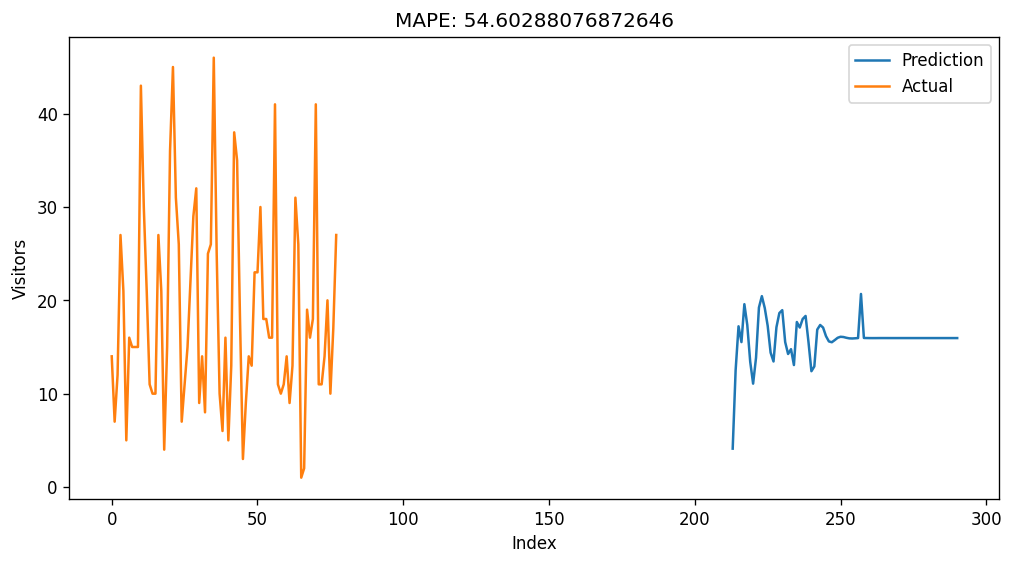

air_820d1919cbecaa0a
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=inf, Time=4.37 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=1418.923, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=1421.374, Time=2.92 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=1421.653, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=2000.582, Time=0.08 sec
 ARIMA(0,0,0)(1,0,0)[30] intercept   : AIC=1420.548, Time=1.47 sec
 ARIMA(0,0,0)(0,0,1)[30] intercept   : AIC=1420.605, Time=0.95 sec
 ARIMA(0,0,0)(1,0,1)[30] intercept   : AIC=inf, Time=6.87 sec
 ARIMA(1,0,0)(0,0,0)[30] intercept   : AIC=1419.671, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=1419.920, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=1417.116, Time=0.50 sec
 ARIMA(1,0,1)(1,0,0)[30] intercept   : AIC=1419.749, Time=3.40 sec
 ARIMA(1,0,1)(0,0,1)[30] intercept   : AIC=1419.244, Time=2.70 sec
 ARIMA(2,0,1)(0,0,0)[30] intercept   : AIC=1418.663, Time=0.57 sec
 ARIMA(1

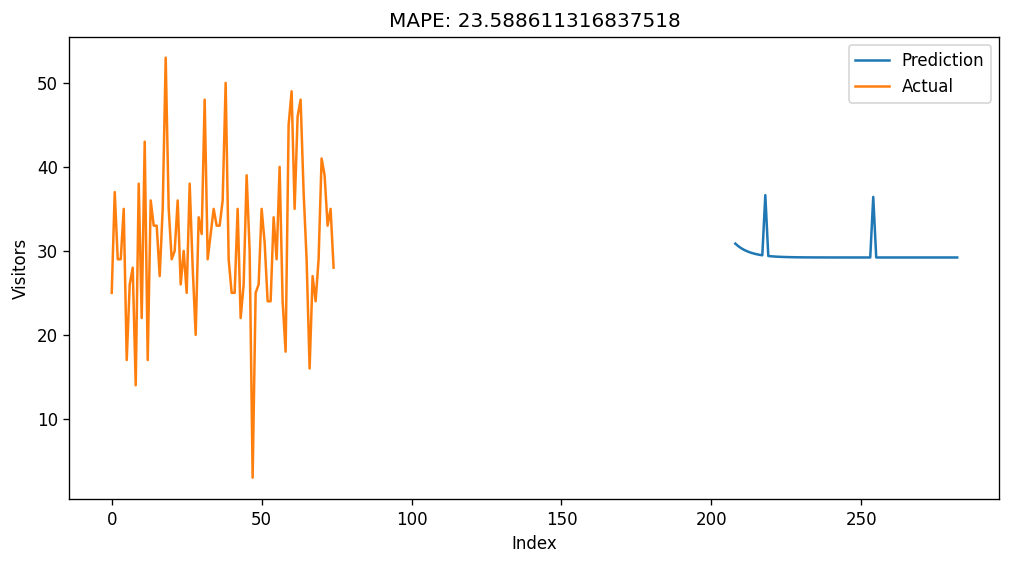

air_9ae7081cb77dc51e
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=1569.728, Time=9.16 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=1581.387, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=1569.920, Time=2.41 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=1566.592, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=1913.834, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=1574.092, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1)[30] intercept   : AIC=1568.574, Time=6.48 sec
 ARIMA(0,0,1)(0,0,2)[30] intercept   : AIC=1568.555, Time=5.60 sec
 ARIMA(0,0,1)(1,0,0)[30] intercept   : AIC=1567.765, Time=1.52 sec
 ARIMA(0,0,1)(1,0,2)[30] intercept   : AIC=1570.591, Time=10.34 sec
 ARIMA(0,0,0)(0,0,1)[30] intercept   : AIC=1569.984, Time=0.78 sec
 ARIMA(1,0,1)(0,0,1)[30] intercept   : AIC=1567.608, Time=2.74 sec
 ARIMA(0,0,2)(0,0,1)[30] intercept   : AIC=1562.803, Time=1.67 sec
 ARIMA(0,0,2)(0,0,0)[30] intercept   : AIC=1566.723, Time=0.19 s

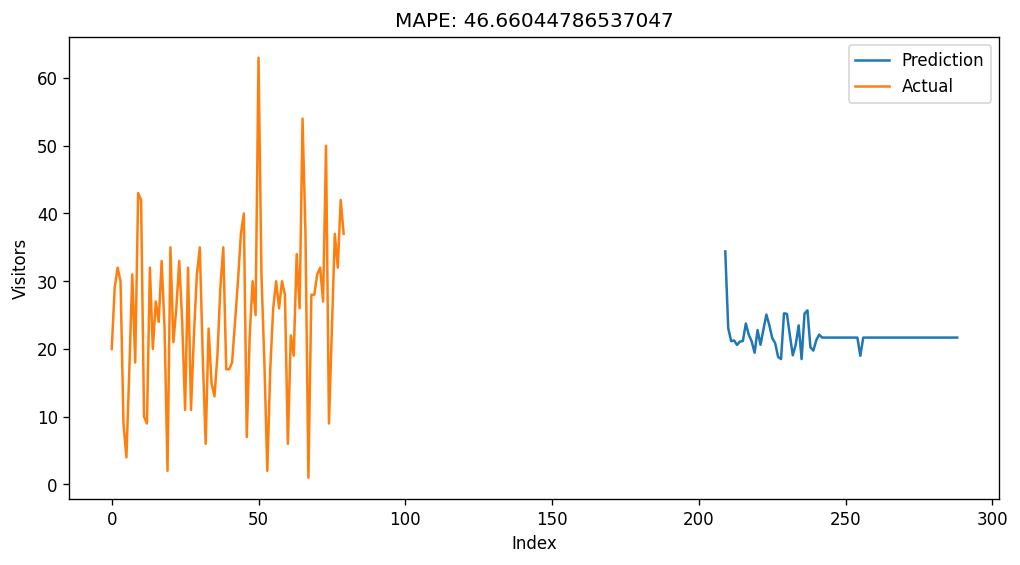

air_d69b08a175bc0387
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1074.462, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1056.623, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1072.465, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=1054.767, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=1056.651, Time=0.82 sec
 ARIMA(1,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(2,1,0)(0,0,0)[30] intercept   : AIC=1024.963, Time=0.16 sec
 ARIMA(2,1,0)(1,0,0)[30] intercept   : AIC=1026.959, Time=1.20 sec
 ARIMA(2,1,0)(0,0,1)[30] intercept   : AIC=1026.960, Time=2.80 sec
 ARIMA(2,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=5.68 sec
 ARIMA(3,1,0)(0,0,0)[30] intercept   : AIC=1020.109, Time=0.32 sec
 ARIMA(3,1,0)(1,0,0)[30] intercept   : AIC=1022.077, Time=1.45 sec
 ARIMA(3,1,0)(0,0,

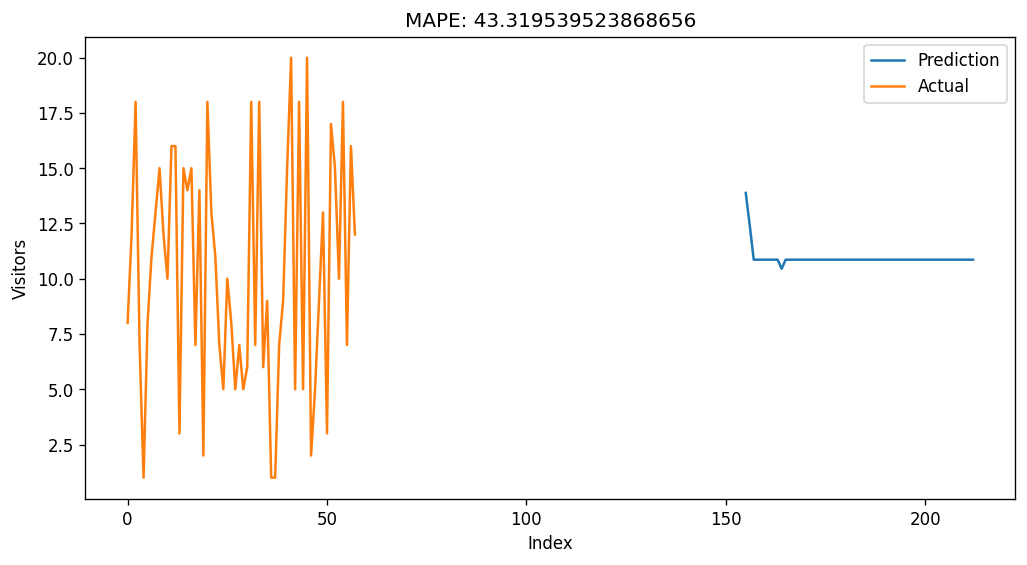

air_ee3a01f0c71a769f
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=inf, Time=9.16 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=2813.445, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=2811.721, Time=2.07 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=2811.471, Time=0.10 sec
 ARIMA(0,1,0)(1,0,0)[30] intercept   : AIC=2814.875, Time=0.92 sec
 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=2814.647, Time=0.94 sec
 ARIMA(0,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=4.29 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=2810.019, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=2811.572, Time=4.24 sec
 ARIMA(1,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=3.94 sec
 ARIMA(2,1,0)(0,0,0)[30] intercept   : AIC=2769.189, Time=0.36 sec
 ARIMA(2,1,0)(1,0,0)[30] intercept   : AIC=2771.176, Time=2.53 sec
 ARIMA(2,1,0)(0,0,1)[30] intercept   : AIC=2771.171, Time=2.32 sec
 ARIMA(2,1,0)(1,0,

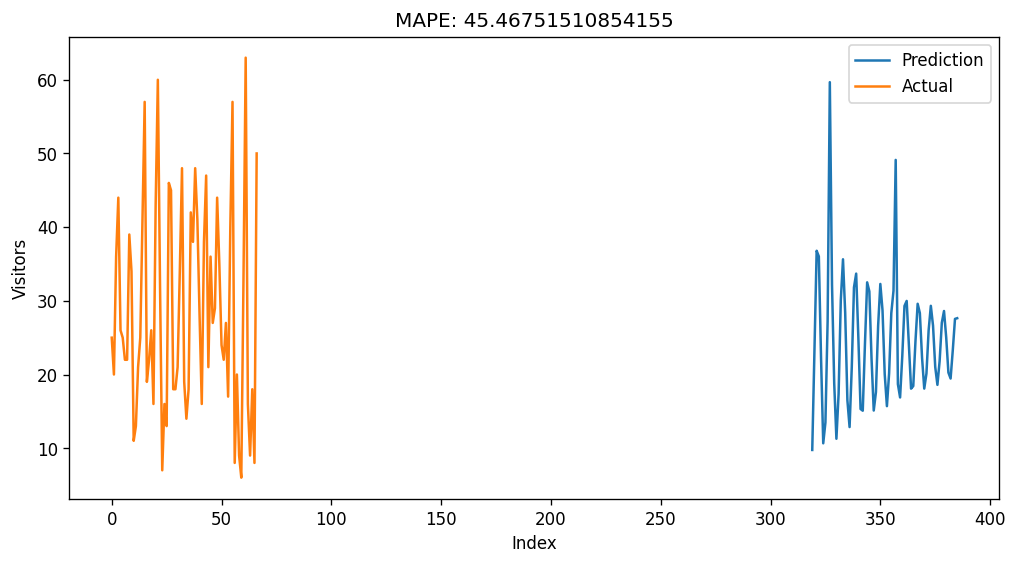

In [ ]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
mapes, rmsles, maes = [], [], []

for i in range(12):
    print("==============================================")
    print(air_store_id[i]);
    df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[i], :]

    # Get the train dataset, we will use the data till end of Jan 2017 for training
    train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
    train = df_tsf_restaurant[train_selector]
    test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
    test = df_tsf_restaurant[test_selector]


    # Fit auto_arima on train set
    model = pm.auto_arima(train.visitors,
                        start_p = 1,
                        start_q = 1,
                        max_p = 3, max_q = 3, m = 30,
                        seasonal = True,
                        d = None, trace = True,
                        error_action ='ignore',
                        suppress_warnings = True,
                        stepwise = True,
                        X=train.loc[:, 'holiday_flg'].values.reshape(-1, 1))

    # To print the summary
    model.summary()


    # Get prediction for test duration
    predictions = pd.Series(model.predict(n_periods=len(test),
                                        X=test.loc[:, 'holiday_flg'].values.reshape(-1, 1)))
    predictions = predictions.map(lambda x: x if x >= 0 else 0)
    actuals = test['visitors'].reset_index(drop = True)

    # Evaluation Metric
    mape  = mean_absolute_percentage_error(predictions, actuals)
    rmsle = RMSLE(predictions, actuals)
    mae = mean_absolute_error(predictions, actuals)

    print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))
    print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
    print("\n RMSLE : \n", RMSLE(predictions, actuals))

    mapes.append(round(mape, 2))
    rmsles.append(rmsle)
    maes.append(mae)

    # plot predictions and actual values
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 5))
    actuals.plot(legend = True, label = "Actual");
    plt.title(f"MAPE: {mape}")
    plt.show()

**Replace Inf with NaN, so as to calculate mean**

In [ ]:
mapes_clean = pd.Series(mapes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
maes_clean = pd.Series(maes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
rmsles_clean = pd.Series(rmsles).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)

Calculate Mean

In [ ]:
print("MAPES : ", np.nanmean(mapes_clean).round(2), mapes_clean)
print("MAES  : ", np.nanmean(maes_clean).round(2), maes_clean)
print("RMSLES: ", np.nanmean(rmsles_clean).round(2), rmsles_clean)

MAPES :  40.18 [51.69   nan 30.66 35.68 32.63 37.13 40.58 54.6  23.59 46.66 43.32 45.47]
MAES  :  7.47 [ 9.46  3.    6.63  2.87  8.7  12.16  6.42  8.3   6.97 10.07  4.73 10.34]
RMSLES:  0.59 [0.75 1.06 0.35 0.51 0.49 0.55 0.61 0.63 0.35 0.64 0.64 0.5 ]


## **15b Types of Exogenous Variables**

1. **Time Based**
 - Holiday or Not
 - Weekday / Week End
 - Yesterday was holiday
 - Tomorrow is holiday
 - Day of the week
 - Month of the year
 - Hour of the day
 - Number of Working days


2. **Demographics: People - Location Based**
 - Population Density
 - Percentage of Age Group ('0-3', ' less than 12', "less than 18", '<=40', '<=60'. '60+')
 - Presence of Public Transport (Bus, Railway stations)
 - Landmark Locations (Stadium, Temples, Churches, Mosques)
 - Number of competitors nearby
 - Average Income
 - Proportion by Ethnicity
 - Zipcode
 - Average family income
 - Number of cars owned
 - Number of voters
 - Percentage of buyers
 - Wallet share



3. **Qualitative / Rating**
 - Customer ratings on products
 - Presence of competitive advantage
 - Restaurant features (AC / Wifi)
 - Handling / Seating Capacity
 - Average review rating on Yelp / Zomato etc


4. **Promotions Information**
 - Type of promotional campaign
   - Buy 1 Get 1
   - Flat x% off
   - Limited Time / Limited Quantity discount
 - The Percentage of Discount Given
 - The Dollar value of discount given
 - Advertising Spend:
   - TV ads
   - Radio
   - Banner
   - National News
   - National News paper
   - Local News Paper
   - Store Front Ads
   - Long Term / Brand Advertising
   - Advertising growth
   - Short Term Sales Promotions



5. **Series Decomposition Signals and LifeCycle Features**
 - Seasonal Index
 - Trend
 - Age since launch
 - Age since Facelift
 - Fourier Transforms
 - Life Cycle Features

**Fourier_Theorem**: A mathematical theorem stating that a PERIODIC function f(x) which is reasonably continuous may be expressed as the sum of a series of sine or cosine terms (called the Fourier series), each of which has specific AMPLITUDE and PHASE coefficients known as Fourier coefficients.




6. **Macro Economic data**
 - Inflation Rate
 - CPI (Consumer Price Index)
 - WPI (Wholesale Price Index)
 - Housing Starts
 - Crude Oil Prices
 - Metal Prices
 - Central Bank Interest Rate
 - GDP Growth
 - Population Growth
 - Personal Income Tax Rate
 - Sales Tax Rate
 - Many more from various domain / country specific sources



**Sources  of Macro Economic, Demographic Data**
 - Acxiom
 - OECD Stat
 - Dun and Bradstreet
 - IHS
 - JATO
 - World Bank
 - JD Power (Automotive)

## **16. Forecast on submission dataset**

Need to map the X variable to submission data and then predict.

In [ ]:
# filter submission dataset
df_submission = df_univariate.loc[df_univariate.dataset == "future", ]
df_submission.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end  air_genre_name                    air_area_name  latitude_air  longitude_air          hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken        city       street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                                      area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
250468  future  air_00a91d42b08b08d9_2017-04-23  air_00a91d42b08b08d9  2017-04-23         0      Sunday            0        1            1                    0                     1          0        6  2017      4          113             30            16         False  Italian/French  Tōkyō-to Chiyoda-ku Kudanminami     35.694003     139.753595  hpg_fbe603376b5980fc            NaN           NaN           NaN            NaN  Tōkyō-to  Chiyoda-ku  Kudanminami                    20                  22                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Chiyoda-ku Kudanminami_Italian/French  air_00a91d42b08b08d9_6  air_00a91d42b08b08d9_6_0       2.000000              2.0           2.0           2.0
250469  future  air_00a91d42b08b08d9_2017-04-24  air_00a91d42b08b08d9  2017-04-24         0      Monday            0        0            0                    0                     1          0        0  2017      4          114             30            17         False  Italian/French  Tōkyō-to Chiyoda-ku Kudanminami     35.694003     139.753595  hpg_fbe603376b5980fc            NaN           NaN           NaN            NaN  Tōkyō-to  Chiyoda-ku  Kudanminami                    20                  22                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Chiyoda-ku Kudanminami_Italian/French  air_00a91d42b08b08d9_0  air_00a91d42b08b08d9_0_0      22.500000             19.0           1.0          47.0
250470  future  air_00a91d42b08b08d9_2017-04-25  air_00a91d42b08b08d9  2017-04-25         0     Tuesday            0        0            0                    0                     0          0        1  2017      4          115             30            17         False  Italian/French  Tōkyō-to Chiyoda-ku Kudanminami     35.694003     139.753595  hpg_fbe603376b5980fc            NaN           NaN           NaN            NaN  Tōkyō-to  Chiyoda-ku  Kudanminami                    20                  22                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Chiyoda-ku Kudanminami_Italian/French  air_00a91d42b08b08d9_1  air_00a91d42b08b08d9_1_0      24.350000             24.5           1.0          43.0
250471  future  air_00a91d42b08b08d9_2017-04-26  air_00a91d42b08b08d9  2017-04-26         0   Wednesday            0        0            0                    0                     0          0        2  2017      4          116             30            17         False  Italian/French  Tōkyō-to Chiyoda-ku Kudanminami     35.694003     139.753595  hpg_fbe603376b5980fc            NaN           NaN           NaN            NaN  Tōkyō-to  Chiyoda-ku  Kudanminami                    20                  22                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Chiyoda-ku Kudanminami_Italian/French  air_00a91d42b08b08d9_2  air_00a91d42b08b08d9_2_0      28.125000             28.0          15.0          52.0
250472  future  air_00a91d42b08b08d9_2017-04-27  air_00a91d42b08b08d9  2017-04-27         0    Thursday            0        0            0                    0   

In [ ]:
# Duration of submission data
duration = datetime.datetime.strptime(max(df_submission.visit_date), '%Y-%m-%d') - datetime.datetime.strptime(min(df_submission.visit_date), '%Y-%m-%d')
duration = duration.days + 1

Fit the model on complete past dataset in order to get best results on the submission dataset

In [ ]:
# Fit auto_arima on train set
model = pm.auto_arima(df_genre.visitors, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 7,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=5278.069, Time=1.28 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=5491.010, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5385.735, Time=0.88 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=5314.053, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=5491.069, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=5454.077, Time=0.12 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=5274.505, Time=1.96 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=5387.603, Time=1.13 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=5274.381, Time=7.79 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=5349.322, Time=2.62 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=5278.271, Time=4.72 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=5275.334, Time=7.26 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=5301.806, Time=2.96 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=5281.860, Time=2.00 sec
 ARIMA(2,0,1)(2,1,1)[7] intercept

In [ ]:
# Get prediction for submission duration
sumbission_duration = duration
predictions = pd.Series(model.predict(sumbission_duration))
predictions

477    419.236457
478    389.337686
479    398.595411
480    482.645524
481    465.262634
482    655.067317
483    621.556852
484    422.176837
485    399.395686
486    412.752980
487    486.681545
488    476.414571
489    658.843226
490    623.098941
491    427.315535
492    405.335177
493    417.017649
494    494.251198
495    480.142741
496    668.512276
497    631.420764
498    434.519172
499    411.955601
500    423.078258
501    501.471543
502    486.333906
503    675.883155
504    638.819011
505    441.461899
506    418.738700
507    429.920140
508    508.107674
509    493.173629
510    682.292258
511    645.319629
512    447.988260
513    425.273982
514    436.484401
515    514.526785
dtype: float64

### Prediction at restaurant level

In [ ]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : df_submission.visit_date.unique(),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

visit_date    visitors
0  2017-04-23  419.236457
1  2017-04-24  389.337686
2  2017-04-25  398.595411
3  2017-04-26  482.645524
4  2017-04-27  465.262634

In [ ]:
# Merge the prediction df and store_visitor df
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(897, 4)

In [ ]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

visit_date    visitors          air_store_id  restaurant_share
0   2017-04-23  419.236457  air_08f994758a1e76d4          0.050737
1   2017-04-23  419.236457  air_1653a6c513865af3          0.093262
2   2017-04-23  419.236457  air_2aab19554f91ff82          0.089099
3   2017-04-23  419.236457  air_2bffb19a24d11729          0.033610
4   2017-04-23  419.236457  air_2fc478dc9f0a6b31          0.019667
5   2017-04-23  419.236457  air_396166d47733d5c9          0.039690
6   2017-04-23  419.236457  air_3f91d592acd6cc0b          0.040856
7   2017-04-23  419.236457  air_42d41eb58cad170e          0.043095
8   2017-04-23  419.236457  air_52e2a1fd42bc917a          0.018333
9   2017-04-23  419.236457  air_5e70fe82f9e4fab6          0.038376
10  2017-04-23  419.236457  air_627cabe2fe53f33f          0.023924
11  2017-04-23  419.236457  air_6c952e3c6e590945          0.046279
12  2017-04-23  419.236457  air_8093d0b565e9dbdf          0.109350
13  2017-04-23  419.236457  air_98b54e32ccddd896          0.028147
14  2017-04-23  419.236457  air_a546cbf478a8b6e4          0.045562
15  2017-04-23  419.236457  air_a9133955abccf071          0.058908
16  2017-04-23  419.236457  air_b80fed1a07c817d2          0.007809
17  2017-04-23  419.236457  air_c2626f5f86d57342          0.035507
18  2017-04-23  419.236457  air_c73d319ffabf287a          0.045347
19  2017-04-23  419.236457  air_cf5ab75a0afb8af9          0.019124
20  2017-04-23  419.236457  air_dc71c6cc06cd1aa2          0.014881
21  2017-04-23  419.236457  air_dfad598ff642dab7          0.074955
22  2017-04-23  419.236457  air_f180301886c21375          0.023481
23  2017-04-24  389.337686  air_08f994758a1e76d4          0.050737
24  2017-04-24  389.337686  air_1653a6c513865af3          0.093262
25  2017-04-24  389.337686  air_2aab19554f91ff82          0.089099
26  2017-04-24  389.337686  air_2bffb19a24d11729          0.033610
27  2017-04-24  389.337686  air_2fc478dc9f0a6b31          0.019667
28  2017-04-24  389.337686  air_396166d47733d5c9          0.039690
29  2017-04-24  389.337686  air_3f91d592acd6cc0b          0.040856
30  2017-04-24  389.337686  air_42d41eb58cad170e          0.043095
31  2017-04-24  389.337686  air_52e2a1fd42bc917a          0.018333
32  2017-04-24  389.337686  air_5e70fe82f9e4fab6          0.038376
33  2017-04-24  389.337686  air_627cabe2fe53f33f          0.023924
34  2017-04-24  389.337686  air_6c952e3c6e590945          0.046279
35  2017-04-24  389.337686  air_8093d0b565e9dbdf          0.109350
36  2017-04-24  389.337686  air_98b54e32ccddd896          0.028147
37  2017-04-24  389.337686  air_a546cbf478a8b6e4          0.045562
38  2017-04-24  389.337686  air_a9133955abccf071          0.058908
39  2017-04-24  389.337686  air_b80fed1a07c817d2          0.007809
40  2017-04-24  389.337686  air_c2626f5f86d57342          0.035507
41  2017-04-24  389.337686  air_c73d319ffabf287a          0.045347
42  2017-04-24  389.337686  air_cf5ab75a0afb8af9          0.019124
43  2017-04-24  389.337686  air_dc71c6cc06cd1aa2          0.014881
44  2017-04-24  389.337686  air_dfad598ff642dab7          0.074955
45  2017-04-24  389.337686  air_f180301886c21375          0.023481
46  2017-04-25  398.595411  air_08f994758a1e76d4          0.050737
47  2017-04-25  398.595411  air_1653a6c513865af3          0.093262
48  2017-04-25  398.595411  air_2aab19554f91ff82          0.089099
49  2017-04-25  398.595411  air_2bffb19a24d11729          0.033610

In [ ]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

visit_date    visitors          air_store_id  restaurant_share  visitors_predicted
0  2017-04-23  419.236457  air_08f994758a1e76d4          0.050737           21.270668
1  2017-04-23  419.236457  air_1653a6c513865af3          0.093262           39.098798
2  2017-04-23  419.236457  air_2aab19554f91ff82          0.089099           37.353642
3  2017-04-23  419.236457  air_2bffb19a24d11729          0.033610           14.090518
4  2017-04-23  419.236457  air_2fc478dc9f0a6b31          0.019667            8.245229

### Restaurant level Model

In [ ]:
all_store_ids = df_tsf['air_store_id'].unique()
all_store_ids[:10]

array(['air_ba937bf13d40fb24', 'air_25e9888d30b386df',
       'air_8e4360a64dbd4c50', 'air_35512c42db0868da',
       'air_a271c9ba19e81d17', 'air_fd6aac1043520e83',
       'air_64d4491ad8cdb1c6', 'air_f3f9824b7d70c3cf',
       'air_820d1919cbecaa0a', 'air_9ae7081cb77dc51e'], dtype=object)

In [ ]:
df_restaurant = df_tsf.loc[df_tsf['air_store_id'] =="air_ba937bf13d40fb24",]
df_restaurant.reset_index(drop = True, inplace = True)
df_restaurant.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0        0            0                    0                     0          1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0        0            0                    0                     0          1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24  2016-01-15        29      Friday            0        0            0                    1                     0          1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0        1            1                    0                     0          1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24  2016-01-18         6      Monday            0        0            0                    0                     1          1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato

In [ ]:
# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_restaurant.visit_date < '2017-02-01'
train = df_restaurant[train_selector]
test_selector = df_restaurant.visit_date >= '2017-02-01'
test = df_restaurant[test_selector]

In [ ]:
train.head()

dataset                               id          air_store_id  visit_date  visitors day_of_week  holiday_flg  weekend  day_off_flg  tomorrow_is_holiday  yesterday_is_holiday  jump_flag  weekday  year  month  day_of_year  days_in_month  week_of_year  is_month_end air_genre_name                 air_area_name  latitude_air  longitude_air hpg_store_id hpg_genre_name hpg_area_name  latitude_hpg  longitude_hpg Todofuken       city     street  n_stores_same_street  n_stores_same_city  n_stores_same_Todofuken  reserve_vistors_count  reserve_visitors  visit_hour  reserve_hour  hours_ahead                               area_genre           store_weekday     store_weekday_holiday  mean_visitors  median_visitors  min_visitors  max_visitors
0    past  air_ba937bf13d40fb24_2016-01-13  air_ba937bf13d40fb24  2016-01-13        25   Wednesday            0        0            0                    0                     0          1        2  2016      1           13             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_2  air_ba937bf13d40fb24_2_0      24.095238             25.0           7.0          57.0
1    past  air_ba937bf13d40fb24_2016-01-14  air_ba937bf13d40fb24  2016-01-14        32    Thursday            0        0            0                    0                     0          1        3  2016      1           14             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_3  air_ba937bf13d40fb24_3_0      20.450000             21.0           7.0          45.0
2    past  air_ba937bf13d40fb24_2016-01-15  air_ba937bf13d40fb24  2016-01-15        29      Friday            0        0            0                    1                     0          1        4  2016      1           15             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_4  air_ba937bf13d40fb24_4_0      35.218750             35.5          17.0          61.0
3    past  air_ba937bf13d40fb24_2016-01-16  air_ba937bf13d40fb24  2016-01-16        22    Saturday            0        1            1                    0                     0          1        5  2016      1           16             31             2         False     Dining bar  Tōkyō-to Minato-ku Shibakōen     35.658068     139.751599          NaN            NaN           NaN           NaN            NaN  Tōkyō-to  Minato-ku  Shibakōen                    51                  61                      444                    NaN               NaN         NaN           NaN          NaN  Tōkyō-to Minato-ku Shibakōen_Dining bar  air_ba937bf13d40fb24_5  air_ba937bf13d40fb24_5_0      27.828125             27.0           6.0          53.0
4    past  air_ba937bf13d40fb24_2016-01-18  air_ba937bf13d40fb24  2016-01-18         6      Monday            0        0            0                    0                     1          1        0  2016      1           18             31             3         False     Dining bar  Tōkyō-to Minato

### Build Auto SARIMA model

- Seasonality = 7

In [ ]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 7,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)


# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=2423.772, Time=1.16 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2566.267, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2513.062, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=2422.260, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2564.286, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=2559.649, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=2422.622, Time=0.75 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=2422.143, Time=1.33 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=2419.390, Time=1.03 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=2421.010, Time=1.76 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=2421.874, Time=1.38 sec
 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=2417.420, Time=0.87 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=2420.163, Time=2.06 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=2420.623, Time=2.07 sec
 ARIMA(0,0,0)(2,1,2)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                  316
Model:             SARIMAX(1, 1, [1, 2], 7)   Log Likelihood               -1204.006
Date:                      Sat, 19 Oct 2024   AIC                           2416.012
Time:                              07:04:04   BIC                           2430.945
Sample:                                   0   HQIC                          2421.982
                                      - 316                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.6680      0.199     -3.363      0.001      -1.057      -0.279
ma.S.L7       -0.1087      0.175     -0.622      0.534      -0.451       0.234
ma.S.L14      -0.6977      0.145     -4.806      0.000      -0.982      -0.413
sigma2       137.0933     11.163     12.281      0.000     115.214     158.973
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.30
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               1.01   Skew:                             0.45
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
actuals = test['visitors'].reset_index(drop = True)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  9.959117292207862

 RMSLE : 
 0.7923282770850278

 MAPE : 
 47.712193402806086


<Axes: xlabel='Index', ylabel='Visitors'>

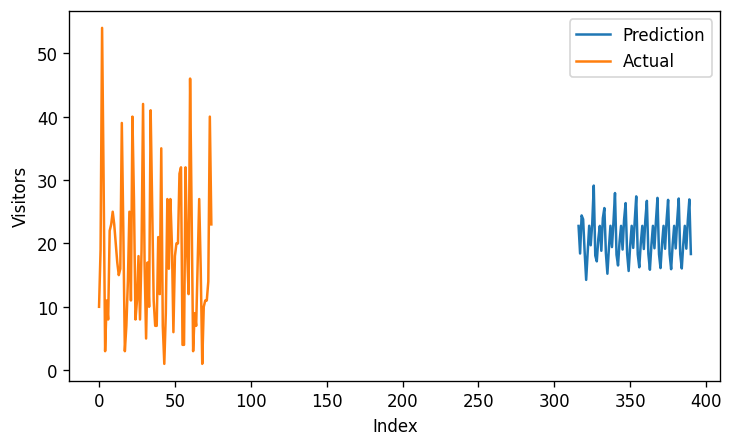

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors")
actuals.plot(legend = True, label = "Actual")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The MAPE is 50%
- The RMSLE is 0.75

Rather than training the models on every restaurant, let's train the model for 10 restaurants and check the error and check if it's feasible to use ARIMA for predictions


In [ ]:
# Create an empty dict to store the evaluation metrics for every model
eval_metrics = {'MAE'   : [],
                'MAPE'  : []}

# Note : I am not using RMSLE here as there might be some negative predictions as well and RMSLE won't work in case of negative predictions

In [ ]:
# Train the model for first 10 store ids and get the predictions and error value
for id in all_store_ids[:10]:
    print( "Restaurant ", id)
    df_restaurant = df_tsf.loc[df_tsf['air_store_id'] == id,]
    df_restaurant.reset_index(drop = True, inplace = True)

    # Get the train dataset, we will use the data till end of Jan 2017 for training
    train_selector = df_restaurant.visit_date < '2017-02-01'
    train = df_restaurant[train_selector]
    test_selector = df_restaurant.visit_date >= '2017-02-01'
    test = df_restaurant[test_selector]

    # Fit auto_arima on train set
    model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1,
                            max_p = 3, max_q = 3, m = 7,
                            start_P = 0, seasonal = True,
                            d = None, D = 1, trace = True,
                            error_action ='ignore',
                            suppress_warnings = True,
                            stepwise = True)

    # Get prediction for test duration
    predictions = pd.Series(model.predict(len(test)))
    # Actuals
    actuals = test['visitors'].reset_index(drop = True)

    # Evaluation Metric
    eval_metrics['MAE'].append(mean_absolute_error(predictions, actuals))
    eval_metrics['MAPE'].append(mean_absolute_percentage_error(predictions, actuals))

In [ ]:
# Print the evaluation metrics
print("\n MAE : \n", eval_metrics['MAE'])
print("\n MAPE : \n", eval_metrics['MAPE'])

The error is very high.

- We have to predict the number of visitors visiting in restaurant on a daily basis. With univariate forecasting, it won't be that easy as lot of variables play an essential role in predicting number of visitors in restaurant. Additionally this process will be very slow as well.

So let's look at machine learning models for that.

## **17. Time Series Forecasting - Prophet by Facebook**

In [ ]:
# Install
# !pip install prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
# Get the train dataset for a air genre, we will use the data till end of Jan 2017 for training
train_selector = df_genre.visit_date < '2017-02-01'
train = df_genre[train_selector]
test_selector = df_genre.visit_date >= '2017-02-01'
test = df_genre[test_selector]

df = train[["visit_date","visitors"]]

# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.head(10)

In [ ]:
# Fit the model
model = Prophet()
model.fit(df)
model

In [ ]:
model.changepoints

In [ ]:
# Get the test datset in date time format
future_df = pd.DataFrame({'ds' : test.visit_date})
future_df['ds'] = pd.to_datetime(future_df['ds'])

In [ ]:
# Get predictions
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
# Visualize the forecast
fig1 = model.plot(forecast)

In [ ]:
# Visualize the components of forecast
fig2 = model.plot_components(forecast)

### Evaluate

In [ ]:
# Evaluation Metric
predictions = forecast['yhat']
actuals = test['visitors'].reset_index(drop = True)
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))

In [ ]:
actuals.index = pd.to_datetime(test.visit_date)
predictions.index = pd.to_datetime(test.visit_date)

In [ ]:
# plot predictions and actual values
import matplotlib.pyplot as plt
predictions.plot(legend = True,
                 label = "Prediction",
                 xlabel = "Index",
                 ylabel = "Visitors")

actuals.plot(legend = True, label = "Actual")

### **Forecast with External Regressors**

In [ ]:
# Get the train dataset for a air genre, we will use the data till end of Jan 2017 for training
train_selector = df_genre.visit_date < '2017-02-01'
train = df_genre[train_selector]

test_selector = df_genre.visit_date >= '2017-02-01'
test = df_genre[test_selector]

train.head()

In [ ]:
# Include the External Regressors in the datasets
df_train = train[["visit_date", "visitors", "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]]
df_test = test[["visit_date", "visitors", "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]]


# prepare expected column names
df_train.columns = ['ds', 'y', "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]
df_test.columns = ['ds', 'y', "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]

df_train['ds']= pd.to_datetime(df_train['ds'])
df_test['ds']= pd.to_datetime(df_test['ds'])

df_test.head(10)

In [ ]:
# Fit the model
model = Prophet()
model.add_regressor("holiday_flg")
model.add_regressor("tomorrow_is_holiday")
model.add_regressor("yesterday_is_holiday")
model.fit(df_train)
model

In [ ]:
model.changepoints

In [ ]:
# Get the test datset in date time format
future_df = df_test.copy()

# future_df = pd.DataFrame({'ds' : test.visit_date})
# future_df['ds'] = pd.to_datetime(future_df['ds'])

In [ ]:
# Get predictions
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# Visualize the forecast
fig1 = model.plot(forecast)

In [ ]:
# Visualize the components of forecast
fig2 = model.plot_components(forecast)

### Evaluate

In [ ]:
# Evaluation Metric
predictions = forecast['yhat']
actuals = test['visitors'].reset_index(drop = True)
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))

In [ ]:
# plot predictions and actual values
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors")
actuals.plot(legend = True, label = "Actual")

### Prediction at restaurant level

In [ ]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

In [ ]:
# Merge the prediction df and store_visitor df
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

In [ ]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

In [ ]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

In [ ]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('visitors', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n RMSLE : \n", RMSLE(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))

### Prediction for submission dataset

In [ ]:
# Get the full training data
df = df_genre[["visit_date","visitors"]]

# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.head()

In [ ]:
# Fit the model
model = Prophet()
model.fit(df)
model

In [ ]:
# filter submission dataset
df_submission = df_univariate.loc[df_univariate.dataset == "future",]
df_submission.head()

In [ ]:
df_submission.visit_date.unique()

In [ ]:
# Get the test datset in date time format
future_df = pd.DataFrame({'ds' : df_submission.visit_date.unique()})
future_df['ds'] = pd.to_datetime(future_df['ds'])

In [ ]:
# Get predictions
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

## **Machine Learning Models**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Machine Learning Models</h2>
</div>




## **18. XGB Regressor**

XGBoost is an optimized distributed gradient boosting model designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

`xgboost.XGBRegressor` is the wrappers that prepare the DMatrix and pass in the corresponding objective function and parameters.

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
X_train.head()

In [ ]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

In [ ]:
X_train.head()

In [ ]:
# Define the model
xgbr = XGBRegressor(n_jobs = -1, random_state = 100)

# Train the model
xgbr.fit(X_train.iloc[:,3:], y_train_)

Let's use the model to get predictions on test dataset.

In [ ]:
# Prediction
y_pred = xgbr.predict(X_test.iloc[:,3:])
y_pred

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))

### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
# Feature Importance
feature_importance_df = pd.DataFrame({'feature' : X_train.iloc[:,3:].columns, 'importance' : xgbr.feature_importances_ })
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

In [ ]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by="importance", ascending=False));
plt.title('XGBRegressor Features');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- With XGBRegressor, we got RMSLE value of 0.15 and MAPE value of 14%.
- Only 2 features are dominating the feature importance metric, so this is not a good model.


Let's look at a XGB model, **not XGBRegressor**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>XGBoost Demo</h2>
</div>

XGBoost is an optimized distributed gradient boosting model designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.


xgboost.train is the low-level API to train the model via gradient boosting method.

In [ ]:
import xgboost as xgb

**Initialize parameters**

In [ ]:
# Initialize parameters for XGBoost model
# Ref: https://xgboost.readthedocs.io/en/latest/parameter.html

param = {'colsample_bytree': 0.4,  # range:(0,1] -  subsample ratio of columns when constructing each tree. Default: 1
         'eta': 0.1,               # range: [0, 1] - Learning rate. Default 0.3
         'gamma': 2,               # range: [0, inf] - Minimum loss reduction req to further partition a leaf node. Def: 0
         'max_depth': 4,           # range: [0, inf] - Maximum depth of a tree. default: 6
         'min_child_weight': 100,  # range: [0, inf] - Minimum sum of instance weight needed in a child. Default: 0
         'objective': 'reg:squarederror',  # regression with squred loss
         'seed': 2018,
         'subsample': 1,           # Subsample ratio of the training instance. Default: 1
         'n_jobs' : -1}            # number of parallel jobs

**Training Data**


In [ ]:
X_train.head()

**Convert X back to original scale**

In [ ]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

**Create DMatrix for training**

In [ ]:
# Create DMatrix for training and testing dataset
train_dmatrix = xgb.DMatrix(X_train.iloc[:, 2:], label=y_train_)
test_dmatrix = xgb.DMatrix(X_test.iloc[:, 2:], label=y_test_)

# Define the evaluation list
evallist = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]

**Train the model**

In [ ]:
# Train the model
model = xgb.train(params=param,
                  dtrain=train_dmatrix,
                  num_boost_round=100000,
                  # evals=evallist,
                  early_stopping_rounds=50,
                  verbose_eval=100
                 )

best_iteration = model.best_iteration
best_score = model.best_score

# Print best score and best iteration
print("Best score : ", best_score)
print("Best iteration : ", best_iteration)

Let's use the model to get predictions on test dataset.

In [ ]:
# Prediction
y_pred = model.predict(test_dmatrix)
y_pred

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))

#### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
# Feature Importance
feature_importance_df             = pd.DataFrame.from_dict(model.get_score(importance_type='gain'), orient='index')
feature_importance_df.columns     = ['importance']
feature_importance_df['feature']  = feature_importance_df.index
feature_importance_df             = feature_importance_df.sort_values(by='importance', ascending=False).head(30)
feature_importance_df

In [ ]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by="importance", ascending=False));
plt.title('XGB Feature Importance');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- With XGB, we got RMSLE value of 0.56 and MAPE value of 17.61% which is almost similar to XGBRegressor
- 4-5 features are contributing in predicting the y variable, it's better than XGBRegressor but not upto the mark


Let's look at a CatBoost model to see if the performance can be improved

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>CatBoost Demo</h2>
</div>

CatBoost is a high-performance open source library for gradient boosting on decision trees

Features of CatBoost:

- Great Quality without parameter tuning
- Categorical feature support
- Fast and scalable GPU version
- Improved accuracy
- Fast prediction

In [ ]:
# !pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X_train.head()

**Transform Y back to original scale**

In [ ]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

**Train the model**

In [ ]:
# Define the model
catboost_regressor = CatBoostRegressor(random_state = 100,
                                       loss_function='RMSE'  # default
                                       )

# Train the model
catboost_regressor.fit(X=X_train.iloc[:, 2:],
                       y=y_train_,
                       plot=True,
                       # eval_set = (X_test.iloc[:,2:], y_test_)
                       )

Let's use the model to get predictions on test dataset.

In [ ]:
# Prediction
y_pred = catboost_regressor.predict(X_test.iloc[:,2:])
y_pred

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Replace negative values with 1
y_pred = np.where(y_pred < 0, 1, y_pred)

# check  number of replacements
np.sum(y_pred == 1)

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))

#### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
# Feature Importance
feature_importance_df = pd.DataFrame({'feature' : X_train.iloc[:,2:].columns, 'importance' : catboost_regressor.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

In [ ]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by="importance", ascending=False));
plt.title('CatBoostRegressor Features');

**Feature statistics for mean_visitors**

In [ ]:
catboost_regressor.calc_feature_statistics(data=X_train.iloc[:, 2:],
                                           target=y_train_,
                                           feature='mean_visitors',
                                           plot=True,
                                           plot_file="mean_visitors.html")

**Feature statistics for day_of_week**

In [ ]:
catboost_regressor.calc_feature_statistics(data=X_train.iloc[:, 2:],
                                           target=y_train_,
                                           feature='day_of_year',
                                           plot=True,
                                           plot_file="day_of_year.html");

**Feature Statistics for Week of year**

In [ ]:
catboost_regressor.calc_feature_statistics(data=X_train.iloc[:, 2:],
                                           target=y_train_,
                                           feature='week_of_year',
                                           plot=True,
                                           plot_file="week_of_year.html");

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

**Train the model with categorical values specified**

In [ ]:
X_train.head()

In [ ]:
cat_columns = ['day_of_week', 'holiday_flg', 'weekend',
              'day_off_flg',	'tomorrow_is_holiday',
              'yesterday_is_holiday',	'jump_flag',
              'weekday',	'year',	'month',	'day_of_year',
              'days_in_month',	'week_of_year',	'is_month_end']
              # 'air_genre_name',	'air_area_name',
              # 'hpg_store_id',	'hpg_genre_name',
              # 'hpg_area_name',	'Todofuken',	'city',
              # 'street',	'visit_hour',	'reserve_hour',
              # 'area_genre',	'store_weekday',	'store_weekday_holiday']

In [ ]:
# Convert Categorical columns to int64 in training data
X_train_ = X_train.copy()
X_train_.fillna(0, inplace=True)
X_train_[cat_columns] = X_train_[cat_columns].astype(np.str)

In [ ]:
# Convert Categorical columns to int64 in test data
X_test_ = X_test.copy()
X_test_.fillna(0, inplace=True)
X_test_[cat_columns] = X_test_[cat_columns].astype(np.str)

In [ ]:
X_train_.dtypes

In [ ]:
# Define the model:
# 1. Change Loss function
# 2. explicit categorical columns
# 3. Increase number of iterations

catboost_regressor = CatBoostRegressor(random_state = 100,
                                       # loss_function='MAPE',  # default=RMSE
                                       # cat_features = cat_columns,
                                       iterations=1500
                                       )

# Train the model
catboost_regressor.fit(X=X_train_.iloc[:,2:],
                       y=y_train_,
                       plot=True)

In [ ]:
X_test_.dtypes

In [ ]:
# Prediction
y_pred = catboost_regressor.predict(X_test_.iloc[:,2:])
y_pred

In [ ]:
# Replace negative values with 1
y_pred = np.where(y_pred < 0, 1, y_pred)

# check  number of replacements
np.sum(y_pred == 1)

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Improve Model</h2>
</div>

The goal of this section is to:
- Perform hyperparameter tuning to find the most optimal parameters
- Build ensemble models
- Get final recommendations


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>22. Hyperparameter tuning</h2>
</div>


**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

In [ ]:
%%time

# Define the estimator
catbregressor = CatBoostRegressor(random_state = 100)


# Define the parameters gird
param_grid = {
    'depth'         : [6,10],       # 8
    'learning_rate' : [0.01, 0.1],  # 0.05
    'iterations'    : [100, 500]    # 1000
    }


# run grid search
grid = GridSearchCV(catbregressor,
                    param_grid=param_grid,
                    refit = True,
                    verbose = 3,
                    n_jobs=-1,
                    cv = 3)


# fit the model for grid search
grid.fit(X_train.iloc[:,2:], y_train_)

Get the best parameters corresponding to which you have best model

In [ ]:
# Best parameter after hyper parameter tuning
print(grid.best_params_)

# Moel Parameters
print(grid.best_estimator_)

catbregressor = grid.best_estimator_

Let's use the best model to get predictions on test dataset.

In [ ]:
# Prediction
y_pred = catbregressor.predict(X_test.iloc[:, 2:])
y_pred

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))

#### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
# Feature Importance
feature_importance_df = pd.DataFrame({'feature' : X_train.iloc[:,2:].columns, 'importance' : catbregressor.feature_importances_ })
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

In [ ]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance",
            y="feature",
            data=feature_importance_df.sort_values(by="importance", ascending=False));

plt.title('CatBoostRegressor Features');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Cohorted Ensemble Models</h2>
</div>

- Let's build separate models based on values of various features like different model for a holiday and non holiday, different models for cities etc.
- In the end ensemble all these models to get the final prediction

In [ ]:
X_train.head()

In [ ]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

**Training the model**

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# Define the features on which you wish to build the model
submodel = {}
submodel_by_features = ['weekday', 'holiday_flg', 'tomorrow_is_holiday', 'air_genre_name', 'Todofuken', 'city']

In [ ]:
# Train the LGBMRegressor model for every category in given features. Store it in a dictionary
for feat in submodel_by_features:
    submodel[feat] = {}
    print('Training a sub-model for each {}'.format(feat))
    for feat_value in X_train[feat].unique():
        print('Sub-model for {}={}'.format(feat, feat_value))

        # train and val datasets are used for tuning model parameters
        train_selector = (X_train[feat] == feat_value)
        X_train_subset = X_train.loc[train_selector].iloc[:, 2:]
        y_train_subset = y_train_[train_selector]

        cbr = CatBoostRegressor(random_state = 100, loss_function='RMSE')
        submodel[feat][feat_value] = cbr.fit(X_train_subset, y_train_subset)

**Making Predictions**

In [ ]:
# Define a function to predict the visitors based on feature category

# For each row in dataset, make predictions using each
# submodel in 'submodel_by_features'

# For each feature in submodel_by_features, the prediction is made using the
# submodel corresponding to the category value of the feature.

def pred_rowbyrow(row):
    row_df = pd.DataFrame().append(row)[X_train.columns[2:]]
    pred = {}
    for feat in submodel_by_features:
        use_model = submodel[feat][row[feat]]
        pred_colname = 'pred_by_'+str(feat)
        pred[pred_colname] = use_model.predict(row_df)[0]
    return pd.Series(pred)

In [ ]:
X_test.reset_index(drop = True, inplace = True)
y_test_.reset_index(drop = True, inplace = True)

In [ ]:
# Get the prediction
pred = X_test.apply(pred_rowbyrow, axis=1)
pred = pred.join(X_test.air_store_id)
pred["actual"] = y_test_

In [ ]:
# Get the mean of all the predictions for every row
pred['pred_mean_visitor'] = pred.filter(regex='pred_').mean(axis=1)
pred.head()

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [ ]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(pred['pred_mean_visitor'], pred["actual"]))
print("\n RMSLE : \n", RMSLE(pred['pred_mean_visitor'], pred["actual"]))
print("\n MAPE : \n", mean_absolute_percentage_error(pred['pred_mean_visitor'], pred["actual"]))

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- With ensemble model, we got RMSLE value of 0.153 and MAPE value of 14.1%. The performance is almost same as compared to CatBoostRegressor


The y variable and predicred values are still the logarithmic values. Let's transform it back to normal and get the final RMSLE score which is the evaluation metric for this competition/case study

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Final Words</h2>
</div>


Congratulations!

The model has been trained and tested, so now you can use it to predict the number of visitors visiting the restaurant

One very important thing to note is that you need to keep a check on the performance of the model, if it deteriorates, re-train the model with new training data and use it for predictions

**Topics Covered:**
1. Problem Statement Understanding
2. Import data, assemble and pre-process it.
3. Extensive EDA
4. Engineering Features
5. Statistical Tests
6. Feature Encoding Techniques
7. Evaluation Metrics
8. Time Series Regression Based Approaches
   - Arima,
   - Auto Arima,
   - Prophet,
   - SARIMA & SARIMAX
9. Error Diagnostics
10. Building models at Restaurant level, Genre level
11. XGBoost
12. CatBoost
13. Hyper Parameter Tuning - Catboost
14. Cohorted Ensembles
